In [2]:
%cd "/home/dutta/Downloads/Summer'24/MIST_codes/scripts"
import read_mist_models

/home/dutta/Downloads/Summer'24/MIST_codes/scripts


In [2]:
%cd "/home/dutta/Downloads/MIST_ET"

/home/dutta/Downloads/MIST_ET


In [3]:
# Function to read and print column information of a .eep.cmd file
def read_eep_cmd_file(file_name):
    # Read the .eep.cmd file
    eepcmd = read_mist_models.EEPCMD(file_name)
    
    # Print the available header information
    print('version: ', eepcmd.version)
    print('photometric system: ', eepcmd.photo_sys)
    print('abundances: ', eepcmd.abun)
    print('rotation: ', eepcmd.rot)
    print('initial mass: ', eepcmd.minit)
    print('Av extinction: ', eepcmd.Av_extinction)
    print('available columns: ', eepcmd.hdr_list)
    
# Specify the .eep.cmd file name
eep_cmd_file = '0100000M.track.eep.cmd'  # Update this with your file name

# Call the function to read and print column information
read_eep_cmd_file(eep_cmd_file)

Reading in: 0100000M.track.eep.cmd
version:  {'MIST': '1.2', 'MESA': '7503'}
photometric system:  UBV(RI)c, 2MASS, Kepler, Hipparcos, Gaia (Vega)
abundances:  {'Yinit': 0.2703, 'Zinit': 0.0142857, '[Fe/H]': 0.0, '[a/Fe]': 0.0}
rotation:  0.4
initial mass:  10.0
Av extinction:  0.0
available columns:  ['star_age', 'log_Teff', 'log_g', 'log_L', 'Z_surf', 'Bessell_U', 'Bessell_B', 'Bessell_V', 'Bessell_R', 'Bessell_I', '2MASS_J', '2MASS_H', '2MASS_Ks', 'Kepler_Kp', 'Kepler_D51', 'Hipparcos_Hp', 'Tycho_B', 'Tycho_V', 'Gaia_G_DR2Rev', 'Gaia_BP_DR2Rev', 'Gaia_RP_DR2Rev', 'Gaia_G_MAW', 'Gaia_BP_MAWb', 'Gaia_BP_MAWf', 'Gaia_RP_MAW', 'TESS', 'Gaia_G_EDR3', 'Gaia_BP_EDR3', 'Gaia_RP_EDR3', 'phase']


Reading in: 0030000M.track.eep.cmd


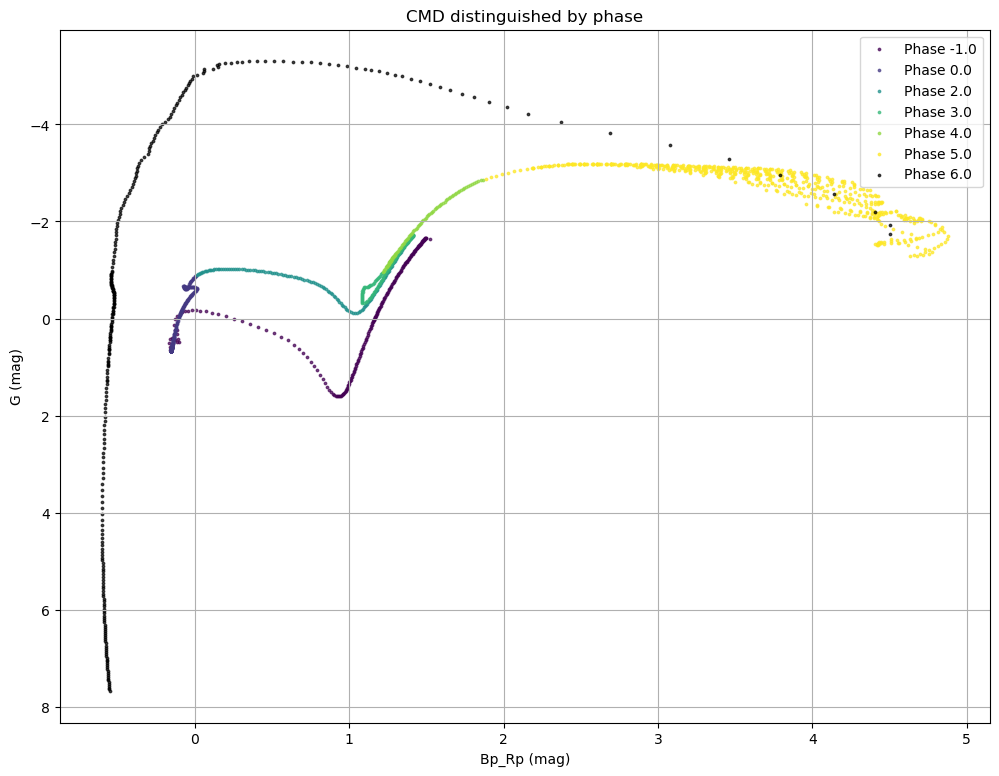

In [155]:
import os
import glob
import matplotlib.pyplot as plt
import read_mist_models

# Step 1: Change directory to the folder containing .eep.cmd files
os.chdir('.')  # Update this to your directory path

# Step 2: Find all .eep.cmd files
eep_cmd_files = glob.glob('*.eep.cmd')
eep_cmd_files.sort()

# Select specific files
eep_cmd_files = eep_cmd_files[2:3]

# Initialize the plot
plt.figure(figsize=(12, 9))

# Define a color map for different phases
phases = np.arange(-1, 6)  # Define the range of phases you expect
colors = plt.cm.viridis(np.linspace(0, 1, len(phases)))
phase_color_map = dict(zip(phases, colors))

# Iterate through the selected .eep.cmd files
for eep_cmd_file in eep_cmd_files:
    eepcmd = read_mist_models.EEPCMD(eep_cmd_file)
    A = eepcmd.eepcmds['star_age']
    T = eepcmd.eepcmds['log_Teff']
    L = eepcmd.eepcmds['log_L']
    B = eepcmd.eepcmds['Gaia_BP_EDR3']
    R = eepcmd.eepcmds['Gaia_RP_EDR3']
    G = eepcmd.eepcmds['Gaia_G_EDR3']
    P = eepcmd.eepcmds['phase']
    
    # Calculate B-R
    B_R = B - R
    
    # Plot B-R vs. G with different colors for different phases
    for phase in np.unique(P):
        indices = (P == phase)
        plt.scatter(B_R[indices], G[indices], label=f'Phase {phase}', color=phase_color_map.get(phase, 'black'), s=3, alpha=0.7)

# Add labels and title
plt.xlabel('Bp_Rp (mag)')
plt.ylabel('G (mag)')
plt.title('CMD distinguished by phase')
plt.gca().invert_yaxis()
plt.legend()
plt.grid(True)
plt.show()

In [14]:
eepcmd = read_mist_models.EEPCMD('0010000M.track.eep.cmd')
Bp = eepcmd.eepcmds['Gaia_BP_EDR3']
star_age = eepcmd.eepcmds['star_age']

Reading in: 0010000M.track.eep.cmd


In [15]:
np.sort((np.diff(star_age)))

array([1.69606781e+00, 1.70017815e+00, 1.70291710e+00, ...,
       1.28732330e+08, 1.31404513e+08, 1.34694719e+08])

Reading in: 0011000M.track.eep.cmd


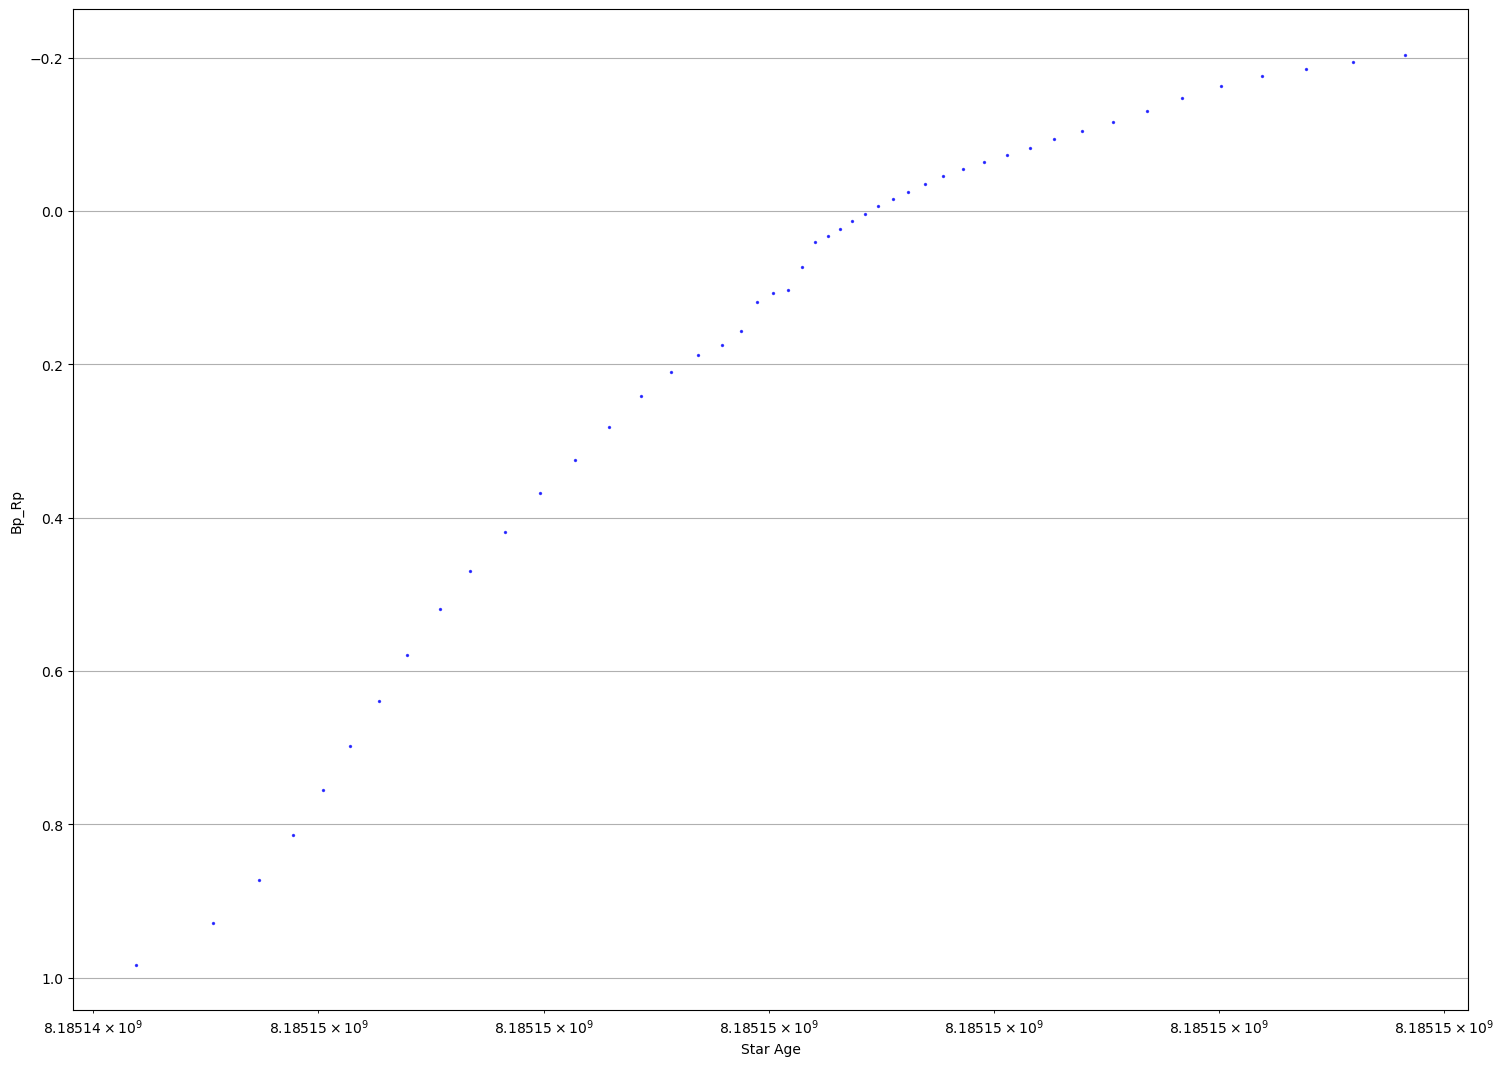

In [30]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import read_mist_models

# Step 1: Change directory to the folder containing .eep.cmd files
os.chdir('.')  # Update this to your directory path

# Step 2: Plot all .eep.cmd files in a single plot
eep_cmd_files = glob.glob('*.eep.cmd')
eep_cmd_files.sort()

# Consider only the first 15 files
eep_cmd_files = eep_cmd_files[3:4]
plt.figure(figsize=(18, 13))

# # Consider only the first 15 files
# eep_cmd_files = eep_cmd_files[:1]

for eep_cmd_file in eep_cmd_files:
    eepcmd = read_mist_models.EEPCMD(eep_cmd_file)
    A = eepcmd.eepcmds['star_age']
    T = eepcmd.eepcmds['log_Teff']
    L = eepcmd.eepcmds['log_L']
    B = eepcmd.eepcmds['Gaia_BP_EDR3']
    R = eepcmd.eepcmds['Gaia_RP_EDR3']
    G = eepcmd.eepcmds['Gaia_G_EDR3']
    P = eepcmd.eepcmds['phase']
    # plt.scatter(A, B-R, s=2, color='blue', alpha=0.7)
    # eepcmd.plot_CMD(['Gaia_BP_EDR3', 'Gaia_RP_EDR3', 'star_age'], fignum=0, phases=[5, 6])

    # Filter the data to include only some ages years
    mask = (P == 6) & (A >= 8185145.0e3) & (A <= 8185145.3e3)
    A_filtered = A[mask]
    B_filtered = B[mask]
    R_filtered = R[mask]
    G_filtered = G[mask]
    
    plt.scatter(A_filtered, B_filtered - R_filtered, s=2, color='blue', alpha=0.7)

# Adding labels and grid
plt.xlabel('Star Age')
plt.ylabel("Bp_Rp")
# plt.scatter(0.932, -5.262, color='green', s=4, label='2164190662780979968')
plt.xscale("log")
plt.gca().invert_yaxis()  # Invert the y-axis to match astronomical convention
plt.grid(True)

# # Save the plot to a file
# output_path = 'Bp_Rp_3.png'  # Update with your desired output path
# plt.savefig(output_path, format='png')

# Show the plot (optional)
plt.show()

Reading in: 0030000M.track.eep.cmd
Reading in: 0030000M.track.eep.cmd


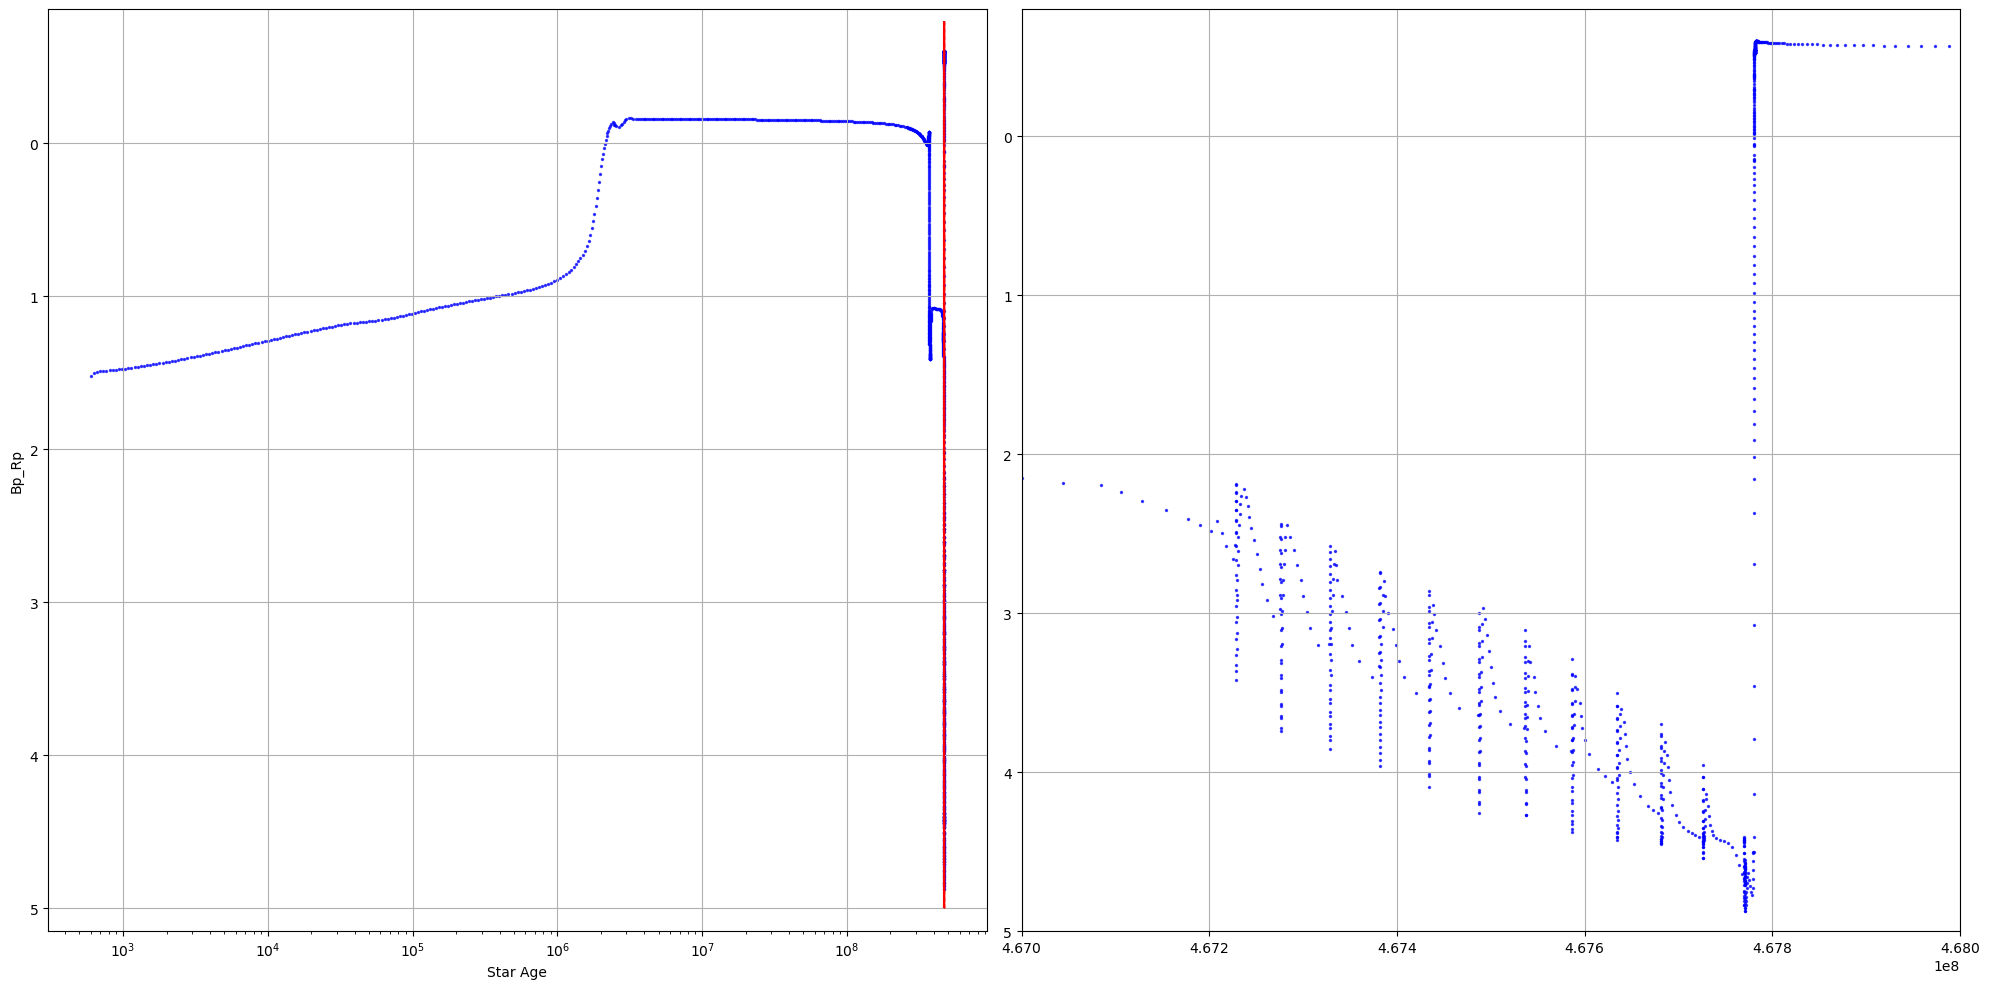

In [42]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import read_mist_models
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

# Step 1: Change directory to the folder containing .eep.cmd files
os.chdir('.')  # Update this to your directory path

# Step 2: Plot all .eep.cmd files in a single plot
eep_cmd_files = glob.glob('*.eep.cmd')
eep_cmd_files.sort()

# Consider only the specific files
eep_cmd_files = eep_cmd_files[2:3]

# Create the combined plot
fig_main, (ax_combined_main, ax_combined_zoomed) = plt.subplots(1, 2, figsize=(20, 10))

# Plot the main figure
for eep_cmd_file in eep_cmd_files:
    eepcmd = read_mist_models.EEPCMD(eep_cmd_file)
    A = eepcmd.eepcmds['star_age']
    B = eepcmd.eepcmds['Gaia_BP_EDR3']
    R = eepcmd.eepcmds['Gaia_RP_EDR3']
    ax_combined_main.scatter(A, B - R, s=2, color='blue', alpha=0.7)

ax_combined_main.set_xlabel('Star Age')
ax_combined_main.set_ylabel("Bp_Rp")
ax_combined_main.set_xscale("log")
ax_combined_main.invert_yaxis()  # Invert the y-axis to match astronomical convention
ax_combined_main.grid(True)

# Define the region to zoom in
x1, x2, y1, y2 = 4.67*1e8, 4.68*1e8, -0.8, 5.0

# Plot the zoomed figure
for eep_cmd_file in eep_cmd_files:
    eepcmd = read_mist_models.EEPCMD(eep_cmd_file)
    A = eepcmd.eepcmds['star_age']
    B = eepcmd.eepcmds['Gaia_BP_EDR3']
    R = eepcmd.eepcmds['Gaia_RP_EDR3']
    ax_combined_zoomed.scatter(A, B - R, s=2, color='blue', alpha=0.7)

ax_combined_zoomed.set_xlim(x1, x2)
ax_combined_zoomed.set_ylim(y1, y2)
# ax_combined_zoomed.set_xscale("log")
ax_combined_zoomed.invert_yaxis()
ax_combined_zoomed.grid(True)

# Add a rectangle to the main plot to show the zoomed area
rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1, edgecolor='red', facecolor='none')
ax_combined_main.add_patch(rect)

# Connect the main plot with the zoomed plot using lines
lines = [
    ((x1, y1), (x1, y2)),
    ((x1, y1), (x2, y1)),
    ((x2, y2), (x1, y2)),
    ((x2, y2), (x2, y1))
]

for line in lines:
    line = plt.Line2D(*zip(*line), color="red", linewidth=1, linestyle='--')
    ax_combined_main.add_line(line)

# Manually add lines to connect the zoomed area to the zoomed inset
fig_main.add_artist(plt.Line2D([x1, x1], [y1, y2], transform=ax_combined_main.transData, color='red', linestyle='--'))
fig_main.add_artist(plt.Line2D([x1, x2], [y1, y1], transform=ax_combined_main.transData, color='red', linestyle='--'))
fig_main.add_artist(plt.Line2D([x2, x2], [y2, y1], transform=ax_combined_main.transData, color='red', linestyle='--'))
fig_main.add_artist(plt.Line2D([x2, x1], [y2, y2], transform=ax_combined_main.transData, color='red', linestyle='--'))

# Adjust the layout
fig_main.tight_layout()

# Show the combined plot
plt.show()

Reading in: 0073000M.track.eep.cmd


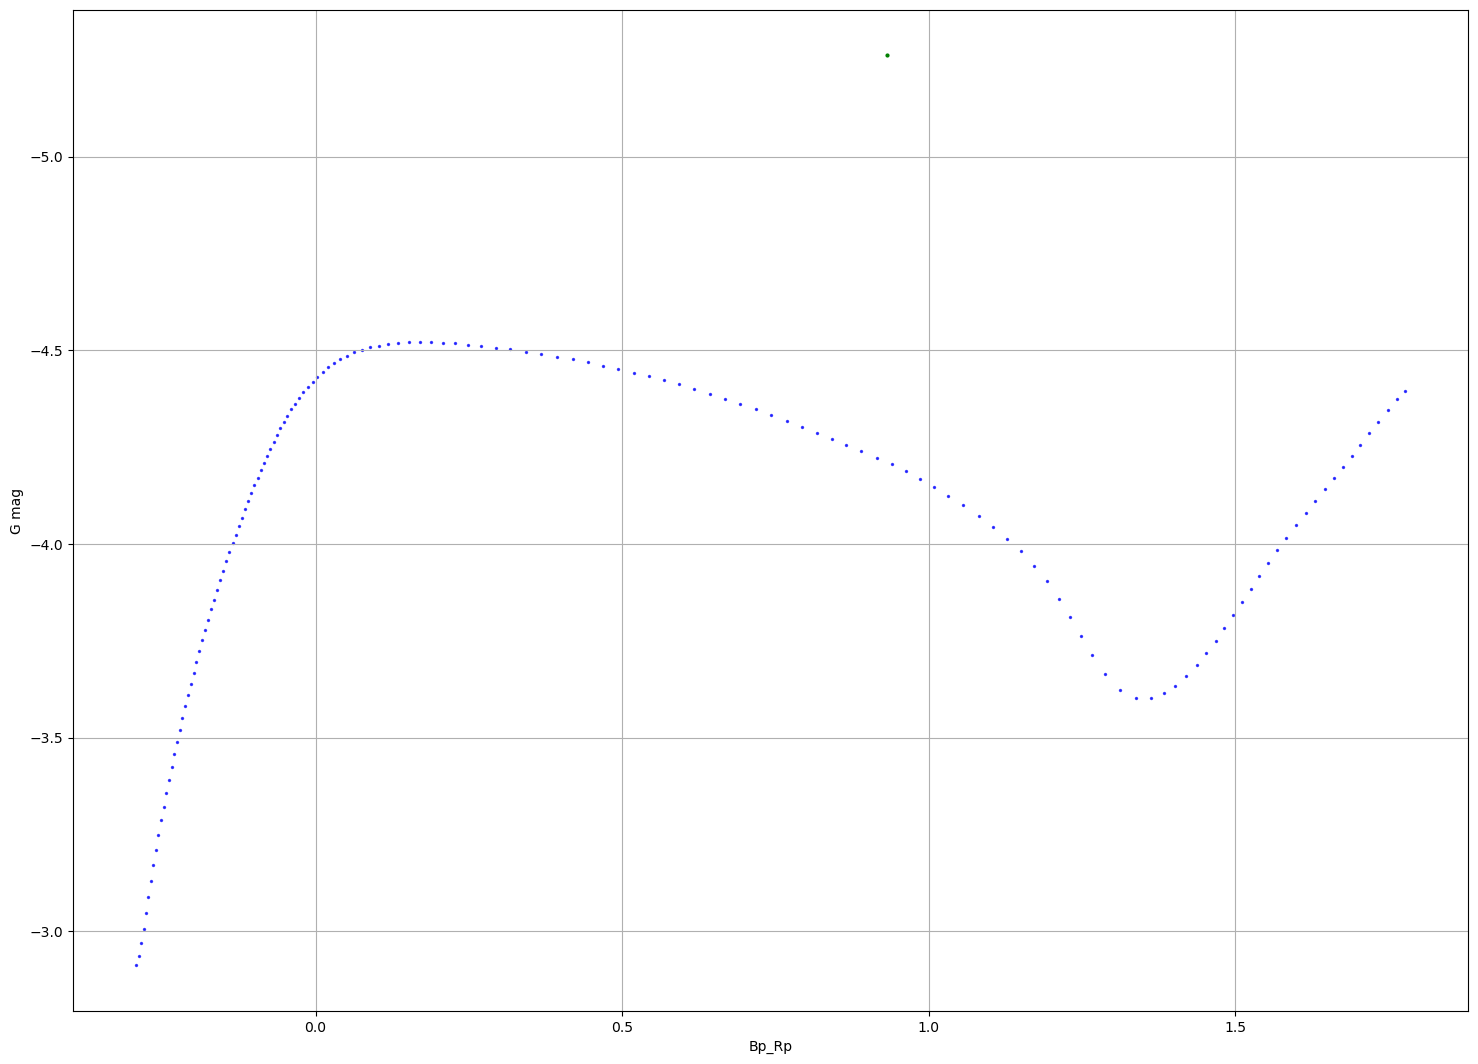

In [457]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import read_mist_models

# Step 1: Change directory to the folder containing .eep.cmd files
os.chdir('.')  # Update this to your directory path

# Step 2: Plot all .eep.cmd files in a single plot
eep_cmd_files = glob.glob('*.eep.cmd')
eep_cmd_files.sort()

# Consider only the first 15 files
eep_cmd_files = eep_cmd_files[52:53]
plt.figure(figsize=(18, 13))

# # Consider only the first 15 files
# eep_cmd_files = eep_cmd_files[:1]

for eep_cmd_file in eep_cmd_files:
    eepcmd = read_mist_models.EEPCMD(eep_cmd_file)
    A = eepcmd.eepcmds['star_age']
    T = eepcmd.eepcmds['log_Teff']
    L = eepcmd.eepcmds['log_L']
    B = eepcmd.eepcmds['Gaia_BP_EDR3']
    R = eepcmd.eepcmds['Gaia_RP_EDR3']
    G = eepcmd.eepcmds['Gaia_G_EDR3']
    P = eepcmd.eepcmds['phase']
    # plt.scatter(B-R, G, s=2, color='blue', alpha=0.7)

    # Filter the data to include only some ages years
    mask = (P == 2)
    A_filtered = A[mask]
    B_filtered = B[mask]
    R_filtered = R[mask]
    G_filtered = G[mask]
    
    plt.scatter(B_filtered - R_filtered, G_filtered, s=2, color='blue', alpha=0.7)

# Adding labels and grid
plt.xlabel('Bp_Rp')
plt.ylabel('G mag')
plt.scatter(0.932, -5.262, color='green', s=4, label='2164190662780979968')
# plt.xscale("log")
plt.gca().invert_yaxis()  # Invert the y-axis to match astronomical convention
plt.grid(True)

# Save the plot to a file
output_path = 'Bp_Rp_3S_Flash.png'  # Update with your desired output path
plt.savefig(output_path, format='png')

# Show the plot (optional)
plt.show()

In [48]:
%cd "/home/dutta/Downloads/MIST_ET"

/home/dutta/Downloads/MIST_ET


Reading in: 0011000M.track.eep.cmd


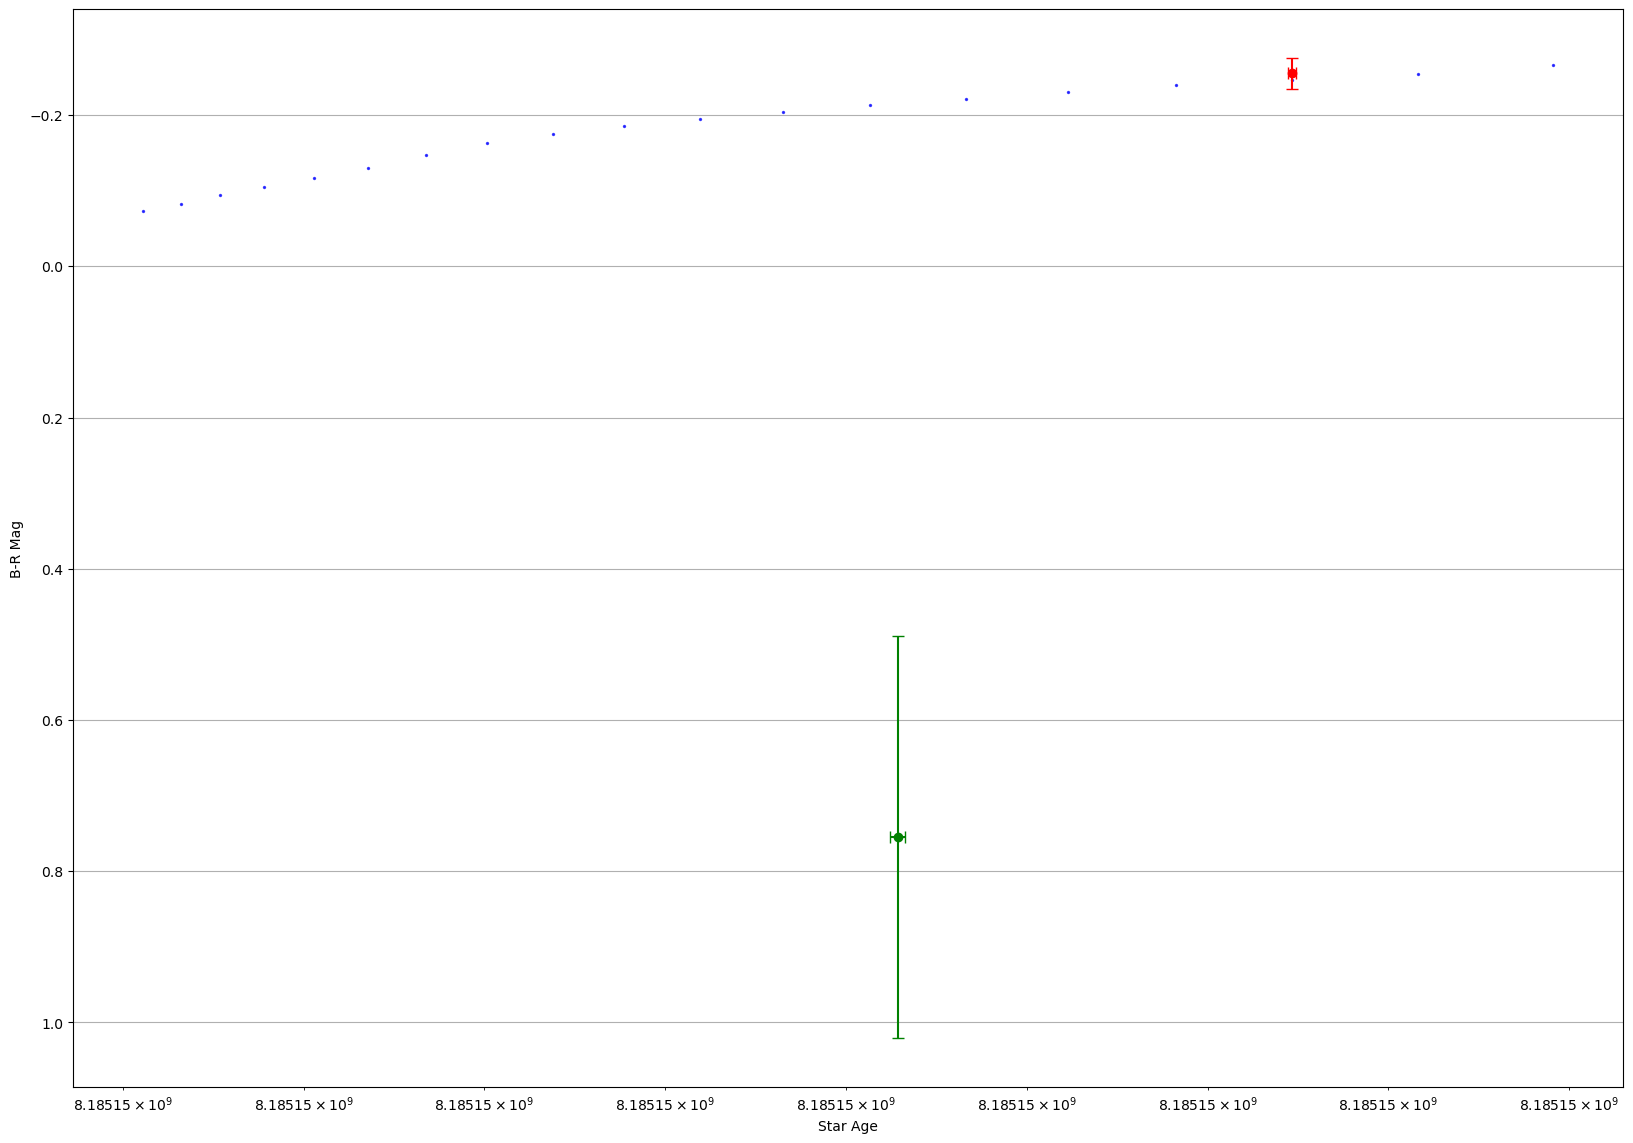

In [6]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import read_mist_models

# Step 1: Change directory to the folder containing .eep.cmd files
os.chdir('.')  # Update this to your directory path

# Step 2: Plot all .eep.cmd files in a single plot
eep_cmd_files = glob.glob('*.eep.cmd')
eep_cmd_files.sort()
plt.figure(figsize=(20, 14))

# Consider only the first 15 files
eep_cmd_files = eep_cmd_files[3:4]

for eep_cmd_file in eep_cmd_files:
    eepcmd = read_mist_models.EEPCMD(eep_cmd_file)
    A = eepcmd.eepcmds['star_age']
    T = eepcmd.eepcmds['log_Teff']
    L = eepcmd.eepcmds['log_L']
    B = eepcmd.eepcmds['Gaia_BP_EDR3']
    R = eepcmd.eepcmds['Gaia_RP_EDR3']
    G = eepcmd.eepcmds['Gaia_G_EDR3']
    P = eepcmd.eepcmds['phase']
    # plt.scatter(A, B-R, s=2, color='blue', alpha=0.7)
    
    # Filter the data to include only some ages years
    mask = (P >= 6) & (A >= 8.1851452e9) & (A <= 8.1851454e9)
    A_filtered = A[mask]
    B_filtered = B[mask]
    R_filtered = R[mask]
    
    plt.scatter(A_filtered, B_filtered - R_filtered, s=2, color='blue', alpha=0.7)

# Adding two points:
plt.errorbar(8185145361.6869, -0.255, fmt='o', color='red', yerr=0.02, xerr=0.5, capsize=4, label='GAIA DR3')
plt.errorbar(8185145307.1555, 0.755, fmt='o', color='green', yerr=0.266, xerr=1.0, capsize=4, label='APPLAUSE Archive DR4')

# Adding labels and grid
plt.xlabel('Star Age')
plt.ylabel("B-R Mag")
plt.xscale("log")
plt.gca().invert_yaxis()  # Invert the y-axis to match astronomical convention
plt.grid(True)

# Save the plot to a file
output_path = '2019880203996185472_B-R.png'  # Update with your desired output path
plt.savefig(output_path, format='png')

# Show the plot (optional)
plt.show()

In [115]:
from astroquery.simbad import Simbad

# Configure Simbad to return all available identifiers
Simbad.add_votable_fields('ids')

# Query Simbad using the Gaia DR3 identifier (as Simbad uses DR2 for cross-matching)
result = Simbad.query_object('Gaia DR2 2165269592921806464')

# Print the result
print(result)

    MAIN_ID           RA      ... SCRIPT_NUMBER_ID
                   "h:m:s"    ...                 
--------------- ------------- ... ----------------
TYC 3592-1278-1 21 08 16.6535 ...                1


In [403]:
# import numpy as np
# from astroquery.gaia import Gaia
# from isochrones.mist import MIST_EvolutionTrack
# from isochrones import StarModel
# import matplotlib.pyplot as plt

# def get_gaia_star_data(gaia_id):
#     query = f"SELECT * FROM gaiadr3.gaia_source WHERE source_id = {gaia_id}"
#     job = Gaia.launch_job(query)
#     result = job.get_results()
#     return result

# def calculate_distance(parallax):
#     # Convert parallax in milliarcseconds to distance in parsecs
#     distance = 1000 / parallax
#     return distance

# def calculate_luminosity(g_mag, distance):
#     # Calculate absolute magnitude
#     M_g = g_mag - 5 * (np.log10(distance) - 1)
#     # Solar absolute magnitude in Gaia G-band
#     M_sun = 4.67
#     # Calculate luminosity in terms of solar luminosity
#     luminosity = 10 ** (-0.4 * (M_g - M_sun))
#     return luminosity

# def estimate_mass_age(temperature, luminosity):
#     # Use MIST isochrones to estimate mass and age
#     mist = MIST_EvolutionTrack()
#     # Assume an uncertainty of 100 K for temperature and 0.1 dex for logL
#     star = StarModel(mist, Teff=(temperature, 100), logL=(np.log10(luminosity), 0.1))
#     fit = star.fit()
#     mass = fit.samples['mass'].mean()
#     age = fit.samples['age'].mean()
#     return mass, age

# def evolutionary_stage(teff, luminosity):
#     # Determine evolutionary stage using HR diagram
#     if teff > 5500 and luminosity < 10:
#         return "Main Sequence"
#     elif teff < 5500 and luminosity > 10:
#         return "Giant"
#     else:
#         return "Other"

# def main(gaia_id):
#     star_data = get_gaia_star_data(gaia_id)
#     parallax = star_data['parallax'][0]
#     teff = star_data['teff_gspphot'][0]
#     g_mag = star_data['phot_g_mean_mag'][0]
    
#     distance = calculate_distance(parallax)
#     luminosity = calculate_luminosity(g_mag, distance)
#     mass, age = estimate_mass_age(teff, luminosity)
#     stage = evolutionary_stage(teff, luminosity)
    
#     print(f"Gaia DR3 ID: {gaia_id}")
#     print(f"Distance: {distance:.2f} pc")
#     print(f"Effective Temperature: {teff:.2f} K")
#     print(f"Luminosity: {luminosity:.2f} Lsun")
#     print(f"Mass: {mass:.2f} Msun")
#     print(f"Age: {age:.2f} Gyr")
#     print(f"Evolutionary Stage: {stage}")

# # Replace 'YOUR_GAIA_DR3_ID' with the actual Gaia DR3 ID of the star you want to analyze
# gaia_id = '4279147045960871296'
# main(gaia_id)

NameError: name 'pymultinest' is not defined

In [ ]:
%cd "/home/dutta/Downloads/MIST_ET"

Reading in: 0200000M.track.eep.cmd
Reading in: 0080000M.track.eep.cmd
Reading in: 0030000M.track.eep.cmd
Reading in: 0440000M.track.eep.cmd
Reading in: 0120000M.track.eep.cmd
Reading in: 0140000M.track.eep.cmd
Reading in: 0060000M.track.eep.cmd
Reading in: 0570000M.track.eep.cmd
Reading in: 0090000M.track.eep.cmd
Reading in: 0070000M.track.eep.cmd
Reading in: 0560000M.track.eep.cmd
Reading in: 0050000M.track.eep.cmd
Reading in: 0330000M.track.eep.cmd
Reading in: 0600000M.track.eep.cmd
Reading in: 0430000M.track.eep.cmd
Reading in: 0480000M.track.eep.cmd
Reading in: 0190000M.track.eep.cmd
Reading in: 0150000M.track.eep.cmd
Reading in: 0100000M.track.eep.cmd
Reading in: 0460000M.track.eep.cmd
Reading in: 0510000M.track.eep.cmd
Reading in: 0040000M.track.eep.cmd
Reading in: 0400000M.track.eep.cmd
Reading in: 0550000M.track.eep.cmd
Reading in: 0410000M.track.eep.cmd
Reading in: 0530000M.track.eep.cmd
Reading in: 0280000M.track.eep.cmd
Reading in: 0220000M.track.eep.cmd
Reading in: 0580000M

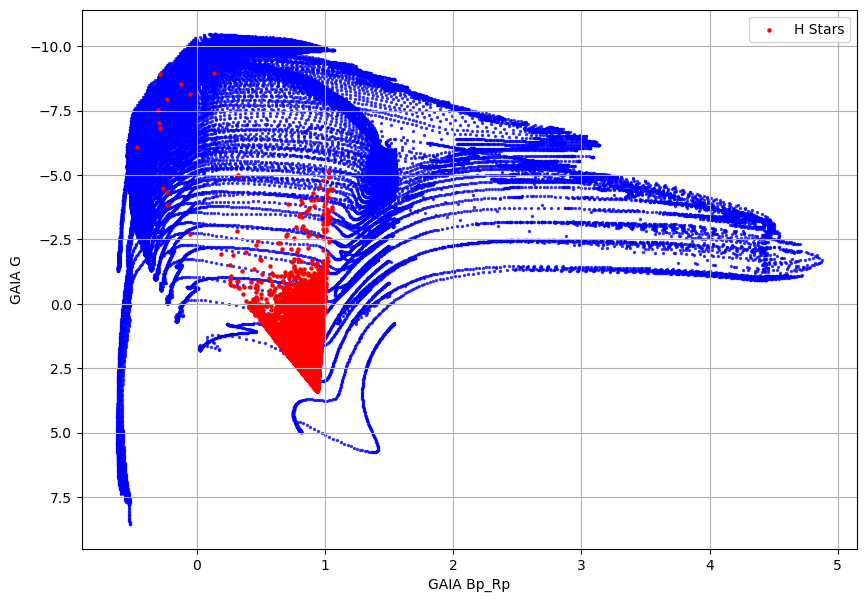

In [7]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import read_mist_models

# Step 1: Change directory to the folder containing .eep.cmd files
os.chdir('.')  # Update this to your directory path

# Step 2: Plot all .eep.cmd files in a single plot
eep_cmd_files = glob.glob('*.eep.cmd')
plt.figure(figsize=(10, 7))

for eep_cmd_file in eep_cmd_files:
    eepcmd = read_mist_models.EEPCMD(eep_cmd_file)
    B = eepcmd.eepcmds['Gaia_BP_EDR3']
    R = eepcmd.eepcmds['Gaia_RP_EDR3']
    G = eepcmd.eepcmds['Gaia_G_EDR3']
    plt.scatter(B-R, G, s=2, color='blue', alpha=0.7)

# Adding labels and grid
plt.xlabel('GAIA Bp_Rp')
plt.ylabel('GAIA G')
plt.gca().invert_yaxis()  # Invert the y-axis to match astronomical convention
plt.grid(True)

# Step 3: Overlay with scatter plot from another .txt file
# Read the data from the text file
file_path = 'stars_e_re.txt'  # Update with your file path
data = pd.read_csv(file_path, delim_whitespace=True)

# Extract absolute magnitude and Bp_Rp
absolute_mag = np.array(data.iloc[:, 1])  # Assuming the 1st column is the absolute magnitude
bp_rp = np.array(data.iloc[:, 2])         # Assuming the 2nd column is Bp_Rp

# Plot the new data
plt.scatter(bp_rp, absolute_mag, s=5, color='red', label='H Stars')

# Add legend
plt.legend()

# Save the plot to a file
output_path = 'image.png'  # Update with your desired output path
plt.savefig(output_path, format='png')

# Show the plot (optional)
plt.show()

Reading in: 0010000M.track.eep.cmd
Reading in: 0020000M.track.eep.cmd
Reading in: 0030000M.track.eep.cmd
Reading in: 0040000M.track.eep.cmd
Reading in: 0050000M.track.eep.cmd
Reading in: 0060000M.track.eep.cmd
Reading in: 0070000M.track.eep.cmd
Reading in: 0080000M.track.eep.cmd
Reading in: 0090000M.track.eep.cmd
Reading in: 0100000M.track.eep.cmd
Reading in: 0110000M.track.eep.cmd
Reading in: 0120000M.track.eep.cmd
Reading in: 0130000M.track.eep.cmd
Reading in: 0140000M.track.eep.cmd
Reading in: 0150000M.track.eep.cmd
Reading in: 0160000M.track.eep.cmd
Reading in: 0170000M.track.eep.cmd
Reading in: 0180000M.track.eep.cmd
Reading in: 0190000M.track.eep.cmd
Reading in: 0200000M.track.eep.cmd
Reading in: 0210000M.track.eep.cmd
Reading in: 0220000M.track.eep.cmd
Reading in: 0230000M.track.eep.cmd
Reading in: 0240000M.track.eep.cmd
Reading in: 0250000M.track.eep.cmd
Reading in: 0260000M.track.eep.cmd
Reading in: 0270000M.track.eep.cmd
Reading in: 0280000M.track.eep.cmd
Reading in: 0290000M

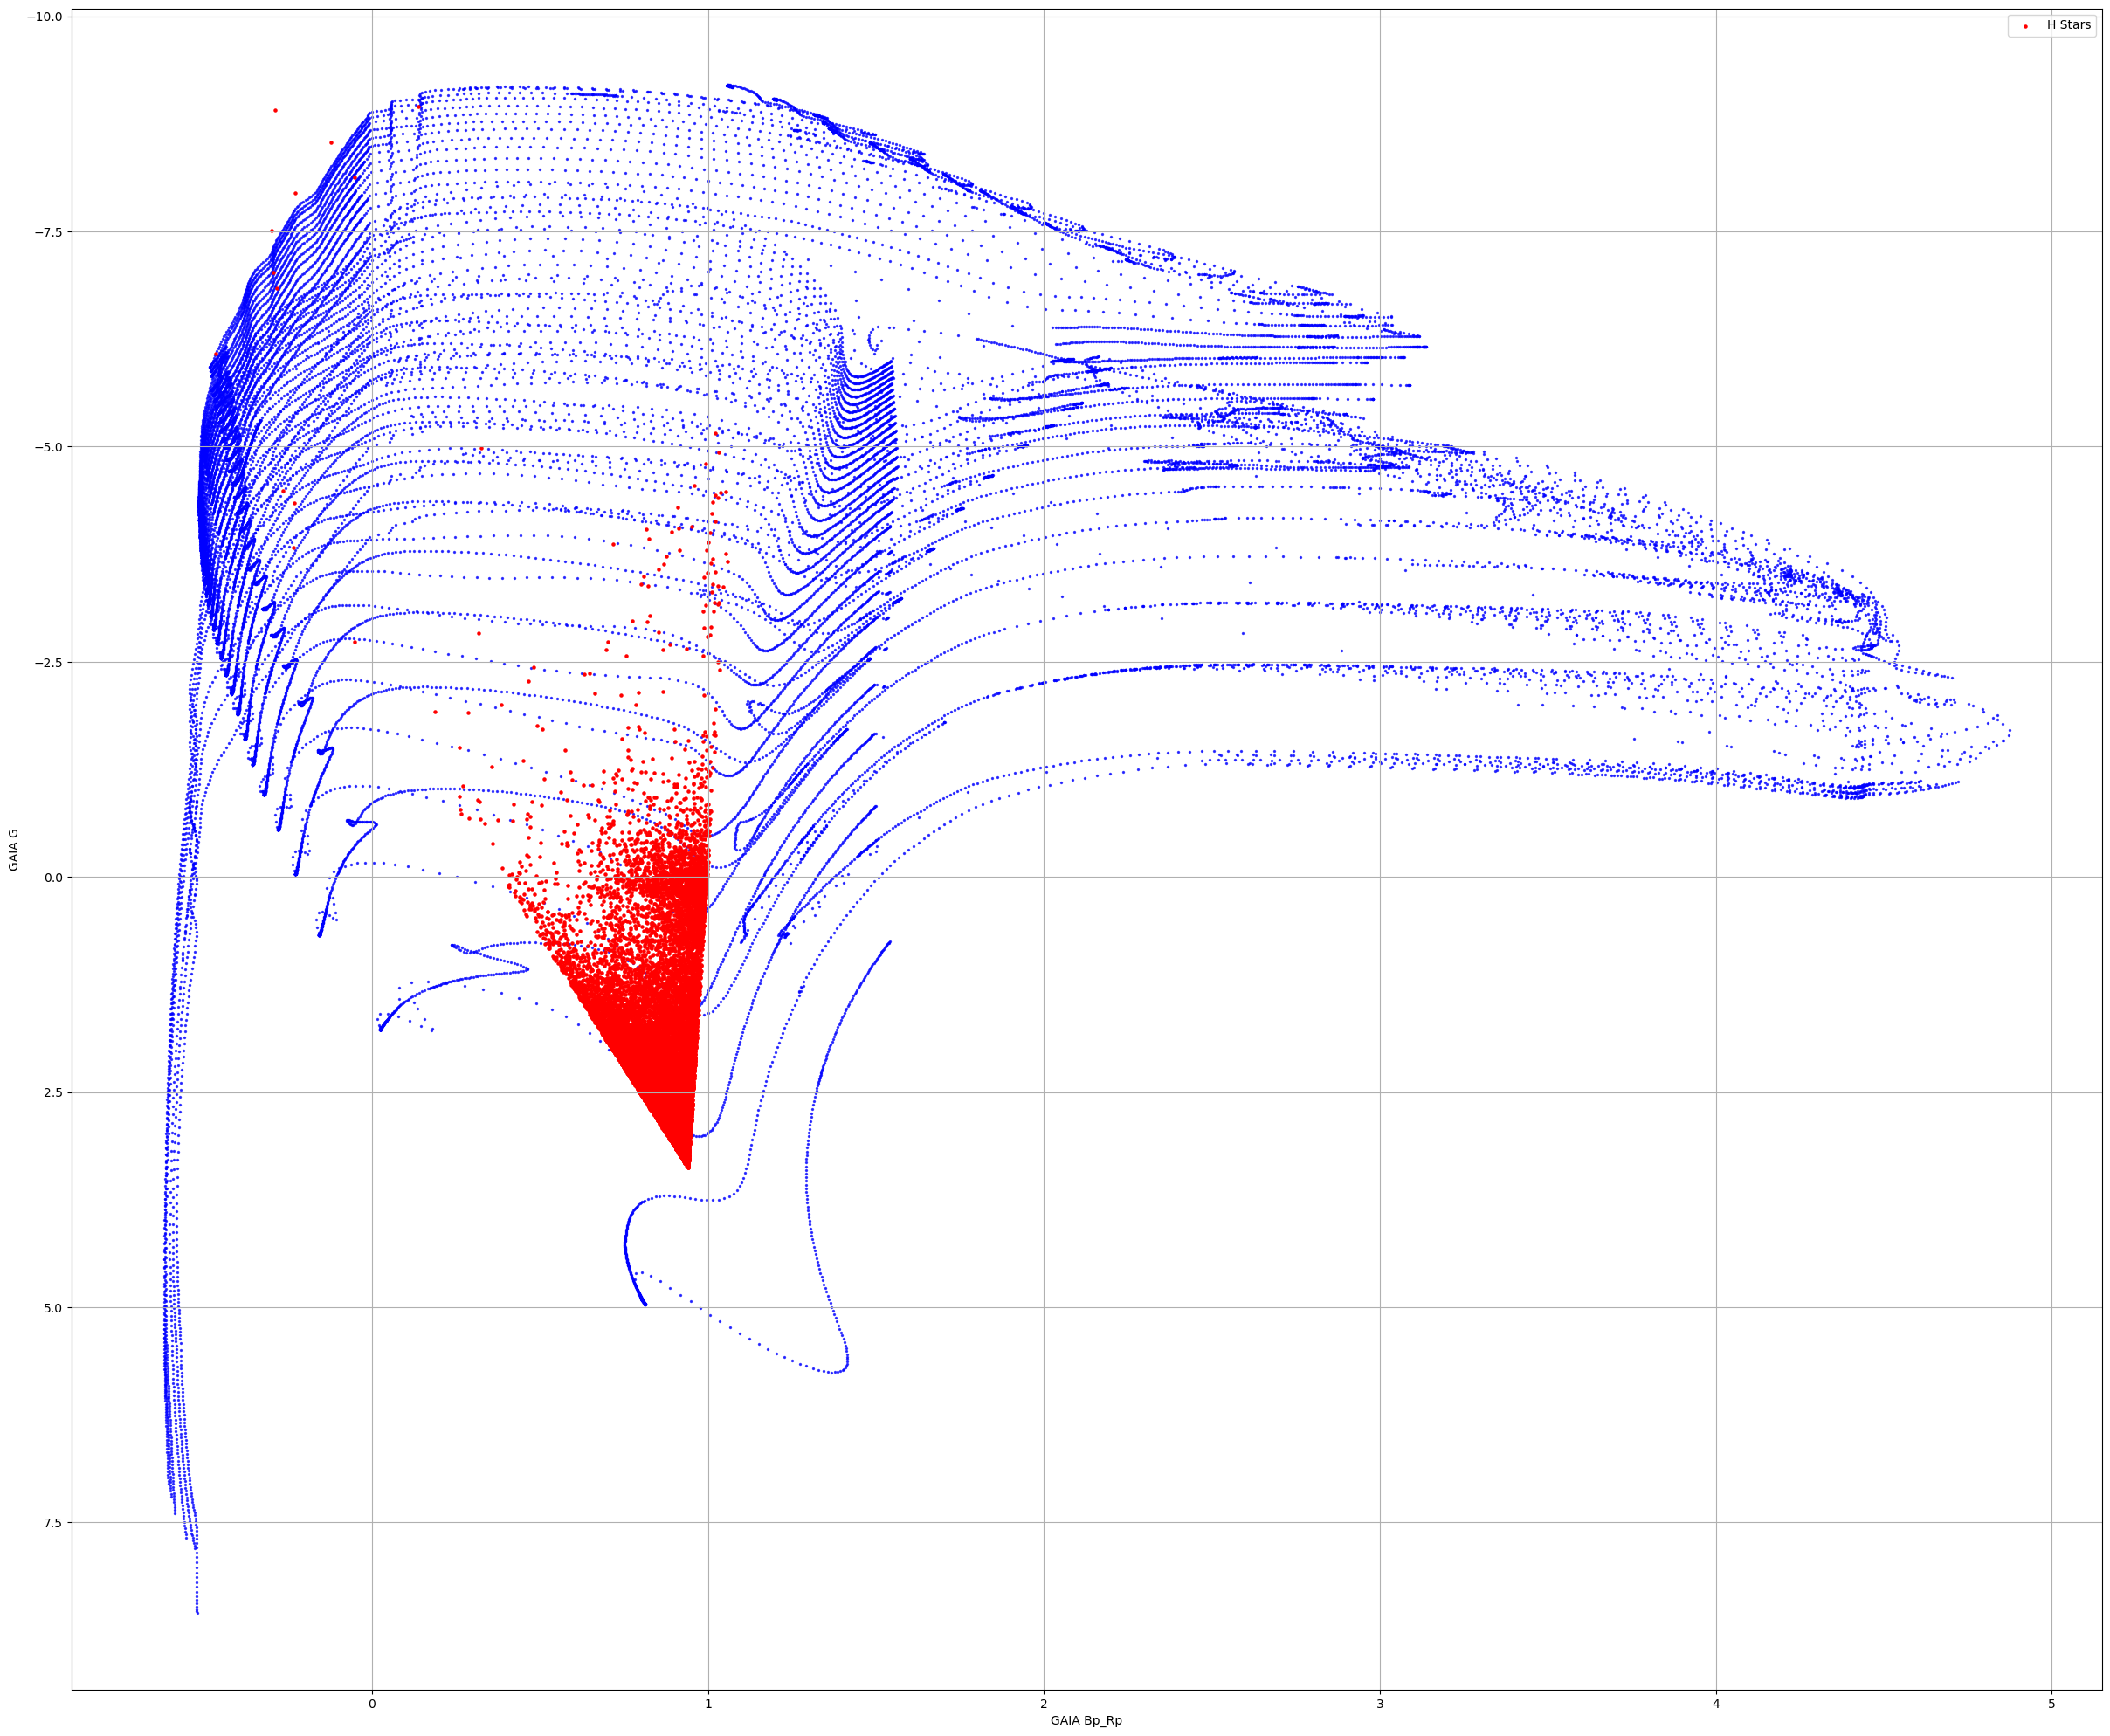

In [8]:
import os
import glob
import matplotlib.pyplot as plt
import pandas as pd
import read_mist_models
import numpy as np

# Step 1: Change directory to the folder containing .eep.cmd files
os.chdir('.')  # Update this to your directory path

# Step 2: Retrieve and sort .eep.cmd files
eep_cmd_files = glob.glob('*.eep.cmd')
eep_cmd_files.sort()  # Sort files by filename

# Plot only the first 30 files
plt.figure(figsize=(30, 25))

for eep_cmd_file in eep_cmd_files[:30]:
    eepcmd = read_mist_models.EEPCMD(eep_cmd_file)
    B = eepcmd.eepcmds['Gaia_BP_EDR3']
    R = eepcmd.eepcmds['Gaia_RP_EDR3']
    G = eepcmd.eepcmds['Gaia_G_EDR3']
    plt.scatter(B - R, G, s=2, color='blue', alpha=0.7)

# Adding labels and grid
plt.xlabel('GAIA Bp_Rp')
plt.ylabel('GAIA G')
plt.gca().invert_yaxis()  # Invert the y-axis to match astronomical convention
plt.grid(True)

# Step 3: Overlay with scatter plot from another .txt file
# Read the data from the text file
file_path = 'stars_e_re.txt'  # Update with your file path
data = pd.read_csv(file_path, delim_whitespace=True)

# Extract absolute magnitude and Bp_Rp
absolute_mag = np.array(data.iloc[:, 1])  # Assuming the 1st column is the absolute magnitude
bp_rp = np.array(data.iloc[:, 2])         # Assuming the 2nd column is Bp_Rp

# Plot the new data
plt.scatter(bp_rp, absolute_mag, s=5, color='red', label='H Stars')

# Add legend
plt.legend()

# Save the plot to a file
output_path = 'total_track.png'  # Update with your desired output path
plt.savefig(output_path, format='png')

# Show the plot (optional)
plt.show()

Reading in: 0010000M.track.eep.cmd
Reading in: 0020000M.track.eep.cmd
Reading in: 0030000M.track.eep.cmd
Reading in: 0040000M.track.eep.cmd
Reading in: 0050000M.track.eep.cmd
Reading in: 0060000M.track.eep.cmd
Reading in: 0070000M.track.eep.cmd
Reading in: 0080000M.track.eep.cmd
Reading in: 0090000M.track.eep.cmd
Reading in: 0100000M.track.eep.cmd
Reading in: 0110000M.track.eep.cmd
Reading in: 0120000M.track.eep.cmd
Reading in: 0130000M.track.eep.cmd
Reading in: 0140000M.track.eep.cmd
Reading in: 0150000M.track.eep.cmd
Reading in: 0160000M.track.eep.cmd
Reading in: 0170000M.track.eep.cmd
Reading in: 0180000M.track.eep.cmd
Reading in: 0190000M.track.eep.cmd
Reading in: 0200000M.track.eep.cmd
Reading in: 0210000M.track.eep.cmd
Reading in: 0220000M.track.eep.cmd
Reading in: 0230000M.track.eep.cmd
Reading in: 0240000M.track.eep.cmd
Reading in: 0250000M.track.eep.cmd
Reading in: 0260000M.track.eep.cmd
Reading in: 0270000M.track.eep.cmd
Reading in: 0280000M.track.eep.cmd
Reading in: 0290000M

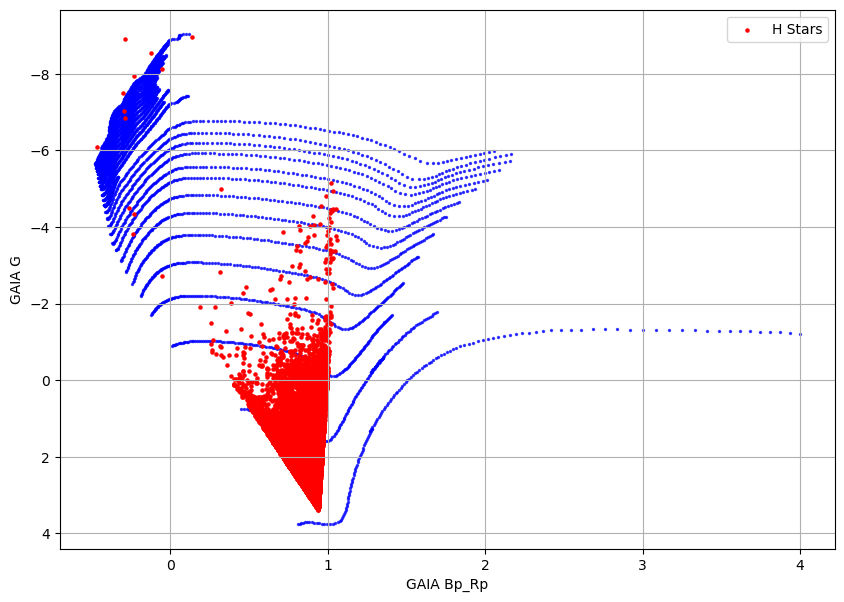

In [9]:
import os
import glob
import matplotlib.pyplot as plt
import pandas as pd
import read_mist_models
import numpy as np

# Step 1: Change directory to the folder containing .eep.cmd files
os.chdir('.')  # Update this to your directory path

# Step 2: Retrieve and sort .eep.cmd files
eep_cmd_files = glob.glob('*.eep.cmd')
eep_cmd_files.sort()  # Sort files by filename

# Plot only the first 30 files
plt.figure(figsize=(10, 7))

for eep_cmd_file in eep_cmd_files[:30]:
    eepcmd = read_mist_models.EEPCMD(eep_cmd_file)
    
    # Extract data
    B = eepcmd.eepcmds['Gaia_BP_EDR3']
    R = eepcmd.eepcmds['Gaia_RP_EDR3']
    G = eepcmd.eepcmds['Gaia_G_EDR3']
    phase = eepcmd.eepcmds['phase']
    
    # Plot only points where phase is -1
    mask = (phase == 2)
    plt.scatter(B[mask] - R[mask], G[mask], s=2, color='blue', alpha=0.7)
    
# Adding labels and grid
plt.xlabel('GAIA Bp_Rp')
plt.ylabel('GAIA G')
plt.gca().invert_yaxis()  # Invert the y-axis to match astronomical convention
# plt.gca().invert_xaxis()  # Invert the x-axis to match astronomical convention
plt.grid(True)

# Step 3: Overlay with scatter plot from another .txt file
# Read the data from the text file
file_path = 'stars_e_re.txt'  # Update with your file path
data = pd.read_csv(file_path, delim_whitespace=True)

# Extract absolute magnitude and Bp_Rp
absolute_mag = np.array(data.iloc[:, 1])  # Assuming the 1st column is the absolute magnitude
bp_rp = np.array(data.iloc[:, 2])         # Assuming the 2nd column is Bp_Rp

# Plot the new data
plt.scatter(bp_rp, absolute_mag, s=5, color='red', label='H Stars')

# Add legend
plt.legend()

# Save the plot to a file
output_path = 'SGB+RGB.png'  # Update with your desired output path
plt.savefig(output_path, format='png')

# Show the plot (optional)
plt.show()

Reading in: 0010000M.track.eep.cmd
Reading in: 0020000M.track.eep.cmd
Reading in: 0030000M.track.eep.cmd
Reading in: 0040000M.track.eep.cmd
Reading in: 0050000M.track.eep.cmd
Reading in: 0060000M.track.eep.cmd
Reading in: 0070000M.track.eep.cmd
Reading in: 0080000M.track.eep.cmd
Reading in: 0090000M.track.eep.cmd
Reading in: 0100000M.track.eep.cmd
Reading in: 0110000M.track.eep.cmd
Reading in: 0120000M.track.eep.cmd
Reading in: 0130000M.track.eep.cmd
Reading in: 0140000M.track.eep.cmd
Reading in: 0150000M.track.eep.cmd
Reading in: 0160000M.track.eep.cmd
Reading in: 0170000M.track.eep.cmd
Reading in: 0180000M.track.eep.cmd
Reading in: 0190000M.track.eep.cmd
Reading in: 0200000M.track.eep.cmd
Reading in: 0210000M.track.eep.cmd
Reading in: 0220000M.track.eep.cmd
Reading in: 0230000M.track.eep.cmd
Reading in: 0240000M.track.eep.cmd
Reading in: 0250000M.track.eep.cmd
Reading in: 0260000M.track.eep.cmd
Reading in: 0270000M.track.eep.cmd
Reading in: 0280000M.track.eep.cmd
Reading in: 0290000M

/tmp/ipykernel_244497/1953044455.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fastest_region['distance'] = np.sqrt(fastest_region['bp_rp'].diff()**2 + fastest_region['G'].diff()**2)


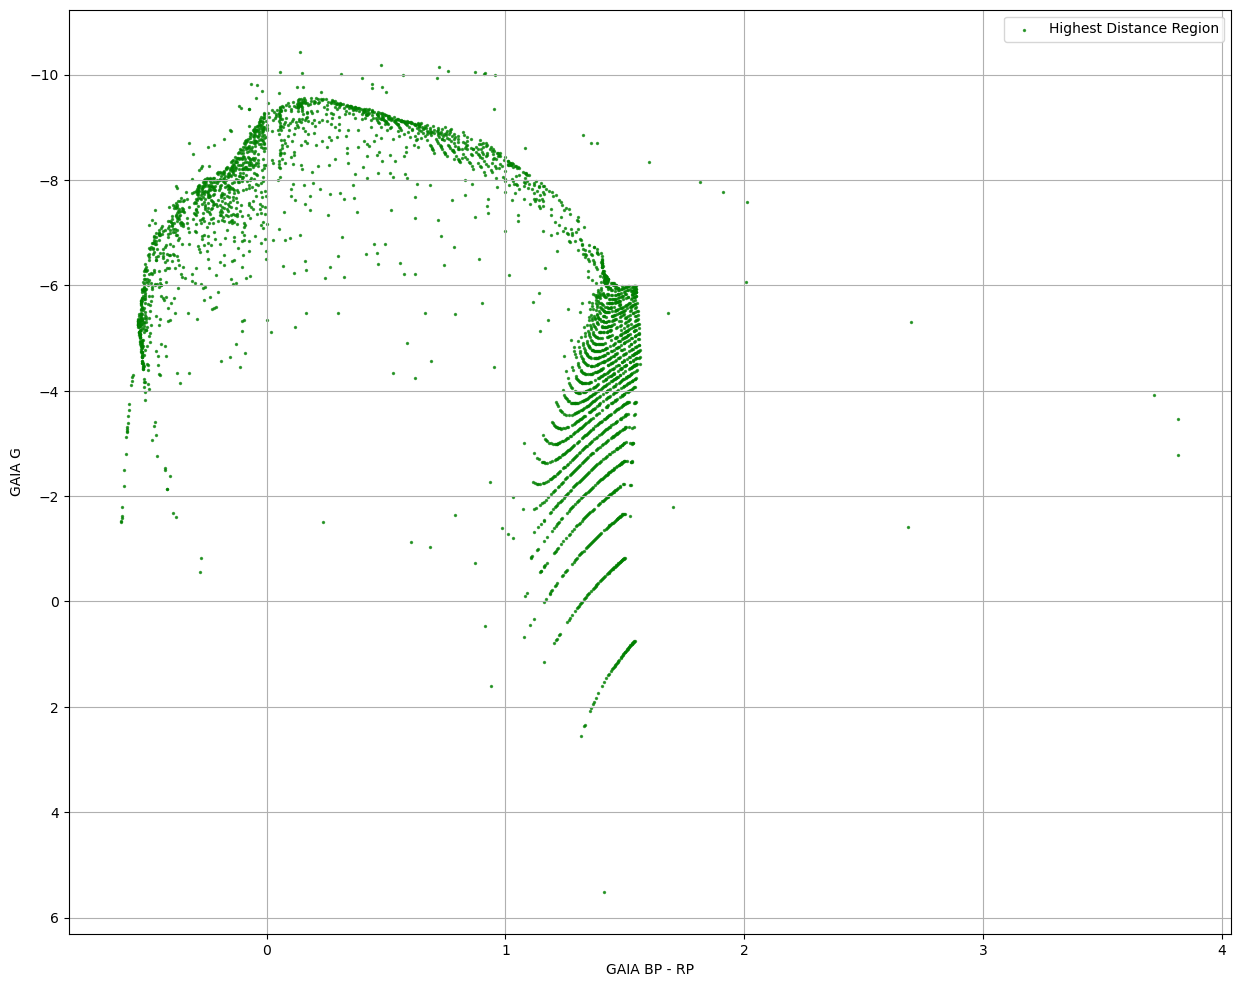

The average age difference for the highest distance regions is: 1.0761476761998592


In [10]:
import os
import glob
import matplotlib.pyplot as plt
import pandas as pd
import read_mist_models
import numpy as np
from scipy.spatial import distance

# Step 1: Change directory to the folder containing .eep.cmd files
os.chdir('.')  # Update this to your directory path

# Step 2: Retrieve and sort .eep.cmd files
eep_cmd_files = glob.glob('*.eep.cmd')
eep_cmd_files.sort()  # Sort files by filename

# Function to read synthetic star data from .eep.cmd files
def read_synthetic_data(eep_cmd_files):
    data = []
    for eep_cmd_file in eep_cmd_files:
        eepcmd = read_mist_models.EEPCMD(eep_cmd_file)
        B = eepcmd.eepcmds['Gaia_BP_EDR3']
        R = eepcmd.eepcmds['Gaia_RP_EDR3']
        G = eepcmd.eepcmds['Gaia_G_EDR3']
        age = eepcmd.eepcmds['star_age']
        bp_rp = B - R
        for i in range(len(B)):
            data.append([age[i], bp_rp[i], G[i]])
    return pd.DataFrame(data, columns=['star_age', 'bp_rp', 'G'])

# Read the data from the .eep.cmd files
df = read_synthetic_data(eep_cmd_files)

# Step 3: Calculate age differences and identify fastest evolving region
# Sort data by age to calculate age differences
df = df.sort_values('star_age')
df['age_diff'] = df['star_age'].diff().abs()

# Drop the first row with NaN age difference
df = df.dropna()

# Identify the fastest evolving regions
threshold = df['age_diff'].quantile(0.25)
fastest_region = df[df['age_diff'] <= threshold]

# Step 4: Calculate Cartesian distances in color-magnitude diagram for the fastest regions
fastest_region['distance'] = np.sqrt(fastest_region['bp_rp'].diff()**2 + fastest_region['G'].diff()**2)

# # Drop the first row with NaN distance
# fastest_region = fastest_region.dropna()

# Identify the regions with the highest distances
distance_threshold = fastest_region['distance'].quantile(0.75)
highest_distance_region = fastest_region[fastest_region['distance'] >= distance_threshold]

# Calculate the average age_diff for these regions
average_age_diff = highest_distance_region['age_diff'].mean()

# Plot the HR diagram with the highest distance regions highlighted
plt.figure(figsize=(15, 12))
# plt.scatter(df['bp_rp'], df['G'], s=2, color='blue', alpha=0.5, label='Synthetic Stars')
# plt.scatter(fastest_region['bp_rp'], fastest_region['G'], s=2, alpha=0.7, color='red', label='Fastest Evolving Region')
plt.scatter(highest_distance_region['bp_rp'], highest_distance_region['G'], s=2, alpha=0.7, color='green', label='Highest Distance Region')
plt.xlabel('GAIA BP - RP')
plt.ylabel('GAIA G')
plt.gca().invert_yaxis()  # Invert the y-axis to match astronomical convention
plt.legend()
plt.grid(True)

# Save the plot to a file
output_path = 'fastest_highest_distance_region_12.png'  # Update with your desired output path
plt.savefig(output_path, format='png')

# Show the plot
plt.show()

# Print the average age difference for the highest distance regions
print(f"The average age difference for the highest distance regions is: {average_age_diff}")

Reading in: 0010000M.track.eep.cmd
Reading in: 0020000M.track.eep.cmd
Reading in: 0030000M.track.eep.cmd
Reading in: 0040000M.track.eep.cmd
Reading in: 0050000M.track.eep.cmd
Reading in: 0060000M.track.eep.cmd
Reading in: 0070000M.track.eep.cmd
Reading in: 0080000M.track.eep.cmd
Reading in: 0090000M.track.eep.cmd
Reading in: 0100000M.track.eep.cmd
Reading in: 0110000M.track.eep.cmd
Reading in: 0120000M.track.eep.cmd
Reading in: 0130000M.track.eep.cmd
Reading in: 0140000M.track.eep.cmd
Reading in: 0150000M.track.eep.cmd
Reading in: 0160000M.track.eep.cmd
Reading in: 0170000M.track.eep.cmd
Reading in: 0180000M.track.eep.cmd
Reading in: 0190000M.track.eep.cmd
Reading in: 0200000M.track.eep.cmd
Reading in: 0210000M.track.eep.cmd
Reading in: 0220000M.track.eep.cmd
Reading in: 0230000M.track.eep.cmd
Reading in: 0240000M.track.eep.cmd
Reading in: 0250000M.track.eep.cmd
Reading in: 0260000M.track.eep.cmd
Reading in: 0270000M.track.eep.cmd
Reading in: 0280000M.track.eep.cmd
Reading in: 0290000M

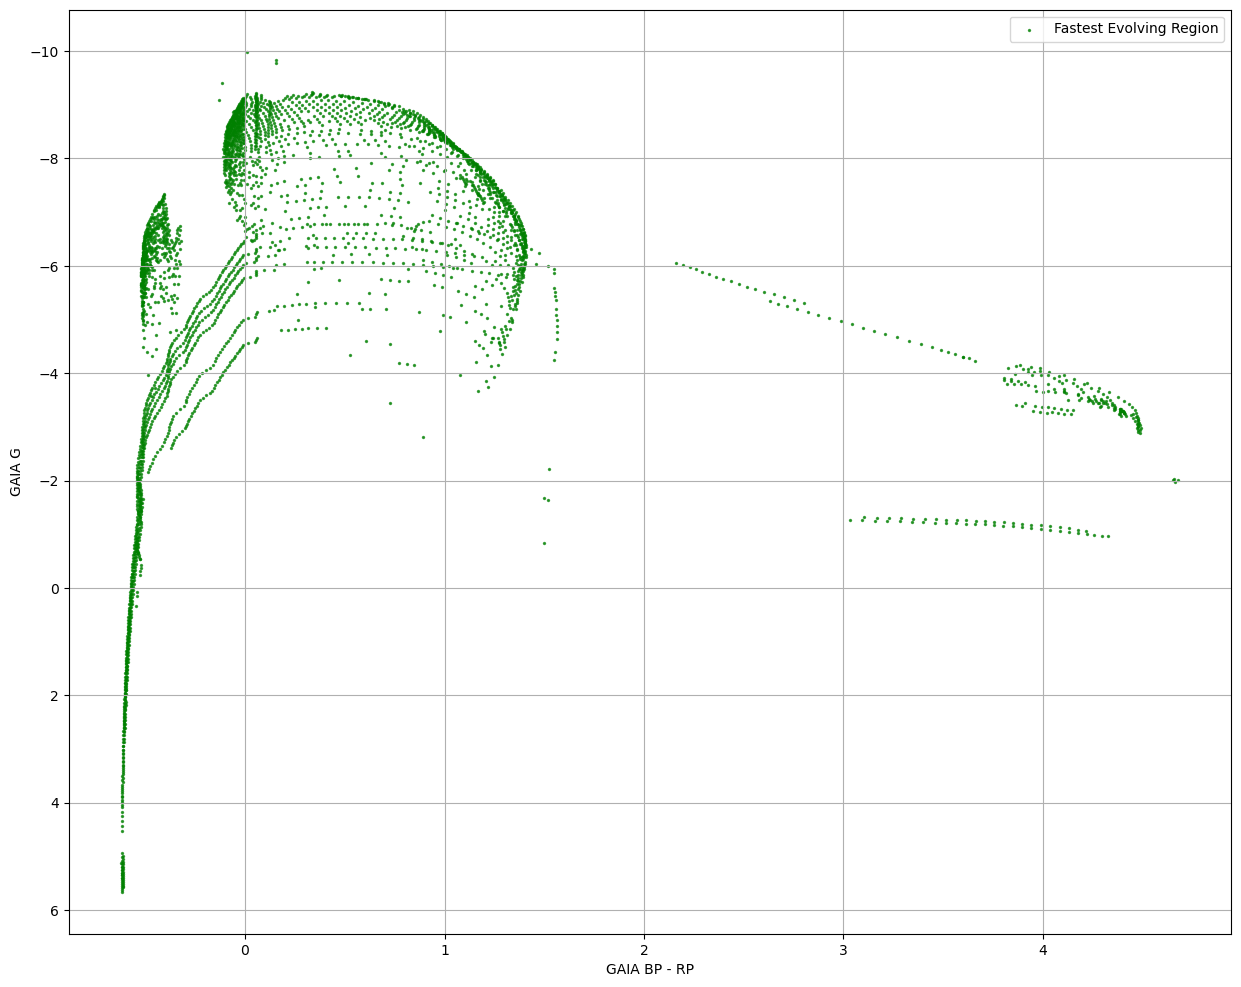

The average age difference for the fastest evolving regions is: 0.8708622504867165


In [18]:
import os
import glob
import matplotlib.pyplot as plt
import pandas as pd
import read_mist_models
import numpy as np
from scipy.spatial import distance

# Step 1: Change directory to the folder containing .eep.cmd files
os.chdir('.')  # Update this to your directory path

# Step 2: Retrieve and sort .eep.cmd files
eep_cmd_files = glob.glob('*.eep.cmd')
eep_cmd_files.sort()  # Sort files by filename

# # Consider only the first 40 files
# eep_cmd_files = eep_cmd_files[:40]

# Function to read synthetic star data from .eep.cmd files
def read_synthetic_data(eep_cmd_files):
    data = []
    for eep_cmd_file in eep_cmd_files:
        eepcmd = read_mist_models.EEPCMD(eep_cmd_file)
        B = eepcmd.eepcmds['Gaia_BP_EDR3']
        R = eepcmd.eepcmds['Gaia_RP_EDR3']
        G = eepcmd.eepcmds['Gaia_G_EDR3']
        age = eepcmd.eepcmds['star_age']
        bp_rp = B - R
        for i in range(len(B)):
            data.append([age[i], bp_rp[i], G[i]])
    return pd.DataFrame(data, columns=['star_age', 'bp_rp', 'G'])

# Read the data from the .eep.cmd files
df = read_synthetic_data(eep_cmd_files)

# Step 3: Calculate Cartesian distances in color-magnitude diagram
df['distance'] = np.sqrt(df['bp_rp'].diff()**2 + df['G'].diff()**2)

# Drop the first row with NaN distance
df = df.dropna()

# Identify the regions with the highest distances
distance_threshold = df['distance'].quantile(0.75)
highest_distance_region = df[df['distance'] >= distance_threshold]

# Step 4: Calculate age differences for the highest distance regions
highest_distance_region = highest_distance_region.sort_values('star_age')
highest_distance_region['age_diff'] = highest_distance_region['star_age'].diff().abs()

# # Drop the first row with NaN age difference
# highest_distance_region = highest_distance_region.dropna()

# Identify the fastest evolving regions among the highest distance regions
fast_threshold = highest_distance_region['age_diff'].quantile(0.25)
fastest_region = highest_distance_region[highest_distance_region['age_diff'] <= fast_threshold]

# Calculate the average age_diff for the fastest evolving regions
average_age_diff = fastest_region['age_diff'].mean()

# Plot the HR diagram with the highest distance regions highlighted
plt.figure(figsize=(15, 12))
# plt.scatter(df['bp_rp'], df['G'], s=2, color='blue', alpha=0.5, label='Synthetic Stars')
# plt.scatter(highest_distance_region['bp_rp'], highest_distance_region['G'], s=2, alpha=0.7, color='red', label='Highest Distance Region')
plt.scatter(fastest_region['bp_rp'], fastest_region['G'], s=2, alpha=0.7, color='green', label='Fastest Evolving Region')
plt.xlabel('GAIA BP - RP')
plt.ylabel('GAIA G')
plt.gca().invert_yaxis()  # Invert the y-axis to match astronomical convention
plt.legend()
plt.grid(True)

# Save the plot to a file
output_path = 'fastest_highest_distance_region_21.png'  # Update with your desired output path
plt.savefig(output_path, format='png')

# Show the plot
plt.show()

# Print the average age difference for the fastest evolving regions
print(f"The average age difference for the fastest evolving regions is: {average_age_diff}")

Reading in: 0010000M.track.eep.cmd
Reading in: 0020000M.track.eep.cmd
Reading in: 0030000M.track.eep.cmd
Reading in: 0040000M.track.eep.cmd
Reading in: 0050000M.track.eep.cmd
Reading in: 0060000M.track.eep.cmd
Reading in: 0070000M.track.eep.cmd
Reading in: 0080000M.track.eep.cmd
Reading in: 0090000M.track.eep.cmd
Reading in: 0100000M.track.eep.cmd
Reading in: 0110000M.track.eep.cmd
Reading in: 0120000M.track.eep.cmd
Reading in: 0130000M.track.eep.cmd
Reading in: 0140000M.track.eep.cmd
Reading in: 0150000M.track.eep.cmd
Reading in: 0160000M.track.eep.cmd
Reading in: 0170000M.track.eep.cmd
Reading in: 0180000M.track.eep.cmd
Reading in: 0190000M.track.eep.cmd
Reading in: 0200000M.track.eep.cmd
Reading in: 0210000M.track.eep.cmd
Reading in: 0220000M.track.eep.cmd
Reading in: 0230000M.track.eep.cmd
Reading in: 0240000M.track.eep.cmd
Reading in: 0250000M.track.eep.cmd
Reading in: 0260000M.track.eep.cmd
Reading in: 0270000M.track.eep.cmd
Reading in: 0280000M.track.eep.cmd
Reading in: 0290000M

/tmp/ipykernel_190747/1188700013.py:65: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(eep_cmd_files))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


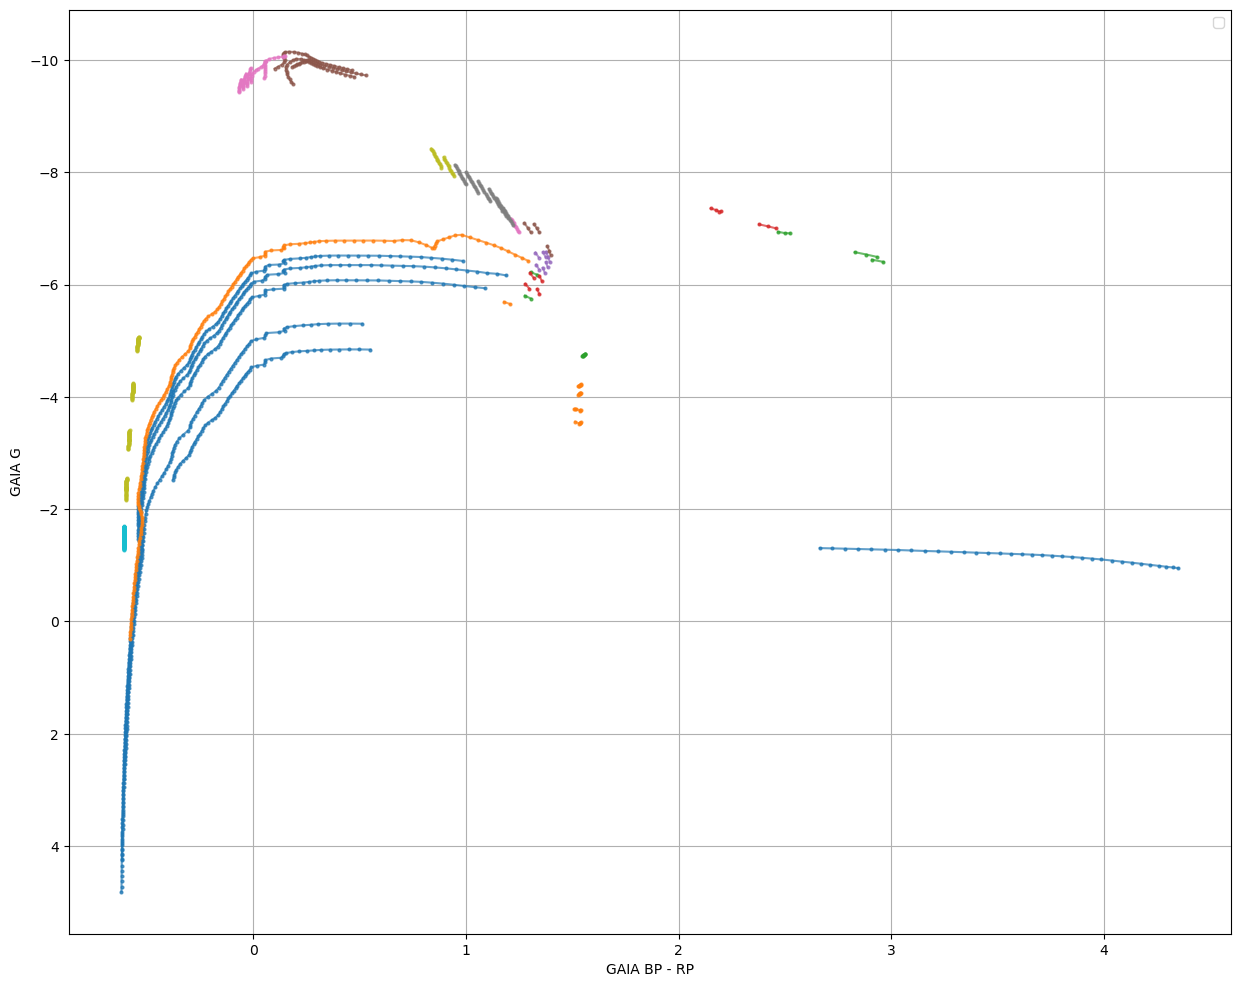

In [127]:
# import os
# import glob
# import matplotlib.pyplot as plt
# import pandas as pd
# import read_mist_models
# import numpy as np

# # Step 1: Change directory to the folder containing .eep.cmd files
# os.chdir('.')  # Update this to your directory path

# # Step 2: Retrieve and sort .eep.cmd files
# eep_cmd_files = glob.glob('*.eep.cmd')
# eep_cmd_files.sort()  # Sort files by filename

# # Function to read synthetic star data from .eep.cmd files
# def read_synthetic_data(eep_cmd_files):
#     data = []
#     for eep_cmd_file in eep_cmd_files:
#         eepcmd = read_mist_models.EEPCMD(eep_cmd_file)
#         B = eepcmd.eepcmds['Gaia_BP_EDR3']
#         R = eepcmd.eepcmds['Gaia_RP_EDR3']
#         G = eepcmd.eepcmds['Gaia_G_EDR3']
#         age = eepcmd.eepcmds['star_age']
#         bp_rp = B - R
#         for i in range(len(B)):
#             data.append([age[i], bp_rp[i], G[i], eep_cmd_file])
#     return pd.DataFrame(data, columns=['star_age', 'bp_rp', 'G', 'file'])

# # Read the data from the .eep.cmd files
# df = read_synthetic_data(eep_cmd_files)

# # Step 3: Calculate age differences and identify regions with cumulative age difference <= 50 years
# def find_fastest_regions(data):
#     regions = []
#     distances = []
#     n = len(data)

#     for i in range(n):
#         cumulative_age_diff = 0
#         region = []
#         for j in range(i, n):
#             if j > i:
#                 cumulative_age_diff += abs(data['star_age'].iloc[j] - data['star_age'].iloc[j-1])
#                 # print(cumulative_age_diff)
#             if cumulative_age_diff <= 70:
#                 region.append(j)
#             else:
#                 break
#         if len(region) > 1:
#             # Calculate total Cartesian distance for the region
#             total_distance = np.sum(np.sqrt(np.diff(data['bp_rp'].iloc[region])**2 + np.diff(data['G'].iloc[region])**2))
#             regions.append(region)
#             distances.append(total_distance)
    
#     # Find the region with the highest total distance
#     if regions:
#         max_distance_region = regions[np.argmax(distances)]
#         return data.iloc[max_distance_region]
#     else:
#         return pd.DataFrame(columns=data.columns)

# # Plot the HR diagram with regions highlighted for each file
# plt.figure(figsize=(15, 12))

# colors = plt.cm.get_cmap('tab10', len(eep_cmd_files))

# for idx, eep_cmd_file in enumerate(eep_cmd_files):
#     file_data = df[df['file'] == eep_cmd_file].sort_values('star_age')
#     fastest_region = find_fastest_regions(file_data)
#     if not fastest_region.empty:
#         # plt.plot(file_data['bp_rp'], file_data['G'], 'o-', markersize=2, color=colors(idx), alpha=0.5, label=f'{eep_cmd_file}')
#         plt.plot(fastest_region['bp_rp'], fastest_region['G'], 'o-', markersize=2, alpha=0.7, color=colors(idx))

# plt.xlabel('GAIA BP - RP')
# plt.ylabel('GAIA G')
# plt.gca().invert_yaxis()  # Invert the y-axis to match astronomical convention
# plt.legend()
# plt.grid(True)

# # Save the plot to a file
# output_path = 'fastest_regions_70_years.png'  # Update with your desired output path
# plt.savefig(output_path, format='png')

# # Show the plot
# plt.show()

Reading in: 0011000M.track.eep.cmd
Reading in: 0012000M.track.eep.cmd


/tmp/ipykernel_982961/2978959991.py:70: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(eep_cmd_files))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


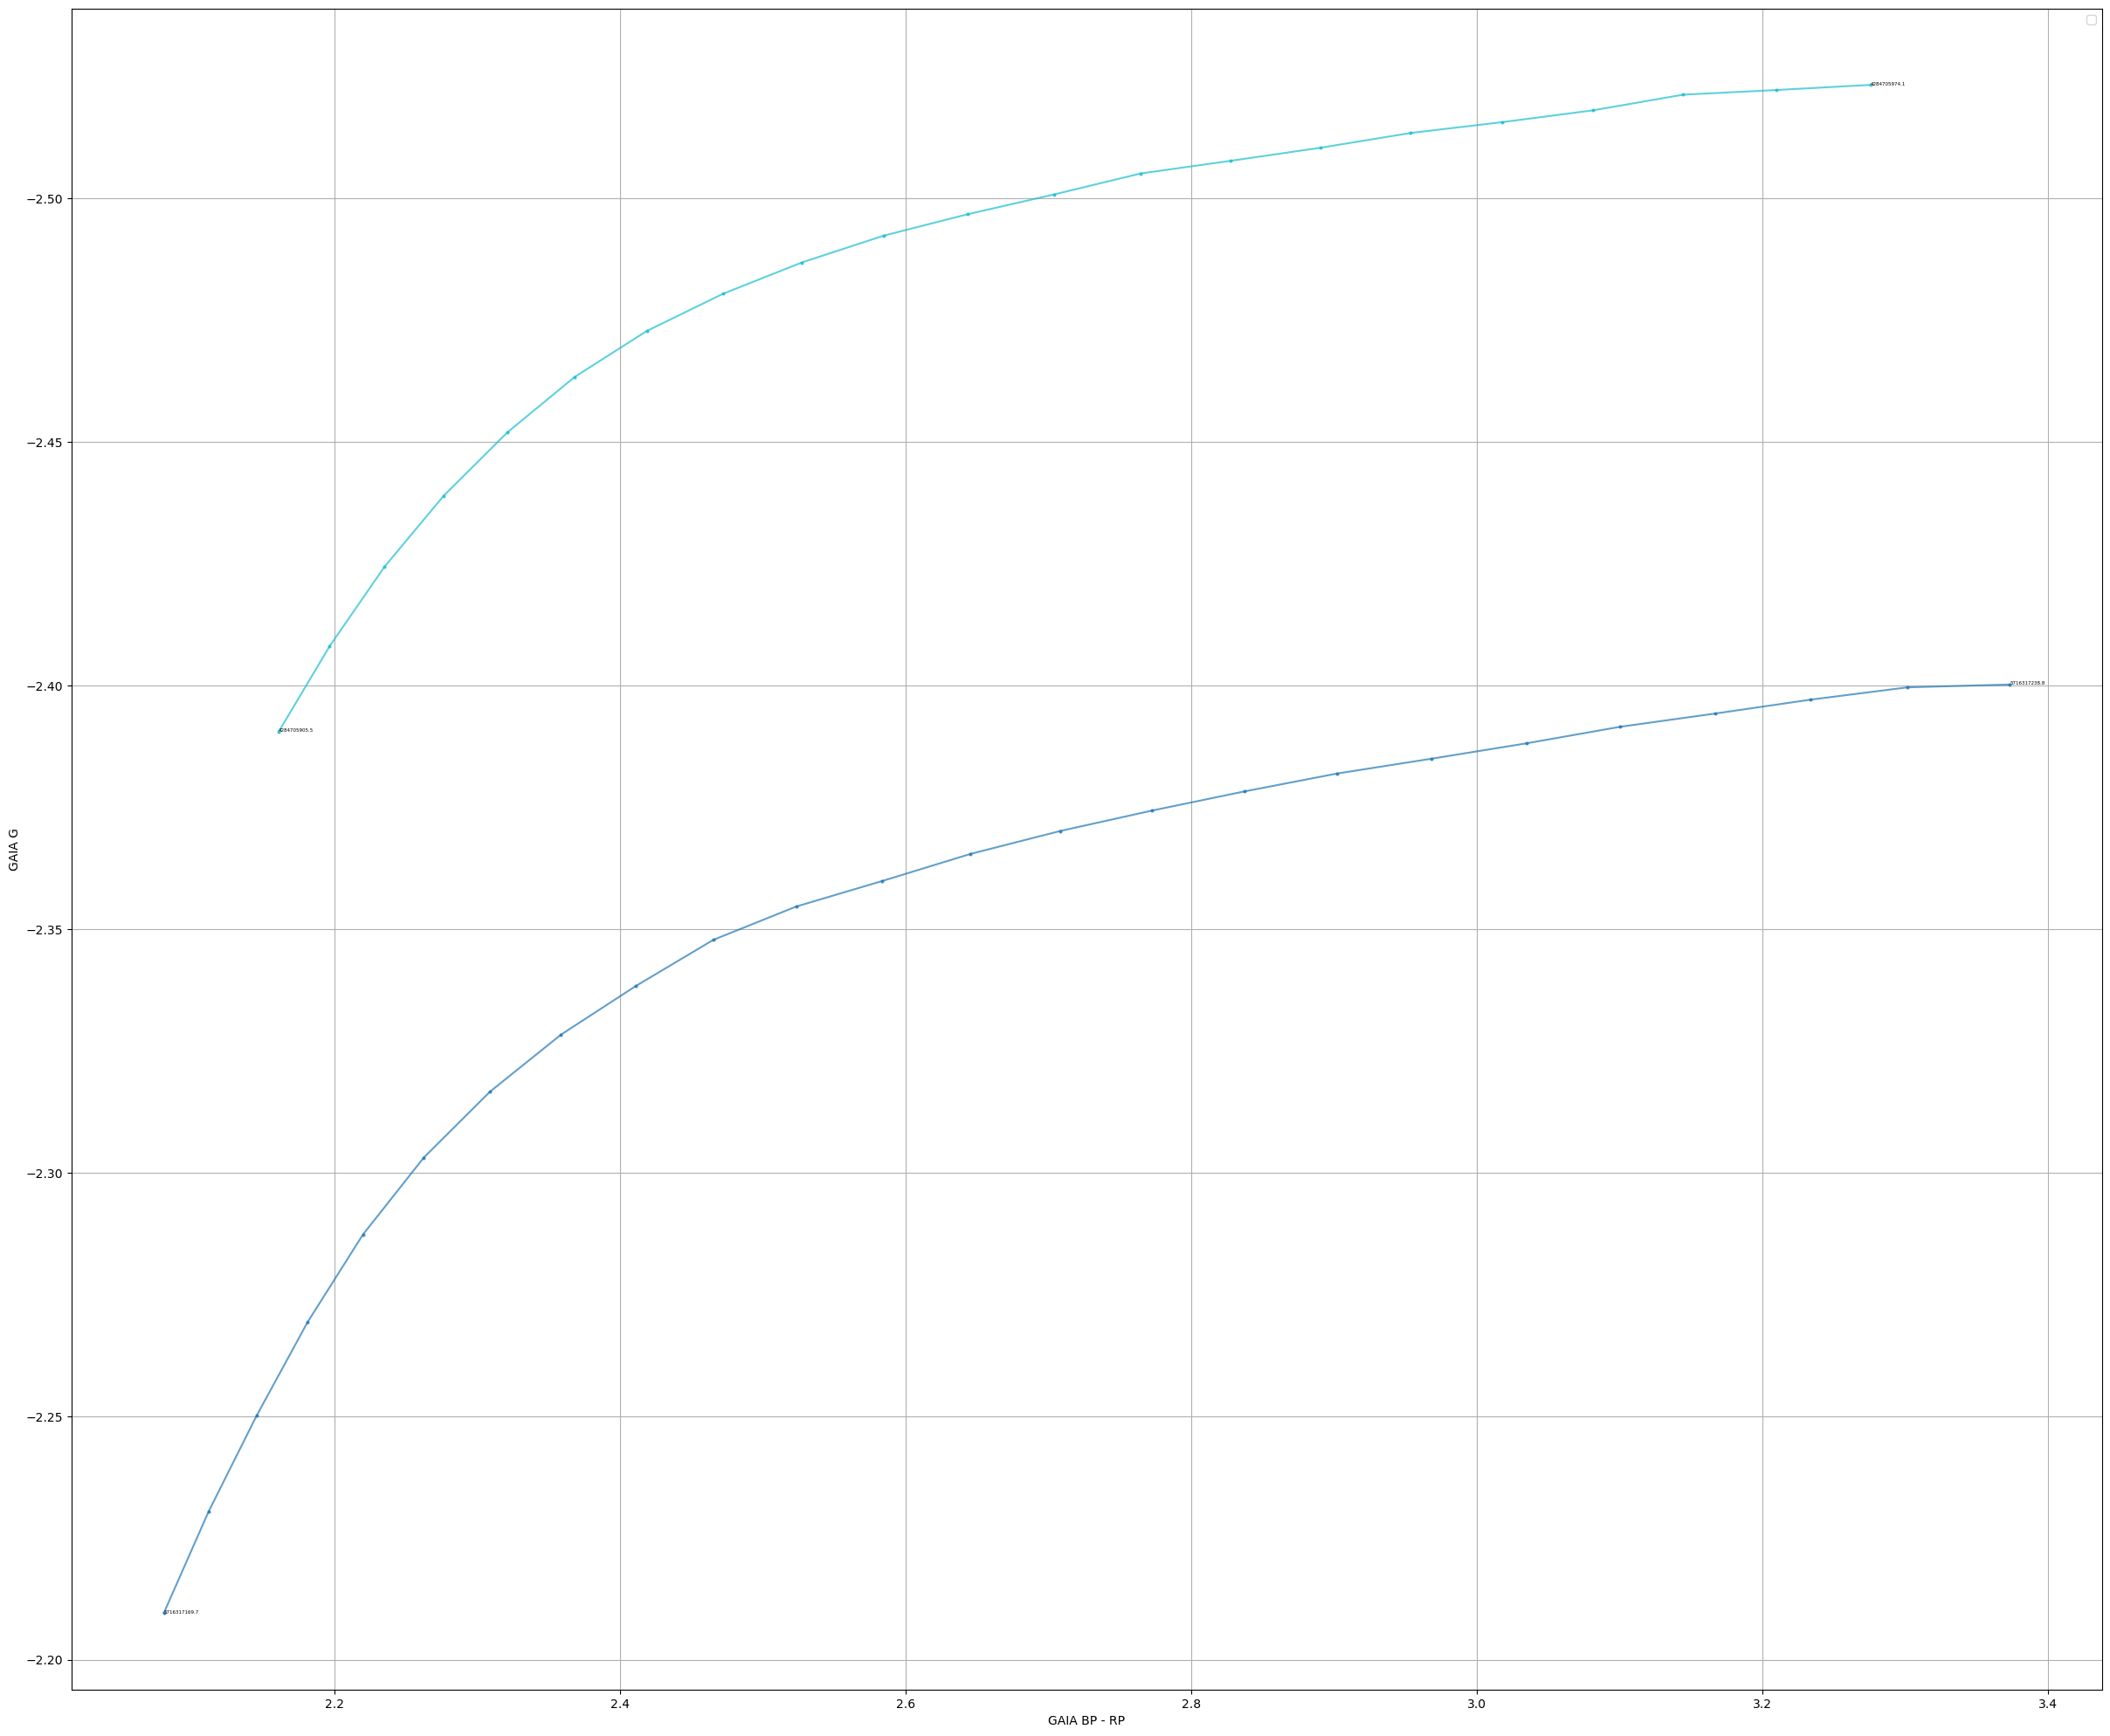

In [34]:
import os
import glob
import matplotlib.pyplot as plt
import pandas as pd
import read_mist_models
import numpy as np

# Step 1: Change directory to the folder containing .eep.cmd files
os.chdir('.')  # Update this to your directory path

# Step 2: Retrieve and sort .eep.cmd files
eep_cmd_files = glob.glob('*.eep.cmd')
eep_cmd_files.sort()  # Sort files by filename

# Consider only the first 30 files
eep_cmd_files = eep_cmd_files[3:5]

# Function to read synthetic star data from .eep.cmd files
def read_synthetic_data(eep_cmd_files):
    data = []
    for eep_cmd_file in eep_cmd_files:
        eepcmd = read_mist_models.EEPCMD(eep_cmd_file)
        B = eepcmd.eepcmds['Gaia_BP_EDR3']
        R = eepcmd.eepcmds['Gaia_RP_EDR3']
        G = eepcmd.eepcmds['Gaia_G_EDR3']
        age = eepcmd.eepcmds['star_age']
        bp_rp = B - R
        for i in range(len(B)):
            data.append([age[i], bp_rp[i], G[i], eep_cmd_file])
    return pd.DataFrame(data, columns=['star_age', 'bp_rp', 'G', 'file'])

# Read the data from the .eep.cmd files
df = read_synthetic_data(eep_cmd_files)

# Step 3: Calculate age differences and identify regions with cumulative age difference <= 70 years
def find_fastest_regions(data):
    regions = []
    distances = []
    n = len(data)

    for i in range(n):
        cumulative_age_diff = 0
        region = []
        for j in range(i, n):
            if j > i:
                cumulative_age_diff += abs(data['star_age'].iloc[j] - data['star_age'].iloc[j-1])
            if cumulative_age_diff <= 70:
                region.append(j)
            else:
                break
        if len(region) > 1:
            start_age = data['star_age'].iloc[region[0]]
            end_age = data['star_age'].iloc[region[-1]]
            if abs(end_age - start_age) <= 70:
                # Calculate total Cartesian distance for the region
                total_distance = np.sum(np.sqrt(np.diff(data['bp_rp'].iloc[region])**2 + np.diff(data['G'].iloc[region])**2))
                regions.append(region)
                distances.append(total_distance)
    
    # Find the region with the highest total distance
    if regions:
        max_distance_region = regions[np.argmax(distances)]
        return data.iloc[max_distance_region]
    else:
        return pd.DataFrame(columns=data.columns)

# Plot the HR diagram with regions highlighted for each file
plt.figure(figsize=(30, 25))

colors = plt.cm.get_cmap('tab10', len(eep_cmd_files))

for idx, eep_cmd_file in enumerate(eep_cmd_files):
    file_data = df[df['file'] == eep_cmd_file].sort_values('star_age')
    fastest_region = find_fastest_regions(file_data)
    if not fastest_region.empty:
        start_age = fastest_region['star_age'].iloc[0]
        end_age = fastest_region['star_age'].iloc[-1]
        plt.plot(fastest_region['bp_rp'], fastest_region['G'], 'o-', markersize=2, alpha=0.7, color=colors(idx))
        plt.text(fastest_region['bp_rp'].iloc[0], fastest_region['G'].iloc[0], f"{start_age:.1f}", fontsize=4, color='black')
        plt.text(fastest_region['bp_rp'].iloc[-1], fastest_region['G'].iloc[-1], f"{end_age:.1f}", fontsize=4, color='black')

plt.xlabel('GAIA BP - RP')
plt.ylabel('GAIA G')
plt.gca().invert_yaxis()  # Invert the y-axis to match astronomical convention
plt.legend()
plt.grid(True)

# Save the plot to a file
output_path = 'fastest_regions_70_years.png'  # Update with your desired output path
plt.savefig(output_path, format='png')

# Show the plot
plt.show()

Reading in: 0010000M.track.eep.cmd
Reading in: 0020000M.track.eep.cmd
Reading in: 0030000M.track.eep.cmd
Reading in: 0040000M.track.eep.cmd
Reading in: 0050000M.track.eep.cmd
Reading in: 0054000M.track.eep.cmd
Reading in: 0060000M.track.eep.cmd
Reading in: 0070000M.track.eep.cmd
Reading in: 0080000M.track.eep.cmd
Reading in: 0090000M.track.eep.cmd
Reading in: 0100000M.track.eep.cmd
Reading in: 0110000M.track.eep.cmd
Reading in: 0120000M.track.eep.cmd
Reading in: 0130000M.track.eep.cmd
Reading in: 0140000M.track.eep.cmd
Reading in: 0150000M.track.eep.cmd
Reading in: 0160000M.track.eep.cmd
Reading in: 0170000M.track.eep.cmd
Reading in: 0180000M.track.eep.cmd
Reading in: 0190000M.track.eep.cmd
Reading in: 0200000M.track.eep.cmd
Reading in: 0210000M.track.eep.cmd
Reading in: 0220000M.track.eep.cmd
Reading in: 0230000M.track.eep.cmd
Reading in: 0240000M.track.eep.cmd
Reading in: 0250000M.track.eep.cmd
Reading in: 0260000M.track.eep.cmd
Reading in: 0270000M.track.eep.cmd
Reading in: 0280000M

/tmp/ipykernel_724357/97718091.py:82: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(eep_cmd_files))


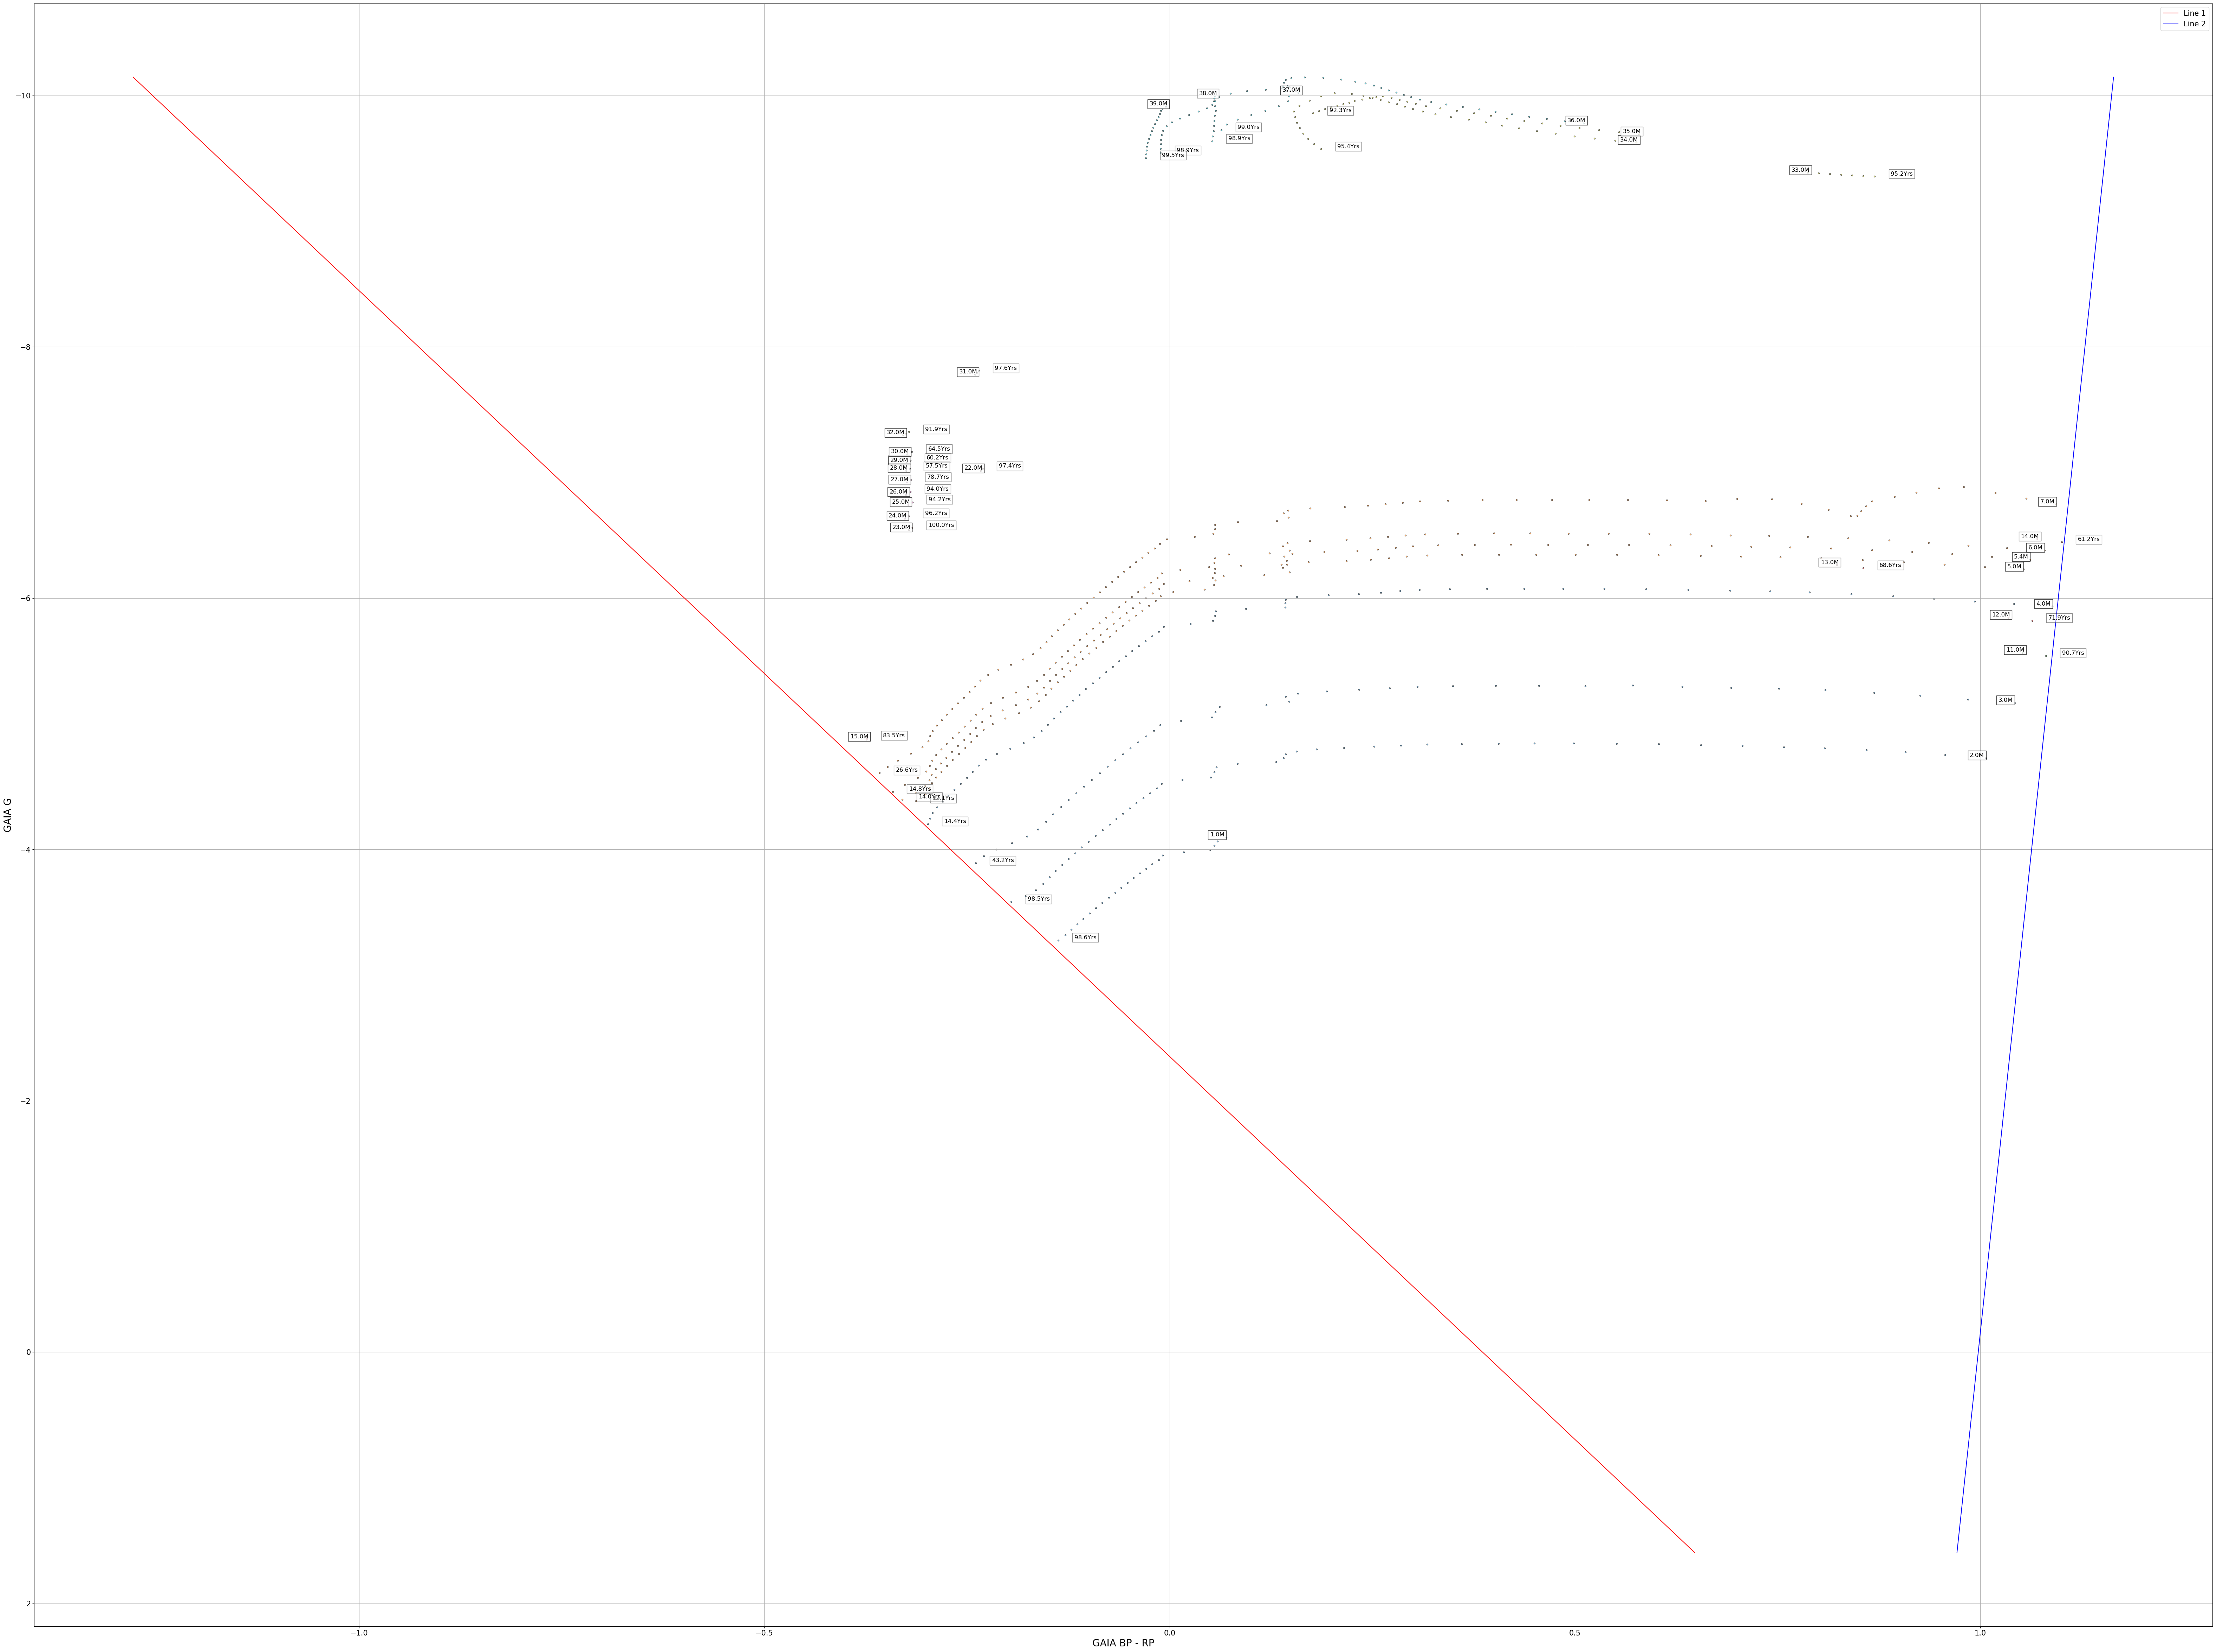

In [5]:
import os
import glob
import matplotlib.pyplot as plt
import pandas as pd
import read_mist_models
import numpy as np

# Step 1: Change directory to the folder containing .eep.cmd files
os.chdir('/home/dutta/Downloads/MIST_ET')  # Update this to your directory path

# Step 2: Retrieve and sort .eep.cmd files
eep_cmd_files = glob.glob('*.eep.cmd')
eep_cmd_files.sort()  # Sort files by filename

# Consider only the first 40 files
eep_cmd_files = eep_cmd_files[:40]

# Function to read synthetic star data from .eep.cmd files
def read_synthetic_data(eep_cmd_files):
    data = []
    for eep_cmd_file in eep_cmd_files:
        eepcmd = read_mist_models.EEPCMD(eep_cmd_file)
        B = eepcmd.eepcmds['Gaia_BP_EDR3']
        R = eepcmd.eepcmds['Gaia_RP_EDR3']
        G = eepcmd.eepcmds['Gaia_G_EDR3']
        age = eepcmd.eepcmds['star_age']
        phase = eepcmd.eepcmds['phase']
        bp_rp = B - R
        for i in range(len(B)):
            data.append([age[i], bp_rp[i], G[i], phase[i], eep_cmd_file])
    return pd.DataFrame(data, columns=['star_age', 'bp_rp', 'G', 'phase', 'file'])

# Read the data from the .eep.cmd files
df = read_synthetic_data(eep_cmd_files)

# Filter the data to only consider regions within the defined lines
def filter_by_lines(df):
    line1 = (21 / 128) * df['G'] + 149 / 386
    line2 = (-7 / 124 + 0.04) * df['G'] + 603 / 620 + 0.025
    return df[(df['bp_rp'] <= line2) & (df['bp_rp'] >= line1) & (df['G'] <= 2)]

df = filter_by_lines(df)

# Filter the data to only consider rows where phase is 2, 3, or 4
df = df[df['phase'].isin([2, 3, 4, 5, 6])]

# Step 3: Calculate age differences and identify regions with cumulative age difference <= 1e4 years
def find_fastest_regions(data):
    regions = []
    distances = []
    n = len(data)

    for i in range(n):
        cumulative_age_diff = 0
        region = []
        for j in range(i, n):
            if j > i:
                cumulative_age_diff += abs(data['star_age'].iloc[j] - data['star_age'].iloc[j-1])
            if cumulative_age_diff <= 1e2:
                region.append(j)
            else:
                break
        if len(region) > 1:
            start_age = data['star_age'].iloc[region[0]]
            end_age = data['star_age'].iloc[region[-1]]
            if abs(end_age - start_age) <= 1e2:
                # Calculate total Cartesian distance for the region
                total_distance = np.sum(np.sqrt(np.diff(data['bp_rp'].iloc[region])**2 + np.diff(data['G'].iloc[region])**2))
                regions.append(region)
                distances.append(total_distance)
    
    # Find the region with the highest total distance
    if regions:
        max_distance_region = regions[np.argmax(distances)]
        return data.iloc[max_distance_region]
    else:
        return pd.DataFrame(columns=data.columns)

# Plot the HR diagram with regions highlighted for each file
plt.figure(figsize=(80, 60))  # Increased figure size for better readability

colors = plt.cm.get_cmap('tab10', len(eep_cmd_files))

for idx, eep_cmd_file in enumerate(eep_cmd_files):
    file_data = df[df['file'] == eep_cmd_file].sort_values('star_age')
    fastest_region = find_fastest_regions(file_data)
    if not fastest_region.empty:
        start_age = fastest_region['star_age'].iloc[0]
        end_age = fastest_region['star_age'].iloc[-1]
        # mean = fastest_region['star_age'].diff().mean()
        # print(mean)
        mass = int(eep_cmd_file.split('M')[0]) / 1e4  # Extract and format mass
        plt.scatter(fastest_region['bp_rp'], fastest_region['G'], s=8, alpha=0.6, color=colors(idx), edgecolor='black')  # Increased point size and transparency
        # Annotate with the mass at the middle point of the region
        # mid_idx = len(fastest_region) // 2
        plt.text(fastest_region['bp_rp'].iloc[0] - 0.02, fastest_region['G'].iloc[0], f"{mass}M", 
                 fontsize=12, color='black', ha='left', va='bottom', bbox=dict(facecolor='white', alpha=0.75))
        diff = end_age - start_age
        plt.text(fastest_region['bp_rp'].iloc[-1] + 0.02, fastest_region['G'].iloc[-1], f"{diff:.1f}Yrs", 
                 fontsize=12, color='black', ha='left', va='bottom', bbox=dict(facecolor='white', alpha=0.45))

# Plot the lines
g_range = np.linspace(df['G'].min(), df['G'].max(), 100)
line1_values = (21 / 128) * g_range + 149 / 386
line2_values = (-7 / 124 + 0.04) * g_range + 603 / 620 + 0.025
plt.plot(line1_values, g_range, color='red', label='Line 1')
plt.plot(line2_values, g_range, color='blue', label='Line 2')

plt.xlabel('GAIA BP - RP', fontsize=20)
plt.ylabel('GAIA G', fontsize=20)
plt.gca().invert_yaxis()  # Invert the y-axis to match astronomical convention
plt.legend(fontsize=15)
plt.grid(True)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Save the plot to a file
output_path = 'fastest_regions_1e2_years.png'  # Update with your desired output path
plt.savefig(output_path, format='png', bbox_inches='tight')

# Show the plot
plt.show()

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astroquery.gaia import Gaia
from astropy.table import vstack

# Query template for GAIA DR3
query_template = """
SELECT
    source_id,
    parallax,
    ra,
    dec,
    phot_g_mean_mag + 5 * LOG10(parallax) - 10 AS mg,
    phot_bp_mean_mag + 5 * LOG10(parallax) - 10 AS mbp,
    phot_rp_mean_mag + 5 * LOG10(parallax) - 10 AS mrp,
    bp_rp,
    phot_g_mean_flux,
    phot_bp_mean_flux,
    phot_rp_mean_flux,
    ag_gspphot,
    ebpminrp_gspphot,
    pmra,
    pmdec
FROM
    gaiadr3.gaia_source
WHERE
    parallax_over_error > 10
    AND phot_bp_rp_excess_factor < 1.3 + 0.06 * POWER(bp_rp, 2)
    AND phot_bp_rp_excess_factor > 1.0 + 0.015 * POWER(bp_rp, 2)
    AND bp_rp IS NOT NULL
    AND phot_bp_mean_mag IS NOT NULL
    AND phot_rp_mean_mag IS NOT NULL
    AND dec > 0
    AND ra BETWEEN {ra_min} AND {ra_max}
    AND (bp_rp - ebpminrp_gspphot) BETWEEN {bp_rp_min} AND {bp_rp_max}
    AND (phot_g_mean_mag + 5 * LOG10(parallax) - 10 - ag_gspphot) BETWEEN {g_min} AND {g_max}
"""

# Function to execute a query for a given RA range
def execute_query(ra_min, ra_max, bp_rp_min, bp_rp_max, g_min, g_max):
    query = query_template.format(
        ra_min=ra_min, ra_max=ra_max,
        bp_rp_min=bp_rp_min, bp_rp_max=bp_rp_max,
        g_min=g_min, g_max=g_max
    )
    job = Gaia.launch_job_async(query)
    return job.get_results()

# Define RA ranges to split the query
ra_ranges = [(0, 60), (60, 120), (120, 180), (180, 240), (240, 300), (300, 360)]

# Define bp_rp and g magnitude limitations
bp_rp_min = -0.5  # Update this value based on your criteria
bp_rp_max = 1.5  # Update this value based on your criteria
g_min = -8  # Update this value based on your criteria
g_max = -3  # Update this value based on your criteria

# # Execute queries and combine results
# results = []
# for ra_min, ra_max in ra_ranges:
#     result = execute_query(ra_min, ra_max, bp_rp_min, bp_rp_max, g_min, g_max)
#     results.append(result)

# # Combine all results into a single table
# gaia_results = vstack(results).to_pandas()

# # Extract GAIA data
# gaia_results['bp_rp'] = gaia_results['bp_rp'] - gaia_results['ebpminrp_gspphot']
# gaia_results['mg'] = gaia_results['mg'] - gaia_results['ag_gspphot']

# gaia_bp_rp = gaia_results['bp_rp']
# gaia_g = gaia_results['mg']

In [ ]:
# import os
# import glob
# import matplotlib.pyplot as plt
# import pandas as pd
# import read_mist_models
# import numpy as np

# # Step 1: Change directory to the folder containing .eep.cmd files
# os.chdir('.')  # Update this to your directory path

# # Step 2: Retrieve and sort .eep.cmd files
# eep_cmd_files = glob.glob('*.eep.cmd')
# eep_cmd_files.sort()  # Sort files by filename

# # Consider only the first 40 files
# eep_cmd_files = eep_cmd_files[:40]

# # Function to read synthetic star data from .eep.cmd files
# def read_synthetic_data(eep_cmd_files):
#     data = []
#     for eep_cmd_file in eep_cmd_files:
#         eepcmd = read_mist_models.EEPCMD(eep_cmd_file)
#         B = eepcmd.eepcmds['Gaia_BP_EDR3']
#         R = eepcmd.eepcmds['Gaia_RP_EDR3']
#         G = eepcmd.eepcmds['Gaia_G_EDR3']
#         age = eepcmd.eepcmds['star_age']
#         bp_rp = B - R
#         for i in range(len(B)):
#             data.append([age[i], bp_rp[i], G[i], eep_cmd_file])
#     return pd.DataFrame(data, columns=['star_age', 'bp_rp', 'G', 'file'])

# # Read the data from the .eep.cmd files
# df = read_synthetic_data(eep_cmd_files)

# # Filter the data to only consider regions within the defined lines
# def filter_by_lines(df):
#     line1 = (21 / 128) * df['G'] + 149 / 386
#     line2 = (-7 / 124 + 0.04) * df['G'] + 603 / 620 + 0.025
#     return df[(df['bp_rp'] <= line2) & (df['bp_rp'] >= line1) & (df['G'] <= -3)]

# df = filter_by_lines(df)

# # plt.plot(df['bp_rp'], df['G'])

INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Reading in: 0010000M.track.eep.cmd
Reading in: 0020000M.track.eep.cmd
Reading in: 0030000M.track.eep.cmd
Reading in: 0040000M.track.eep.cmd
Reading in: 0050000M.track.eep.cmd
Reading in: 0060000M.track.eep.cmd
Reading in: 0070000M.track.eep.cmd
Reading in: 0080000M.track.eep.cmd
Reading in: 0090000M.track.eep.cmd
Reading in: 0100000M.track.eep.cmd
Reading in: 0110000M.track.eep.cmd
Reading in: 0120000M.track.eep.cmd
Reading in: 0130000M.track.eep.cmd
Reading in: 0140000M.track.eep.cmd
Reading in: 0150000M.track.eep.cmd
Reading in: 0160000M.track.eep.cmd
Reading in: 0170000M.track.eep.cmd
Reading in: 0180000M.track.eep.cmd
Reading in: 0190000M.track.eep.cmd
Reading in: 0200000M.track.eep.cmd


KeyError: 'file'

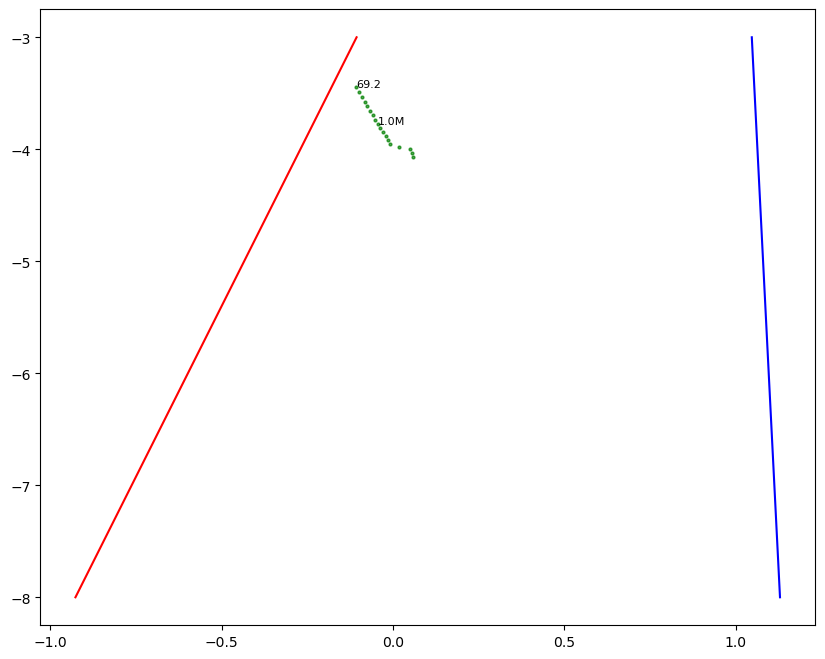

In [20]:
import os
import glob
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from astropy.table import vstack
import read_mist_models
from scipy.spatial import cKDTree

# Assume the GAIA query results have been executed and loaded into gaia_results
# Here is the extracted part to correct the GAIA data
# Execute queries and combine results
results = []
for ra_min, ra_max in ra_ranges:
    result = execute_query(ra_min, ra_max, bp_rp_min, bp_rp_max, g_min, g_max)
    results.append(result)

# Combine all results into a single table
gaia_results = vstack(results).to_pandas()

# Extract GAIA data
gaia_results['bp_rp'] = gaia_results['bp_rp'] - gaia_results['ebpminrp_gspphot']
gaia_results['mg'] = gaia_results['mg'] - gaia_results['ag_gspphot']

# Read synthetic star data from .eep.cmd files
def read_synthetic_data(eep_cmd_files):
    data = []
    for eep_cmd_file in eep_cmd_files:
        eepcmd = read_mist_models.EEPCMD(eep_cmd_file)
        B = eepcmd.eepcmds['Gaia_BP_EDR3']
        R = eepcmd.eepcmds['Gaia_RP_EDR3']
        G = eepcmd.eepcmds['Gaia_G_EDR3']
        age = eepcmd.eepcmds['star_age']
        bp_rp = B - R
        for i in range(len(B)):
            data.append([age[i], bp_rp[i], G[i], eep_cmd_file])
    return pd.DataFrame(data, columns=['star_age', 'bp_rp', 'G', 'file'])

# Change directory to the folder containing .eep.cmd files
os.chdir('.')  # Update this to your directory path

# Retrieve and sort .eep.cmd files
eep_cmd_files = glob.glob('*.eep.cmd')
eep_cmd_files.sort()  # Sort files by filename
eep_cmd_files = eep_cmd_files[:40]  # Consider only the first 40 files

# Read the data from the .eep.cmd files
df = read_synthetic_data(eep_cmd_files)

# Filter the data to only consider regions within the defined lines
def filter_by_lines(df):
    line1 = (21 / 128) * df['G'] + 149 / 386
    line2 = (-7 / 124 + 0.04) * df['G'] + 603 / 620 + 0.025
    return df[(df['bp_rp'] <= line2) & (df['bp_rp'] >= line1) & (df['G'] <= -3)]

df = filter_by_lines(df)

# Function to plot the lines
def plot_lines():
    G_values = np.linspace(-8, -3, 100)
    line1 = (21 / 128) * G_values + 149 / 386
    line2 = (-7 / 124 + 0.04) * G_values + (603 / 620) + 0.025
    plt.plot(line1, G_values, 'r-', label='Line 1')
    plt.plot(line2, G_values, 'b-', label='Line 2')

# Function to calculate distances and filter GAIA stars
def filter_gaia_stars(gaia_results, df, threshold=1.5):
    gaia_points = np.array(gaia_results[['bp_rp', 'mg']])
    synthetic_points = np.array(df[['bp_rp', 'G']])

    # Calculate distances using NumPy broadcasting
    distances = np.sqrt(np.sum((synthetic_points[:, np.newaxis] - gaia_points) ** 2, axis=-1))

    # Find indices where distance < threshold
    indices = np.where(distances < threshold)

    # Extract selected GAIA stars
    selected_stars = gaia_results.iloc[indices[1]].drop_duplicates(subset=['SOURCE_ID'])
    
    return selected_stars

# Plot setup
plt.figure(figsize=(10, 8))
plot_lines()

# Filter GAIA stars based on proximity to synthetic stars
selected_gaia_stars = filter_gaia_stars(gaia_results, df)

# Iterate through eep.cmd files
for idx, eep_cmd_file in enumerate(eep_cmd_files):
    file_data = df[df['file'] == eep_cmd_file].sort_values('star_age')
    
    # You would need to define find_fastest_regions() based on your criteria
    fastest_region = find_fastest_regions(file_data)
    
    if not fastest_region.empty:
        start_age = fastest_region['star_age'].iloc[0]
        end_age = fastest_region['star_age'].iloc[-1]
        mass = int(eep_cmd_file.split('M')[0]) / 1e4  # Extract and format mass
        
        plt.scatter(fastest_region['bp_rp'], fastest_region['G'], s=4, alpha=0.7, color='green')
        mid_idx = len(fastest_region) // 2
        plt.text(fastest_region['bp_rp'].iloc[mid_idx], fastest_region['G'].iloc[mid_idx], f"{mass}M", fontsize=8, color='black')
        diff = end_age - start_age
        plt.text(fastest_region['bp_rp'].iloc[-1], fastest_region['G'].iloc[-1], f"{diff:.1f}", fontsize=8, color='black')
        
        # Filter and plot GAIA stars for this eep.cmd file
        eep_cmd_selected_stars_df = selected_gaia_stars[selected_gaia_stars['file'] == eep_cmd_file]
        plt.scatter(eep_cmd_selected_stars_df['bp_rp'], eep_cmd_selected_stars_df['mg'], s=2, alpha=0.7, c='blue')

# Finalize plot
plt.xlabel('bp_rp')
plt.ylabel('G')
plt.gca().invert_yaxis()
plt.legend()
plt.savefig('selected_gaia_H_gap.png')
plt.show()

# Convert SOURCE_ID to string without scientific notation and ensure uniqueness
selected_gaia_stars['SOURCE_ID'] = selected_gaia_stars['SOURCE_ID'].apply(lambda x: format(x, '.0f'))
selected_gaia_stars = selected_gaia_stars.drop_duplicates(subset=['SOURCE_ID'])

# Save selected GAIA stars to a file
selected_gaia_stars.to_csv('selected_stars_H_gap.txt', index=False, sep='\t')

NameError: name 'gaia_results' is not defined

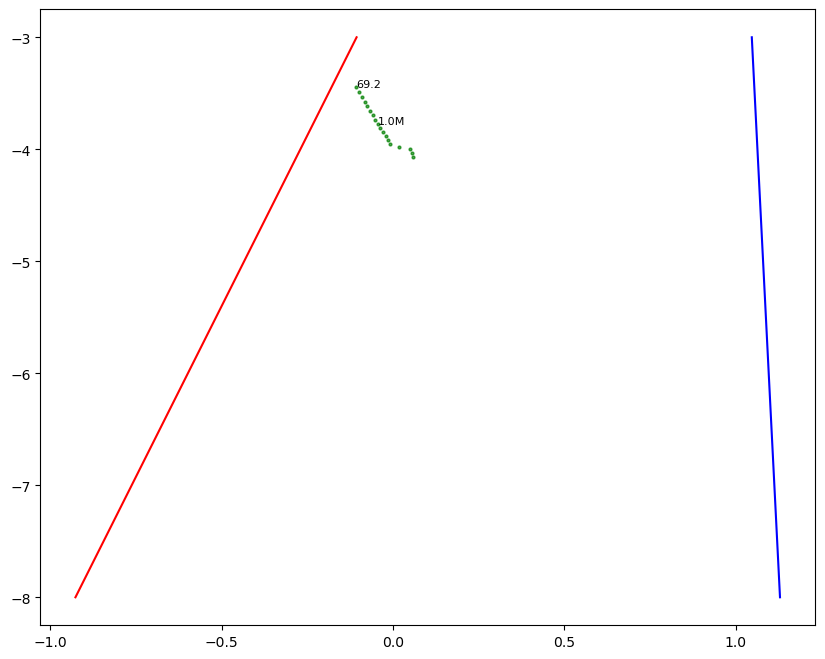

In [9]:
# # Function to plot the lines
# def plot_lines():
#     G_values = np.linspace(-8, -3, 100)
#     line1 = (21 / 128) * G_values + 149 / 386
#     line2 = (-7 / 124 + 0.04) * G_values + (603 / 620) + 0.025
#     plt.plot(line1, G_values, 'r-', label='Line 1')
#     plt.plot(line2, G_values, 'b-', label='Line 2')

# # Function to calculate distances and filter GAIA stars
# def filter_gaia_stars(gaia_results, df, threshold=1.5):
#     selected_stars = []

#     for _, synthetic_row in df.iterrows():
#         synthetic_bp_rp = synthetic_row['bp_rp']
#         synthetic_G = synthetic_row['G']
        
#         for _, gaia_row in gaia_results.iterrows():
#             gaia_bp_rp = gaia_row['bp_rp']
#             gaia_mg = gaia_row['mg']
            
#             # Calculate Euclidean distance
#             distance = np.sqrt((synthetic_bp_rp - gaia_bp_rp) ** 2 + (synthetic_G - gaia_mg) ** 2)
            
#             if distance < threshold:
#                 selected_stars.append(gaia_row)
    
#     selected_stars_df = pd.DataFrame(selected_stars).drop_duplicates(subset=['source_id'])
#     return selected_stars_df

# # Plot the results
# plt.figure(figsize=(10, 8))

# # Plot the lines
# plot_lines()

# # Calculate age differences and identify regions with cumulative age difference <= 70 years
# def find_fastest_regions(data):
#     regions = []
#     distances = []
#     n = len(data)

#     for i in range(n):
#         cumulative_age_diff = 0
#         region = []
#         for j in range(i, n):
#             if j > i:
#                 cumulative_age_diff += abs(data['star_age'].iloc[j] - data['star_age'].iloc[j-1])
#             if cumulative_age_diff <= 70:
#                 region.append(j)
#             else:
#                 break
#         if len(region) > 1:
#             start_age = data['star_age'].iloc[region[0]]
#             end_age = data['star_age'].iloc[region[-1]]
#             if abs(end_age - start_age) <= 70:
#                 # Calculate total Cartesian distance for the region
#                 total_distance = np.sum(np.sqrt(np.diff(data['bp_rp'].iloc[region])**2 + np.diff(data['G'].iloc[region])**2))
#                 regions.append(region)
#                 distances.append(total_distance)
    
#     # Find the region with the highest total distance
#     if regions:
#         max_distance_region = regions[np.argmax(distances)]
#         return data.iloc[max_distance_region]
#     else:
#         return pd.DataFrame(columns=data.columns)

# # # Plot synthetic data points
# # plt.scatter(df['bp_rp'], df['G'], s=1, alpha=0.6, c='green', label='Synthetic Data')

# for idx, eep_cmd_file in enumerate(eep_cmd_files):
#     file_data = df[df['file'] == eep_cmd_file].sort_values('star_age')
#     fastest_region = find_fastest_regions(file_data)
#     if not fastest_region.empty:
#         start_age = fastest_region['star_age'].iloc[0]
#         end_age = fastest_region['star_age'].iloc[-1]
#         mass = int(eep_cmd_file.split('M')[0]) / 1e4  # Extract and format mass
#         plt.scatter(fastest_region['bp_rp'], fastest_region['G'], s=4, alpha=0.7, color='green')
#         # Annotate with the mass at the middle point of the region
#         mid_idx = len(fastest_region) // 2
#         plt.text(fastest_region['bp_rp'].iloc[mid_idx], fastest_region['G'].iloc[mid_idx], f"{mass}M", fontsize=8, color='black')
#         diff = end_age - start_age
#         plt.text(fastest_region['bp_rp'].iloc[-1], fastest_region['G'].iloc[-1], f"{diff:.1f}", fontsize=8, color='black')
#         # Filter and plot GAIA stars
#         selected_stars_df = filter_gaia_stars(gaia_results, df)
#         plt.scatter(selected_stars_df['bp_rp'], selected_stars_df['mg'], s=2, alpha=0.7, c='blue')

# # # Filter and plot GAIA stars
# # selected_stars_df = filter_gaia_stars(gaia_results, df)
# # plt.scatter(selected_stars_df['bp_rp'], selected_stars_df['mg'], s=2, alpha=0.7, c='blue', label='Selected GAIA Stars')

# plt.xlabel('bp_rp')
# plt.ylabel('G')
# plt.gca().invert_yaxis()
# plt.legend()
# plt.savefig('selected_gaia_H_gap.png')
# plt.show()

# # Convert the first column (source_id) to string without scientific notation
# selected_stars_df['SOURCE_ID'] = selected_stars_df['SOURCE_ID'].apply(lambda x: format(x, '.0f'))

# # Ensure all source_id values are unique
# selected_stars_df = selected_stars_df.drop_duplicates(subset=['SOURCE_ID'])

# # Save selected GAIA stars to a file
# selected_stars_df.to_csv('selected_stars_H_gap.txt', index=False, sep='\t')

Reading in: 0010000M.track.eep.cmd
Reading in: 0020000M.track.eep.cmd
Reading in: 0030000M.track.eep.cmd
Reading in: 0040000M.track.eep.cmd
Reading in: 0050000M.track.eep.cmd
Reading in: 0060000M.track.eep.cmd
Reading in: 0070000M.track.eep.cmd
Reading in: 0080000M.track.eep.cmd
Reading in: 0090000M.track.eep.cmd
Reading in: 0100000M.track.eep.cmd
Reading in: 0110000M.track.eep.cmd
Reading in: 0120000M.track.eep.cmd
Reading in: 0130000M.track.eep.cmd
Reading in: 0140000M.track.eep.cmd
Reading in: 0150000M.track.eep.cmd
Reading in: 0160000M.track.eep.cmd
Reading in: 0170000M.track.eep.cmd
Reading in: 0180000M.track.eep.cmd
Reading in: 0190000M.track.eep.cmd
Reading in: 0200000M.track.eep.cmd
Reading in: 0210000M.track.eep.cmd
Reading in: 0220000M.track.eep.cmd
Reading in: 0230000M.track.eep.cmd
Reading in: 0240000M.track.eep.cmd
Reading in: 0250000M.track.eep.cmd
Reading in: 0260000M.track.eep.cmd
Reading in: 0270000M.track.eep.cmd
Reading in: 0280000M.track.eep.cmd
Reading in: 0290000M

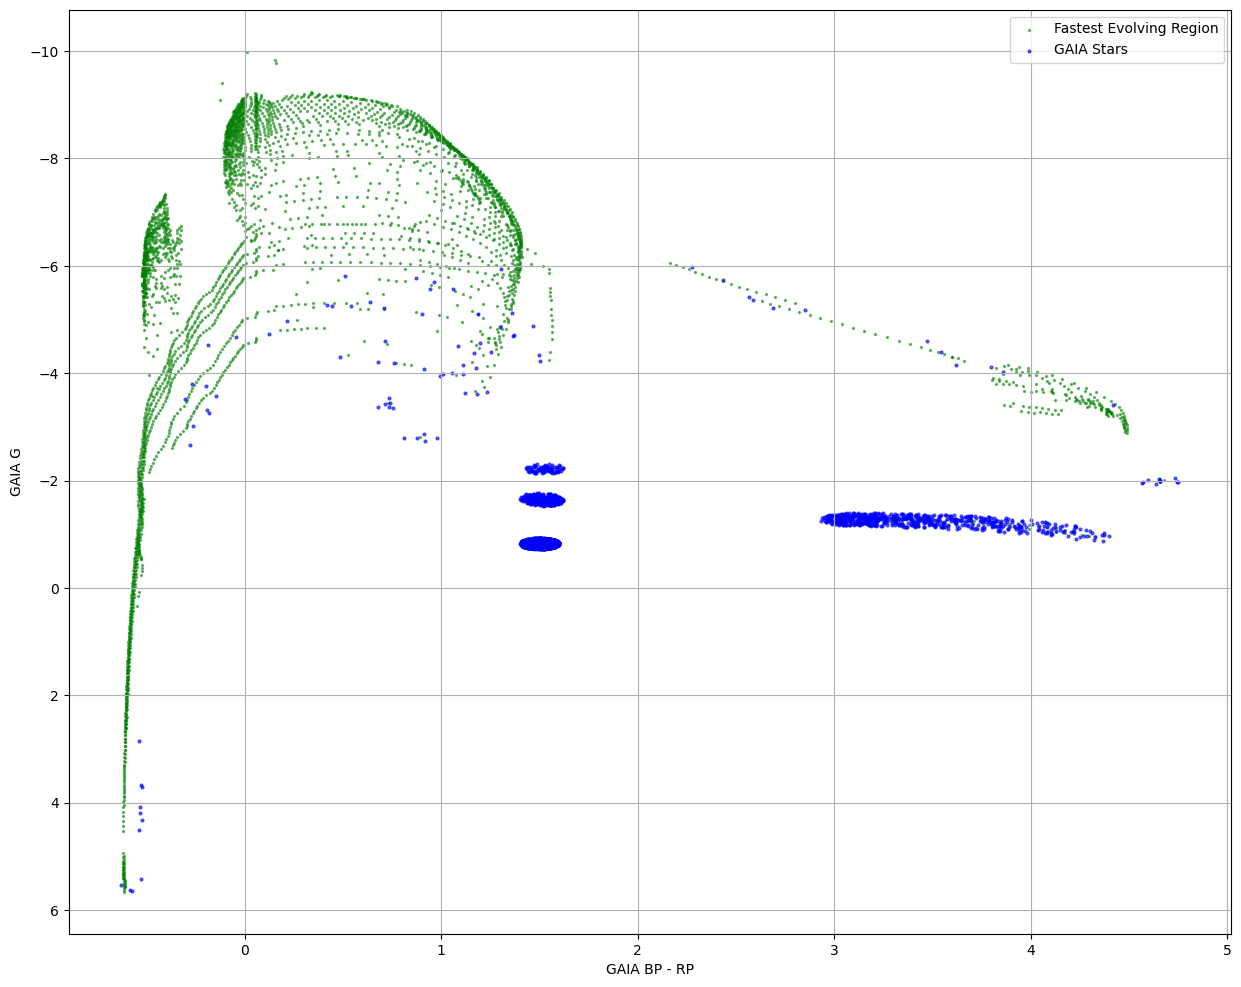

The average age difference for the fastest evolving regions is: 0.8708622504867165


In [112]:
import os
import glob
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from astroquery.gaia import Gaia
from astropy.table import vstack

# Step 1: Change directory to the folder containing .eep.cmd files
os.chdir('.')  # Update this to your directory path

# Step 2: Retrieve and sort .eep.cmd files
eep_cmd_files = glob.glob('*.eep.cmd')
eep_cmd_files.sort()  # Sort files by filename

# Function to read synthetic star data from .eep.cmd files
def read_synthetic_data(eep_cmd_files):
    data = []
    for eep_cmd_file in eep_cmd_files:
        eepcmd = read_mist_models.EEPCMD(eep_cmd_file)
        B = eepcmd.eepcmds['Gaia_BP_EDR3']
        R = eepcmd.eepcmds['Gaia_RP_EDR3']
        G = eepcmd.eepcmds['Gaia_G_EDR3']
        age = eepcmd.eepcmds['star_age']
        bp_rp = B - R
        for i in range(len(B)):
            data.append([age[i], bp_rp[i], G[i]])
    return pd.DataFrame(data, columns=['star_age', 'bp_rp', 'G'])

# Read the data from the .eep.cmd files
df = read_synthetic_data(eep_cmd_files)

# Step 3: Calculate Cartesian distances in color-magnitude diagram
df['distance'] = np.sqrt(df['bp_rp'].diff()**2 + df['G'].diff()**2)

# Drop the first row with NaN distance
df = df.dropna()

# Identify the regions with the highest distances
distance_threshold = df['distance'].quantile(0.75)
highest_distance_region = df[df['distance'] >= distance_threshold]

# Step 4: Calculate age differences for the highest distance regions
highest_distance_region = highest_distance_region.sort_values('star_age')
highest_distance_region['age_diff'] = highest_distance_region['star_age'].diff().abs()

# Drop the first row with NaN age difference
highest_distance_region = highest_distance_region.dropna()

# Identify the fastest evolving regions among the highest distance regions
fast_threshold = highest_distance_region['age_diff'].quantile(0.25)
fastest_region = highest_distance_region[highest_distance_region['age_diff'] <= fast_threshold]

# Calculate the average age_diff for the fastest evolving regions
average_age_diff = fastest_region['age_diff'].mean()

# Step 5: Query GAIA EDR3 for real stars using the provided template
query_template = """
SELECT
    source_id,
    parallax,
    ra,
    dec,
    phot_g_mean_mag + 5 * LOG10(parallax) - 10 AS mg,
    phot_bp_mean_mag + 5 * LOG10(parallax) - 10 AS mbp,
    phot_rp_mean_mag + 5 * LOG10(parallax) - 10 AS mrp,
    bp_rp,
    phot_g_mean_flux,
    phot_bp_mean_flux,
    phot_rp_mean_flux,
    pmra,
    pmdec
FROM
    gaiaedr3.gaia_source
WHERE
    parallax_over_error > 10
    AND phot_bp_rp_excess_factor < 1.3 + 0.06 * POWER(bp_rp, 2)
    AND phot_bp_rp_excess_factor > 1.0 + 0.015 * POWER(bp_rp, 2)
    AND bp_rp IS NOT NULL
    AND phot_bp_mean_mag IS NOT NULL
    AND phot_rp_mean_mag IS NOT NULL
    AND dec > 0
    AND ra BETWEEN {ra_min} AND {ra_max}
"""

# Function to execute a query for a given RA range
def execute_query(ra_min, ra_max):
    query = query_template.format(ra_min=ra_min, ra_max=ra_max)
    job = Gaia.launch_job_async(query)
    return job.get_results()

# Define RA ranges to split the query
ra_ranges = [(0, 60), (60, 120), (120, 180), (180, 240), (240, 300), (300, 360)]

# Execute queries and combine results
results = []
for ra_min, ra_max in ra_ranges:
    result = execute_query(ra_min, ra_max)
    results.append(result)

# Combine all results into a single table
gaia_results = vstack(results).to_pandas()

# Extract GAIA data
gaia_bp_rp = gaia_results['bp_rp']
gaia_g = gaia_results['mg']

# Step 6: Filter GAIA stars to overlay only those close to the green points
def find_closest_points(gaia_results, fastest_region, threshold=0.1):
    closest_stars = []
    for index, row in fastest_region.iterrows():
        distances = np.sqrt((gaia_results['bp_rp'] - row['bp_rp'])**2 + (gaia_results['mg'] - row['G'])**2)
        close_stars = gaia_results[distances <= threshold]
        closest_stars.append(close_stars)
    if closest_stars:
        return pd.concat(closest_stars).drop_duplicates()
    else:
        return pd.DataFrame()

# Find closest GAIA stars to the green points
closest_gaia_stars = find_closest_points(gaia_results, fastest_region)

# Plot the HR diagram with the fastest evolving regions and closest GAIA stars
plt.figure(figsize=(15, 12))
plt.scatter(fastest_region['bp_rp'], fastest_region['G'], s=2, alpha=0.5, color='green', label='Fastest Evolving Region')
if not closest_gaia_stars.empty:
    plt.scatter(closest_gaia_stars['bp_rp'], closest_gaia_stars['mg'], s=4, alpha=0.6, color='blue', label='GAIA Stars')
else:
    print("No GAIA stars found close to the fastest evolving regions.")
plt.xlabel('GAIA BP - RP')
plt.ylabel('GAIA G')
plt.gca().invert_yaxis()  # Invert the y-axis to match astronomical convention
plt.legend()
plt.grid(True)

# Save the plot to a file
output_path = 'fastest_evolving_region_with_gaia.png'  # Update with your desired output path
plt.savefig(output_path, format='png')

# Show the plot
plt.show()

# Print the average age difference for the fastest evolving regions
print(f"The average age difference for the fastest evolving regions is: {average_age_diff}")

In [114]:
closest_gaia_stars

,source_id,parallax,ra,dec,mg,mbp,mrp,bp_rp,phot_g_mean_flux,phot_bp_mean_flux,phot_rp_mean_flux,pmra,pmdec
14129728,2198759823744627328,0.247248,333.320101,57.666163,-4.884718,-4.229002,-5.695824,1.466822,1.035377e+07,4.104710e+06,9.199253e+06,-3.706307,-2.725029
11030784,1170223252078552448,0.215571,228.322616,12.457105,-4.340276,-3.647318,-5.143430,1.496112,4.766936e+06,1.826107e+06,4.204478e+06,-26.301194,2.701139
3971584,212106758053998848,0.501176,79.601267,47.048191,-4.230696,-3.545045,-5.048973,1.503928,2.329196e+07,8.982890e+06,2.083190e+07,-0.331232,0.007944
220340,2859998626255253632,0.772864,3.168286,28.404768,-2.276169,-1.564635,-3.098035,1.533401,9.154213e+06,3.447286e+06,8.214454e+06,2.939600,-16.582746
1187883,2801299823616851712,0.327756,11.360167,20.188568,-2.188178,-1.489677,-3.000162,1.510486,1.518163e+06,5.786126e+05,1.349968e+06,1.713375,-20.322799
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1584237,494337855166843008,0.719730,55.064655,68.909662,-0.979824,1.939522,-2.430402,4.369924,2.405558e+06,1.185626e+05,3.851752e+06,4.508614,-3.444008
8056582,702968537267769728,1.164008,128.616810,26.229608,-1.018148,1.860248,-2.510679,4.370927,6.518048e+06,3.336026e+05,1.084780e+07,-0.358348,-12.799992
16699381,1981106411794659712,0.505016,328.783043,52.069642,-0.992658,1.895497,-2.469054,4.364551,1.198450e+06,6.078941e+04,1.965123e+06,4.483681,-0.314869
4729338,3450211863842617344,0.762472,89.881623,31.934388,-0.881371,2.026314,-2.343374,4.369688,2.465712e+06,1.228397e+05,3.989838e+06,14.341314,-8.935997


In [115]:
# Define the output path for the text file
output_text_path = 'selected_gaia_stars_12.txt'

# Check if the closest GAIA stars DataFrame is not empty
if not closest_gaia_stars.empty:
    # Select the desired columns to save
    columns_to_save = ['source_id', 'parallax', 'ra', 'dec', 'mg', 'mbp', 'mrp', 'bp_rp', 'phot_g_mean_flux', 'phot_bp_mean_flux', 'phot_rp_mean_flux', 'pmra', 'pmdec']
    
    # Save the details to a text file
    closest_gaia_stars[columns_to_save].to_csv(output_text_path, index=False, sep='\t')
    print(f"Details of the selected GAIA stars have been saved to {output_text_path}")
else:
    print("No GAIA stars were selected to save.")

Details of the selected GAIA stars have been saved to selected_gaia_stars_12.txt


In [ ]:
import os
import glob
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.spatial import distance
from astroquery.gaia import Gaia

# Step 1: Change directory to the folder containing .eep.cmd files
os.chdir('.')  # Update this to your directory path

# Step 2: Retrieve and sort .eep.cmd files
eep_cmd_files = glob.glob('*.eep.cmd')
eep_cmd_files.sort()  # Sort files by filename

# Function to read synthetic star data from .eep.cmd files
def read_synthetic_data(eep_cmd_files):
    data = []
    for eep_cmd_file in eep_cmd_files:
        eepcmd = read_mist_models.EEPCMD(eep_cmd_file)
        B = eepcmd.eepcmds['Gaia_BP_EDR3']
        R = eepcmd.eepcmds['Gaia_RP_EDR3']
        G = eepcmd.eepcmds['Gaia_G_EDR3']
        age = eepcmd.eepcmds['star_age']
        bp_rp = B - R
        for i in range(len(B)):
            data.append([age[i], bp_rp[i], G[i]])
    return pd.DataFrame(data, columns=['star_age', 'bp_rp', 'G'])

# Read the data from the .eep.cmd files
df = read_synthetic_data(eep_cmd_files)

# Step 3: Calculate age differences for the entire dataset
df = df.sort_values('star_age')
df['age_diff'] = df['star_age'].diff().abs()

# Drop the first row with NaN age difference
df = df.dropna()

# Identify the fastest evolving regions
fast_threshold = df['age_diff'].quantile(0.25)
fastest_region = df[df['age_diff'] <= fast_threshold]

# Step 4: Calculate Cartesian distances in color-magnitude diagram for the fastest evolving regions
fastest_region['distance'] = np.sqrt(fastest_region['bp_rp'].diff()**2 + fastest_region['G'].diff()**2)

# Drop the first row with NaN distance
fastest_region = fastest_region.dropna()

# Identify the regions with the highest distances
distance_threshold = fastest_region['distance'].quantile(0.75)
highest_distance_region = fastest_region[fastest_region['distance'] >= distance_threshold]

# Calculate the average age_diff for the fastest evolving regions with the highest distances
average_age_diff = highest_distance_region['age_diff'].mean()

# Step 5: Query GAIA EDR3 for real stars using the provided template
query_template = """
SELECT
    source_id,
    parallax,
    ra,
    dec,
    phot_g_mean_mag + 5 * LOG10(parallax) - 10 AS mg,
    phot_bp_mean_mag + 5 * LOG10(parallax) - 10 AS mbp,
    phot_rp_mean_mag + 5 * LOG10(parallax) - 10 AS mrp,
    bp_rp,
    phot_g_mean_flux,
    phot_bp_mean_flux,
    phot_rp_mean_flux,
    pmra,
    pmdec
FROM
    gaiaedr3.gaia_source
WHERE
    parallax_over_error > 10
    AND phot_bp_rp_excess_factor < 1.3 + 0.06 * POWER(bp_rp, 2)
    AND phot_bp_rp_excess_factor > 1.0 + 0.015 * POWER(bp_rp, 2)
    AND bp_rp IS NOT NULL
    AND phot_bp_mean_mag IS NOT NULL
    AND phot_rp_mean_mag IS NOT NULL
    AND dec > 0
    AND ra BETWEEN {ra_min} AND {ra_max}
"""

# Function to execute a query for a given RA range
def execute_query(ra_min, ra_max):
    query = query_template.format(ra_min=ra_min, ra_max=ra_max)
    job = Gaia.launch_job_async(query)
    return job.get_results()

# Define RA ranges to split the query
ra_ranges = [(0, 60), (60, 120), (120, 180), (180, 240), (240, 300), (300, 360)]

# Execute queries and combine results
results = []
for ra_min, ra_max in ra_ranges:
    result = execute_query(ra_min, ra_max)
    results.append(result)

# Combine all results into a single table
gaia_results = vstack(results).to_pandas()

# Extract GAIA data
gaia_bp_rp = gaia_results['bp_rp']
gaia_g = gaia_results['mg']

# Step 6: Filter GAIA stars to overlay only those close to the green points
def find_closest_points(gaia_results, fastest_region, threshold=0.1):
    closest_stars = []
    for index, row in fastest_region.iterrows():
        distances = np.sqrt((gaia_results['bp_rp'] - row['bp_rp'])**2 + (gaia_results['mg'] - row['G'])**2)
        close_stars = gaia_results[distances <= threshold]
        closest_stars.append(close_stars)
    if closest_stars:
        return pd.concat(closest_stars).drop_duplicates()
    else:
        return pd.DataFrame()

# Find closest GAIA stars to the green points
closest_gaia_stars = find_closest_points(gaia_results, fastest_region)

# Plot the HR diagram with the fastest evolving regions and closest GAIA stars
plt.figure(figsize=(15, 12))
plt.scatter(fastest_region['bp_rp'], fastest_region['G'], s=2, alpha=0.5, color='green', label='Fastest Evolving Region')
if not closest_gaia_stars.empty:
    plt.scatter(closest_gaia_stars['bp_rp'], closest_gaia_stars['mg'], s=4, alpha=0.6, color='blue', label='GAIA Stars')
else:
    print("No GAIA stars found close to the fastest evolving regions.")
plt.xlabel('GAIA BP - RP')
plt.ylabel('GAIA G')
plt.gca().invert_yaxis()  # Invert the y-axis to match astronomical convention
plt.legend()
plt.grid(True)

# Save the plot to a file
output_path = 'highest_distance_region_with_gaia.png'  # Update with your desired output path
plt.savefig(output_path, format='png')

# Show the plot
plt.show()

# Print the average age difference for the fastest evolving regions
print(f"The average age difference for the fastest evolving regions with the highest distances is: {average_age_diff}")

In [ ]:
# Define the output path for the text file
output_text_path = 'selected_gaia_stars_21.txt'

# Check if the closest GAIA stars DataFrame is not empty
if not closest_gaia_stars.empty:
    # Select the desired columns to save
    columns_to_save = ['source_id', 'parallax', 'ra', 'dec', 'mg', 'mbp', 'mrp', 'bp_rp', 'phot_g_mean_flux', 'phot_bp_mean_flux', 'phot_rp_mean_flux', 'pmra', 'pmdec']
    
    # Save the details to a text file
    closest_gaia_stars[columns_to_save].to_csv(output_text_path, index=False, sep='\t')
    print(f"Details of the selected GAIA stars have been saved to {output_text_path}")
else:
    print("No GAIA stars were selected to save.")

In [ ]:
%pwd

Reading in: 0010000M.track.eep.cmd
Reading in: 0020000M.track.eep.cmd
Reading in: 0030000M.track.eep.cmd
Reading in: 0040000M.track.eep.cmd
Reading in: 0050000M.track.eep.cmd
Reading in: 0060000M.track.eep.cmd
Reading in: 0070000M.track.eep.cmd
Reading in: 0080000M.track.eep.cmd
Reading in: 0090000M.track.eep.cmd
Reading in: 0100000M.track.eep.cmd
Reading in: 0110000M.track.eep.cmd
Reading in: 0120000M.track.eep.cmd
Reading in: 0130000M.track.eep.cmd
Reading in: 0140000M.track.eep.cmd
Reading in: 0150000M.track.eep.cmd
Reading in: 0160000M.track.eep.cmd
Reading in: 0170000M.track.eep.cmd
Reading in: 0180000M.track.eep.cmd
Reading in: 0190000M.track.eep.cmd
Reading in: 0200000M.track.eep.cmd
Reading in: 0210000M.track.eep.cmd
Reading in: 0220000M.track.eep.cmd
Reading in: 0230000M.track.eep.cmd
Reading in: 0240000M.track.eep.cmd
Reading in: 0250000M.track.eep.cmd
Reading in: 0260000M.track.eep.cmd
Reading in: 0270000M.track.eep.cmd
Reading in: 0280000M.track.eep.cmd
Reading in: 0290000M

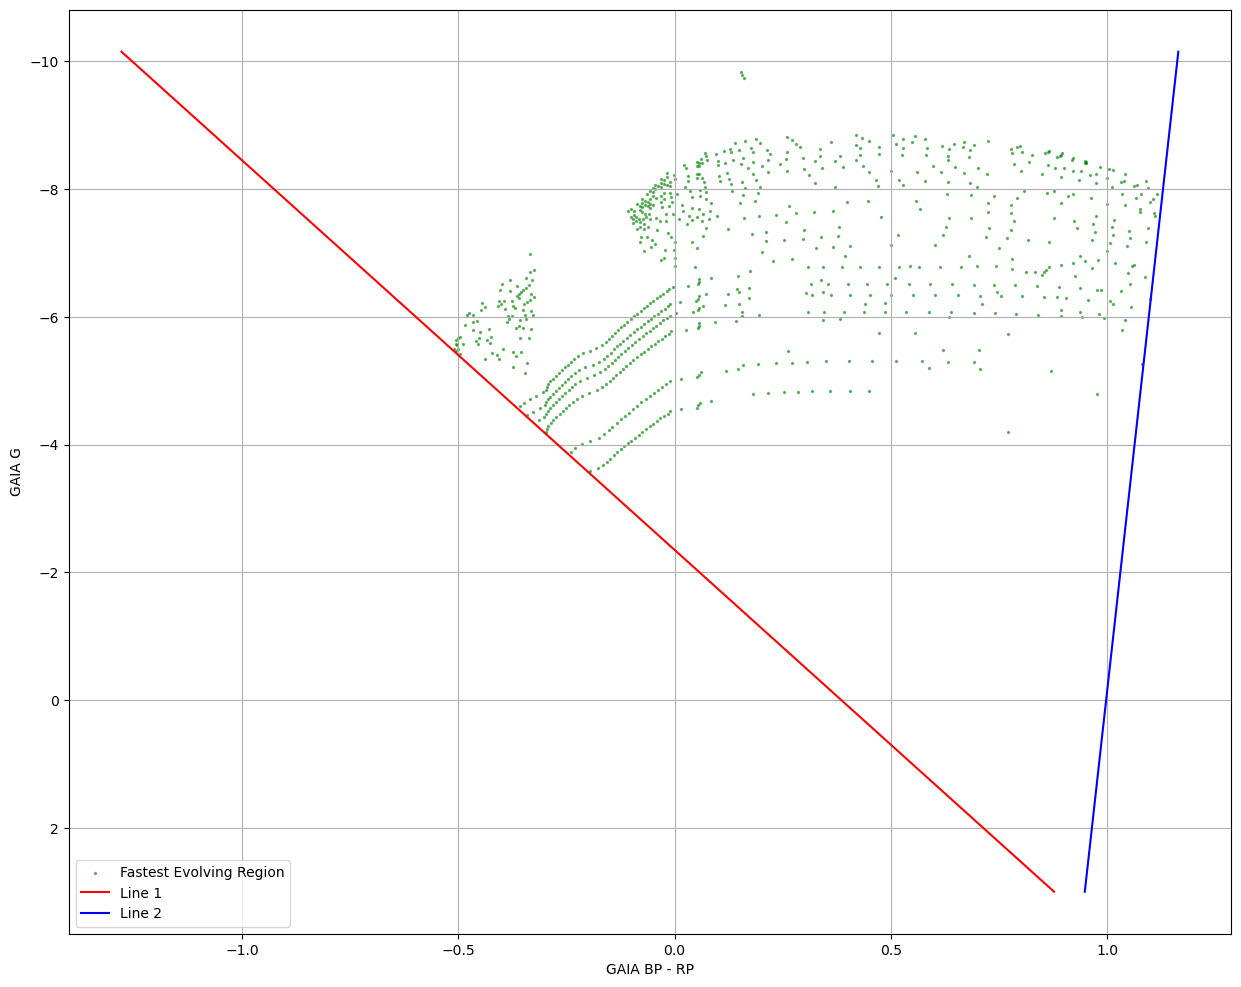

The average age difference for the fastest evolving regions is: 0.9444828347099284


In [36]:
import os
import glob
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Step 1: Change directory to the folder containing .eep.cmd files
os.chdir('.')  # Update this to your directory path

# Step 2: Retrieve and sort .eep.cmd files
eep_cmd_files = glob.glob('*.eep.cmd')
eep_cmd_files.sort()  # Sort files by filename

# Consider only the first 30 files
eep_cmd_files = eep_cmd_files[:40]

# Function to read synthetic star data from .eep.cmd files
def read_synthetic_data(eep_cmd_files):
    data = []
    for eep_cmd_file in eep_cmd_files:
        eepcmd = read_mist_models.EEPCMD(eep_cmd_file)
        B = eepcmd.eepcmds['Gaia_BP_EDR3']
        R = eepcmd.eepcmds['Gaia_RP_EDR3']
        G = eepcmd.eepcmds['Gaia_G_EDR3']
        age = eepcmd.eepcmds['star_age']
        bp_rp = B - R
        for i in range(len(B)):
            data.append([age[i], bp_rp[i], G[i]])
    return pd.DataFrame(data, columns=['star_age', 'bp_rp', 'G'])

# Read the data from the .eep.cmd files
df = read_synthetic_data(eep_cmd_files)

# Step 4.1: Filter the data to only consider regions within the defined lines
line1 = (21 / 128) * df['G'] + 149 / 386
line2 = (-7 / 124 + 0.04) * df['G'] + 603 / 620 + 0.025
df = df[(df['bp_rp'] <= line2) & (df['bp_rp'] >= line1)]

# Step 3: Calculate Cartesian distances in color-magnitude diagram
df['distance'] = np.sqrt(df['bp_rp'].diff()**2 + df['G'].diff()**2)

# Drop the first row with NaN distance
df = df.dropna()

# Identify the regions with the highest distances
distance_threshold = df['distance'].quantile(0.75)
highest_distance_region = df[df['distance'] >= distance_threshold]

# Step 4: Calculate age differences for the highest distance regions
highest_distance_region = highest_distance_region.sort_values('star_age')
highest_distance_region['age_diff'] = highest_distance_region['star_age'].diff().abs()

# Drop the first row with NaN age difference
highest_distance_region = highest_distance_region.dropna()

# Identify the fastest evolving regions among the highest distance regions
fast_threshold = highest_distance_region['age_diff'].quantile(0.25)
fastest_region = highest_distance_region[highest_distance_region['age_diff'] <= fast_threshold]

# Calculate the average age_diff for the fastest evolving regions
average_age_diff = fastest_region['age_diff'].mean()

# Plot the HR diagram for the fastest evolving regions
plt.figure(figsize=(15, 12))
# plt.scatter(df['bp_rp'], df['G'], s=2, alpha=0.5, color='gray', label='All Stars')
plt.scatter(fastest_region['bp_rp'], fastest_region['G'], s=2, alpha=0.5, color='green', label='Fastest Evolving Region')

# Plot the lines
g_range = np.linspace(df['G'].min(), df['G'].max(), 100)
line1_values = (21 / 128) * g_range + 149 / 386
line2_values = (-7 / 124 + 0.04) * g_range + 603 / 620 + 0.025
plt.plot(line1_values, g_range, color='red', label='Line 1')
plt.plot(line2_values, g_range, color='blue', label='Line 2')

plt.xlabel('GAIA BP - RP')
plt.ylabel('GAIA G')
plt.gca().invert_yaxis()  # Invert the y-axis to match astronomical convention
plt.legend()
plt.grid(True)
plt.show()

# Print the average age difference for the fastest evolving regions
print(f"The average age difference for the fastest evolving regions is: {average_age_diff}")

In [ ]:
# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np
# from astroquery.gaia import Gaia
# from astropy.table import vstack

# # Step 5: Query GAIA EDR3 for real stars using the provided template
# query_template = """
# SELECT
#     source_id,
#     parallax,
#     ra,
#     dec,
#     phot_g_mean_mag + 5 * LOG10(parallax) - 10 AS mg,
#     phot_bp_mean_mag + 5 * LOG10(parallax) - 10 AS mbp,
#     phot_rp_mean_mag + 5 * LOG10(parallax) - 10 AS mrp,
#     bp_rp,
#     phot_g_mean_flux,
#     phot_bp_mean_flux,
#     phot_rp_mean_flux,
#     pmra,
#     pmdec
# FROM
#     gaiaedr3.gaia_source
# WHERE
#     parallax_over_error > 10
#     AND phot_bp_rp_excess_factor < 1.3 + 0.06 * POWER(bp_rp, 2)
#     AND phot_bp_rp_excess_factor > 1.0 + 0.015 * POWER(bp_rp, 2)
#     AND bp_rp IS NOT NULL
#     AND phot_bp_mean_mag IS NOT NULL
#     AND phot_rp_mean_mag IS NOT NULL
#     AND dec > 0
#     AND ra BETWEEN {ra_min} AND {ra_max}
# """

# # Function to execute a query for a given RA range
# def execute_query(ra_min, ra_max):
#     query = query_template.format(ra_min=ra_min, ra_max=ra_max)
#     job = Gaia.launch_job_async(query)
#     return job.get_results()

# # Define RA ranges to split the query
# ra_ranges = [(0, 60), (60, 120), (120, 180), (180, 240), (240, 300), (300, 360)]

# # Execute queries and combine results
# results = []
# for ra_min, ra_max in ra_ranges:
#     result = execute_query(ra_min, ra_max)
#     results.append(result)

# # Combine all results into a single table
# gaia_results = vstack(results).to_pandas()

# # Extract GAIA data
# gaia_bp_rp = gaia_results['bp_rp']
# gaia_g = gaia_results['mg']

# # Filter GAIA stars within the region defined by the lines
# line1_gaia = (21 / 128) * gaia_g + 149 / 386
# line2_gaia = (-7 / 124) * gaia_g + 603 / 620
# gaia_in_region = gaia_results[(gaia_bp_rp <= line2_gaia) & (gaia_bp_rp >= line1_gaia) & (gaia_g <= -3) & (gaia_g >= -8)]

# # Plot the HR diagram with the fastest evolving regions and filtered GAIA stars
# plt.figure(figsize=(15, 12))
# plt.scatter(fastest_region['bp_rp'], fastest_region['G'], s=2, alpha=0.5, color='green', label='Fastest Evolving Region')
# if not gaia_in_region.empty:
#     plt.scatter(gaia_in_region['bp_rp'], gaia_in_region['mg'], s=4, alpha=0.6, color='blue', label='GAIA Stars')
# else:
#     print("No GAIA stars found within the specified region.")
# plt.xlabel('GAIA BP - RP')
# plt.ylabel('GAIA G')
# plt.gca().invert_yaxis()  # Invert the y-axis to match astronomical convention
# plt.legend()
# plt.grid(True)

# # Save the plot to a file
# output_path = 'fastest_evolving_region_with_gaia_H_gap.png'  # Update with your desired output path
# plt.savefig(output_path, format='png')

# # Show the plot
# plt.show()

# # Print the average age difference for the fastest evolving regions
# print(f"The average age difference for the fastest evolving regions is: {average_age_diff}")

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from astroquery.gaia import Gaia
from astropy.table import vstack

# Define bp_rp and g magnitude limitations
bp_rp_min = -0.5  # Update this value based on your criteria
bp_rp_max = 1.5  # Update this value based on your criteria
g_min = -8  # Update this value based on your criteria
g_max = -3  # Update this value based on your criteria

# Step 5: Query GAIA EDR3 for real stars using the provided template
query_template = """
SELECT
    source_id,
    parallax,
    ra,
    dec,
    phot_g_mean_mag + 5 * LOG10(parallax) - 10 AS mg,
    phot_bp_mean_mag + 5 * LOG10(parallax) - 10 AS mbp,
    phot_rp_mean_mag + 5 * LOG10(parallax) - 10 AS mrp,
    bp_rp,
    phot_g_mean_flux,
    phot_bp_mean_flux,
    phot_rp_mean_flux,
    ag_gspphot,
    ebpminrp_gspphot,
    pmra,
    pmdec
FROM
    gaiadr3.gaia_source
WHERE
    parallax_over_error > 10
    AND phot_bp_rp_excess_factor < 1.3 + 0.06 * POWER(bp_rp, 2)
    AND phot_bp_rp_excess_factor > 1.0 + 0.015 * POWER(bp_rp, 2)
    AND bp_rp IS NOT NULL
    AND phot_bp_mean_mag IS NOT NULL
    AND phot_rp_mean_mag IS NOT NULL
    AND dec > 0
    AND ra BETWEEN {ra_min} AND {ra_max}
    AND (bp_rp - ebpminrp_gspphot) BETWEEN {bp_rp_min} AND {bp_rp_max}
    AND (phot_g_mean_mag + 5 * LOG10(parallax) - 10 - ag_gspphot) BETWEEN {g_min} AND {g_max}
"""

# Function to execute a query for a given RA range
def execute_query(ra_min, ra_max):
    query = query_template.format(
        ra_min=ra_min, ra_max=ra_max,
        bp_rp_min=bp_rp_min, bp_rp_max=bp_rp_max,
        g_min=g_min, g_max=g_max
    )
    job = Gaia.launch_job_async(query)
    return job.get_results()

# Define RA ranges to split the query
ra_ranges = [(0, 60), (60, 120), (120, 180), (180, 240), (240, 300), (300, 360)]

# Execute queries and combine results
results = []
for ra_min, ra_max in ra_ranges:
    result = execute_query(ra_min, ra_max)
    results.append(result)

# Combine all results into a single table
gaia_results = vstack(results).to_pandas()

# Extract GAIA data
gaia_bp_rp = gaia_results['bp_rp'] - gaia_results['ebpminrp_gspphot']
gaia_g = gaia_results['mg'] - gaia_results['ag_gspphot']

# Filter GAIA stars within the region defined by the lines
line1_gaia = (21 / 128) * gaia_g + 149 / 386
line2_gaia = (-7 / 124 + 0.04) * gaia_g + 603 / 620 + 0.025
gaia_in_region = gaia_results[(gaia_bp_rp <= line2_gaia) & (gaia_bp_rp >= line1_gaia)]

# Step 4: Plot the HR diagram for the fastest evolving regions and GAIA stars
plt.figure(figsize=(15, 12))

# Plot the fastest evolving regions for each file in eep_cmd_files
for idx, eep_cmd_file in enumerate(eep_cmd_files):
    file_data = df[df['file'] == eep_cmd_file].sort_values('star_age')
    fastest_region = file_data[file_data['distance'] >= distance_threshold]
    fastest_region = fastest_region.sort_values('star_age')
    fastest_region['age_diff'] = fastest_region['star_age'].diff().abs()
    fastest_region = fastest_region.dropna()
    fast_threshold = fastest_region['age_diff'].quantile(0.25)
    fastest_region = fastest_region[fastest_region['age_diff'] <= fast_threshold]
    
    if not fastest_region.empty:
        start_age = fastest_region['star_age'].iloc[0]
        end_age = fastest_region['star_age'].iloc[-1]
        plt.scatter(fastest_region['bp_rp'], fastest_region['G'], s=4, alpha=0.7, color='green')
        age_diff = end_age - start_age
        plt.text(fastest_region['bp_rp'].iloc[0], fastest_region['G'].iloc[0], f"{age_diff:.1f}", fontsize=8, color='black')

# Plot the lines
g_range = np.linspace(df['G'].min(), df['G'].max(), 100)
line1_values = (21 / 128) * g_range + 149 / 386
line2_values = (-7 / 124 + 0.04) * g_range + 603 / 620 + 0.025
plt.plot(line1_values, g_range, color='red', label='Line 1')
plt.plot(line2_values, g_range, color='blue', label='Line 2')

# Plot the GAIA stars within the specified region
if not gaia_in_region.empty:
    plt.scatter(gaia_in_region['bp_rp'], gaia_in_region['mg'], s=4, alpha=0.6, color='blue', label='GAIA Stars')
else:
    print("No GAIA stars found within the specified region.")

plt.xlabel('GAIA BP - RP')
plt.ylabel('GAIA G')
plt.gca().invert_yaxis()  # Invert the y-axis to match astronomical convention
plt.legend()
plt.grid(True)

# Save the plot to a file
output_path = 'fastest_evolving_region_with_gaia_H_gap.png'  # Update with your desired output path
plt.savefig(output_path, format='png')

# Show the plot
plt.show()

# Print the average age difference for the fastest evolving regions
print(f"The average age difference for the fastest evolving regions is: {average_age_diff}")

INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


KeyError: 'file'

<Figure size 1500x1200 with 0 Axes>

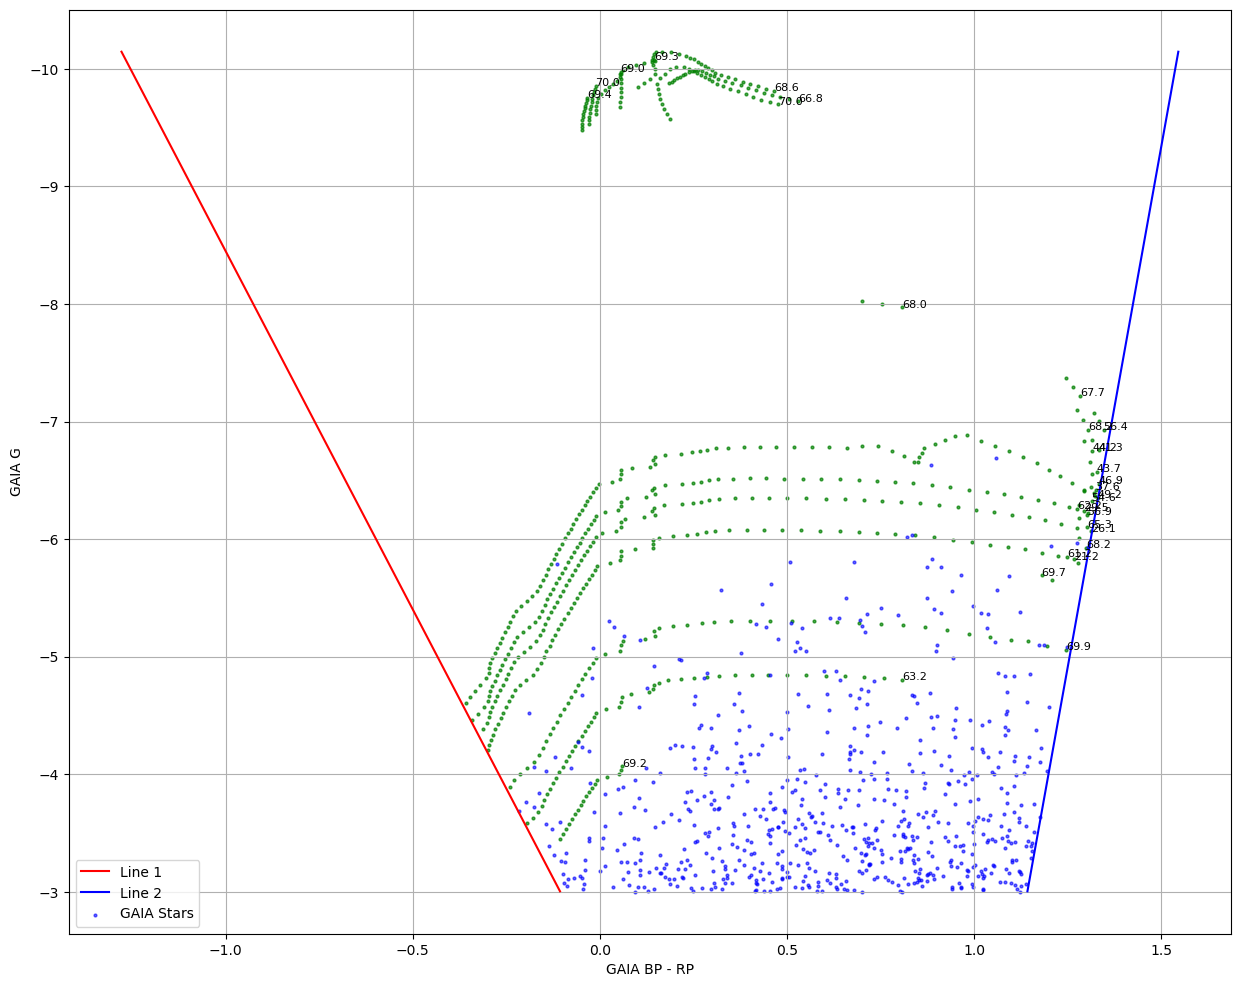

The average age difference for the fastest evolving regions is: 0.778881567763542


In [42]:
# # Plot the HR diagram with the fastest evolving regions and filtered GAIA stars
# plt.figure(figsize=(15, 12))
# # plt.scatter(fastest_region['bp_rp'], fastest_region['G'], s=2, alpha=0.5, color='green', label='Fastest Evolving Region')
# # From earlier
# for idx, eep_cmd_file in enumerate(eep_cmd_files):
#     file_data = df[df['file'] == eep_cmd_file].sort_values('star_age')
#     fastest_region = find_fastest_regions(file_data)
#     if not fastest_region.empty:
#         start_age = fastest_region['star_age'].iloc[0]
#         end_age = fastest_region['star_age'].iloc[-1]
#         plt.scatter(fastest_region['bp_rp'], fastest_region['G'], s=4, alpha=0.7, color='green')
#         # plt.text(fastest_region['bp_rp'].iloc[0], fastest_region['G'].iloc[0], f"{start_age:.1f}", fontsize=4, color='black')
#         diff = end_age - start_age
#         plt.text(fastest_region['bp_rp'].iloc[0], fastest_region['G'].iloc[0], f"{diff:.1f}", fontsize=8, color='black')
#         # print(end_age - start_age)

# # Plot the lines
# g_range = np.linspace(df['G'].min(), df['G'].max(), 100)
# line1_values = (21 / 128) * g_range + 149 / 386
# line2_values = (-7 / 124) * g_range + 603 / 620
# plt.plot(line1_values, g_range, color='red', label='Line 1')
# plt.plot(line2_values, g_range, color='blue', label='Line 2')
# # ending of that part

# if not gaia_in_region.empty:
#     plt.scatter(gaia_in_region['bp_rp'], gaia_in_region['mg'], s=4, alpha=0.6, color='blue', label='GAIA Stars')
# else:
#     print("No GAIA stars found within the specified region.")
# plt.xlabel('GAIA BP - RP')
# plt.ylabel('GAIA G')
# # plt.ylim([-3, -8])
# plt.gca().invert_yaxis()  # Invert the y-axis to match astronomical convention
# plt.legend()
# plt.grid(True)

# # Save the plot to a file
# output_path = 'fastest_evolving_region_with_gaia_H_gap.png'  # Update with your desired output path
# plt.savefig(output_path, format='png')

# # Show the plot
# plt.show()

# # Print the average age difference for the fastest evolving regions
# print(f"The average age difference for the fastest evolving regions is: {average_age_diff}")

In [ ]:
# Define the output path for the text file
output_text_path = 'selected_gaia_stars_H_gap.txt'

# Check if the closest GAIA stars DataFrame is not empty
if not gaia_in_region.empty:
    # Select the desired columns to save
    columns_to_save = ['source_id', 'parallax', 'ra', 'dec', 'mg', 'mbp', 'mrp', 'bp_rp', 'phot_g_mean_flux', 'phot_bp_mean_flux', 'phot_rp_mean_flux', 'pmra', 'pmdec']
    
    # Convert source_id to string to prevent scientific notation and remove the dot if necessary
    gaia_in_region['source_id'] = gaia_in_region['source_id'].apply(lambda x: str(int(float(x))))
    
    # Save the details to a text file
    gaia_in_region[columns_to_save].to_csv(output_text_path, index=False, sep='\t', float_format='%.6f')
    print(f"Details of the selected GAIA stars have been saved to {output_text_path}")
else:
    print("No GAIA stars were selected to save.")

In [ ]:
# # Define the output path for the text file
# output_text_path = 'Fastest_70_Years_Tracks.txt'

# # Check if the closest GAIA stars DataFrame is not empty
# if not gaia_in_region.empty:
#     # Select the desired columns to save
#     columns_to_save = ['source_id', 'parallax', 'ra', 'dec', 'mg', 'mbp', 'mrp', 'bp_rp', 'phot_g_mean_flux', 'phot_bp_mean_flux', 'phot_rp_mean_flux', 'pmra', 'pmdec']
    
#     # Save the details to a text file
#     gaia_in_region[columns_to_save].to_csv(output_text_path, index=False, sep='\t')
#     print(f"Details of the selected GAIA stars have been saved to {output_text_path}")
# else:
#     print("No GAIA stars were selected to save.")

In [ ]:
print("Okay!")

Reading in: 0010000M.track.eep.cmd
Reading in: 0020000M.track.eep.cmd
Reading in: 0030000M.track.eep.cmd
Reading in: 0040000M.track.eep.cmd
Reading in: 0050000M.track.eep.cmd
Reading in: 0060000M.track.eep.cmd
Reading in: 0070000M.track.eep.cmd
Reading in: 0080000M.track.eep.cmd
Reading in: 0090000M.track.eep.cmd
Reading in: 0100000M.track.eep.cmd
Reading in: 0110000M.track.eep.cmd
Reading in: 0120000M.track.eep.cmd
Reading in: 0130000M.track.eep.cmd
Reading in: 0140000M.track.eep.cmd
Reading in: 0150000M.track.eep.cmd
Reading in: 0160000M.track.eep.cmd
Reading in: 0170000M.track.eep.cmd
Reading in: 0180000M.track.eep.cmd
Reading in: 0190000M.track.eep.cmd
Reading in: 0200000M.track.eep.cmd
Reading in: 0210000M.track.eep.cmd
Reading in: 0220000M.track.eep.cmd
Reading in: 0230000M.track.eep.cmd
Reading in: 0240000M.track.eep.cmd
Reading in: 0250000M.track.eep.cmd
Reading in: 0260000M.track.eep.cmd
Reading in: 0270000M.track.eep.cmd
Reading in: 0280000M.track.eep.cmd
Reading in: 0290000M

/tmp/ipykernel_241311/197579921.py:86: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(eep_cmd_files))


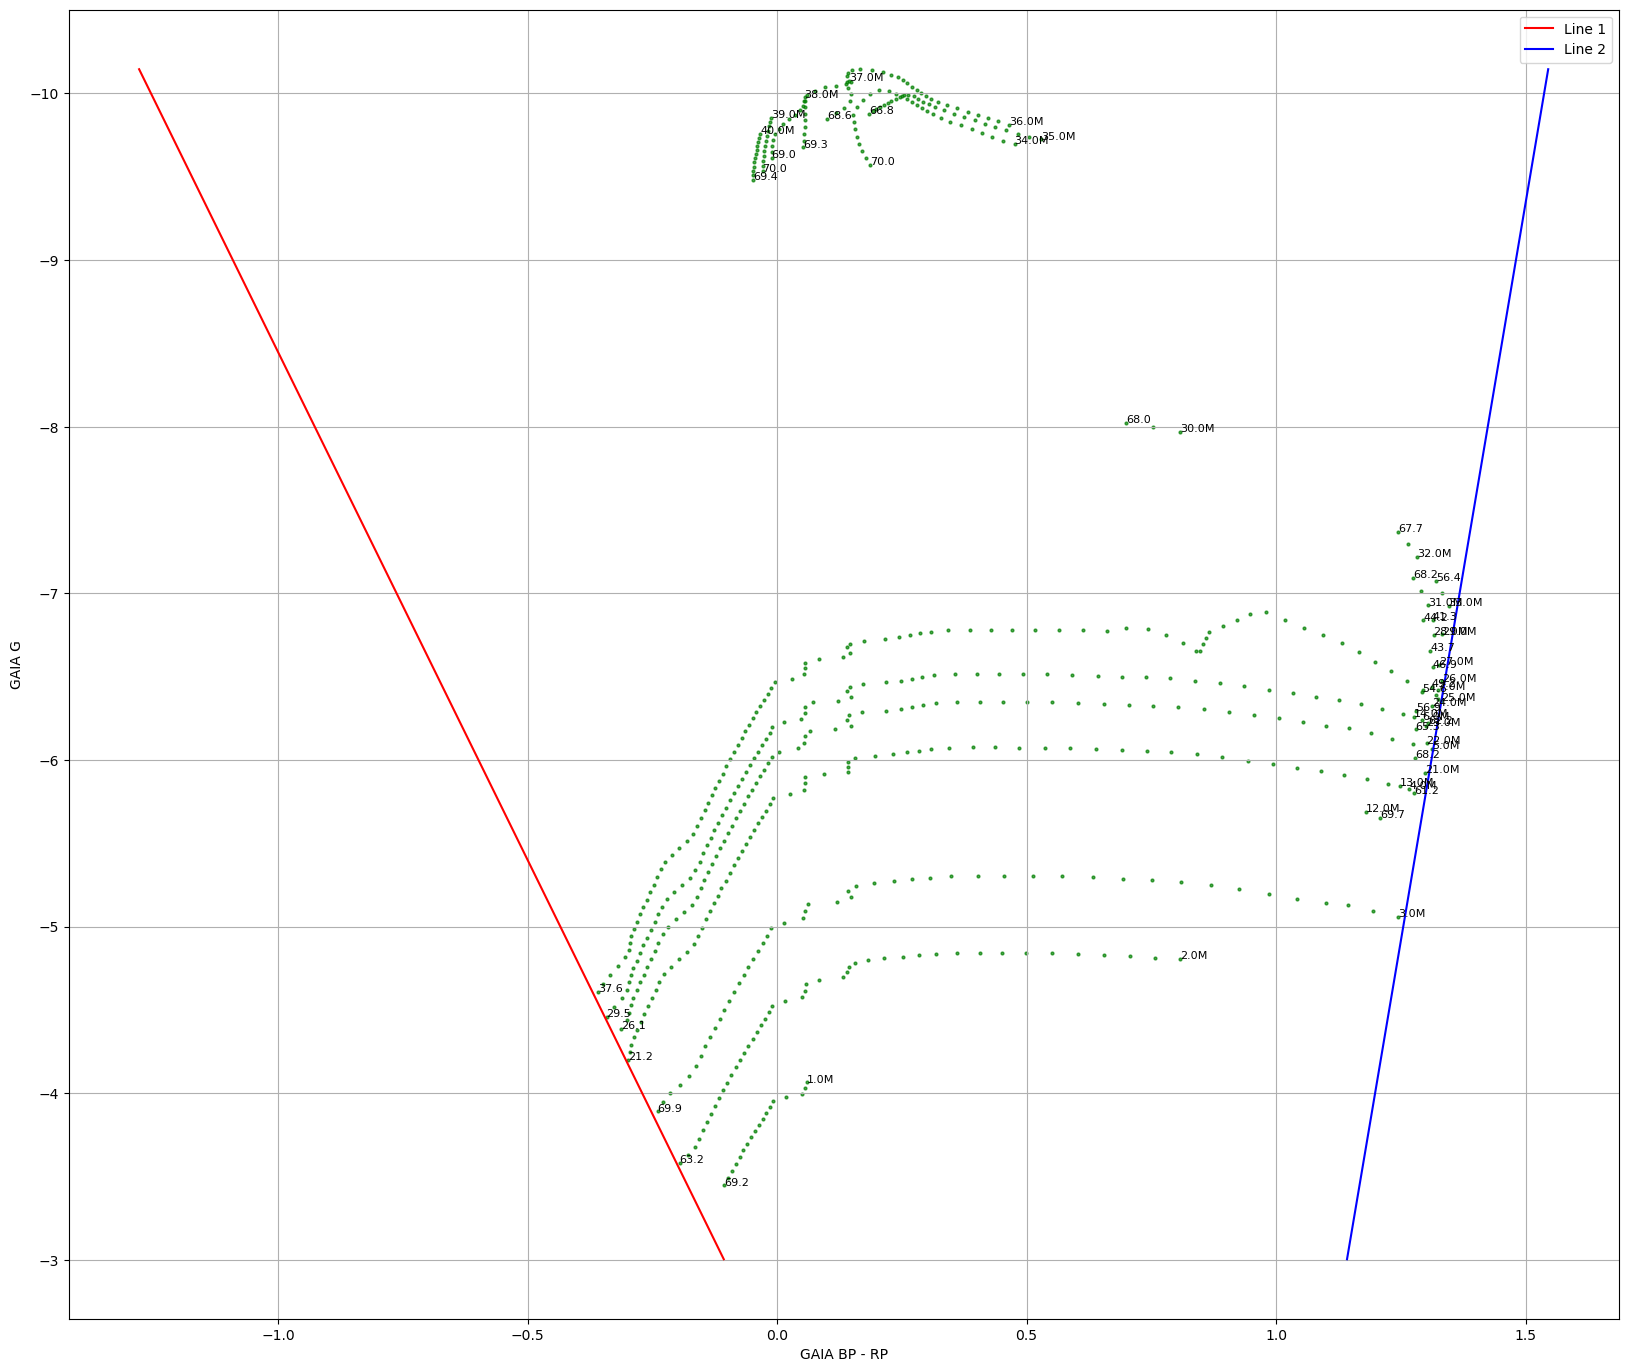

INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
No GAIA stars found close to the fastest evolving regions.


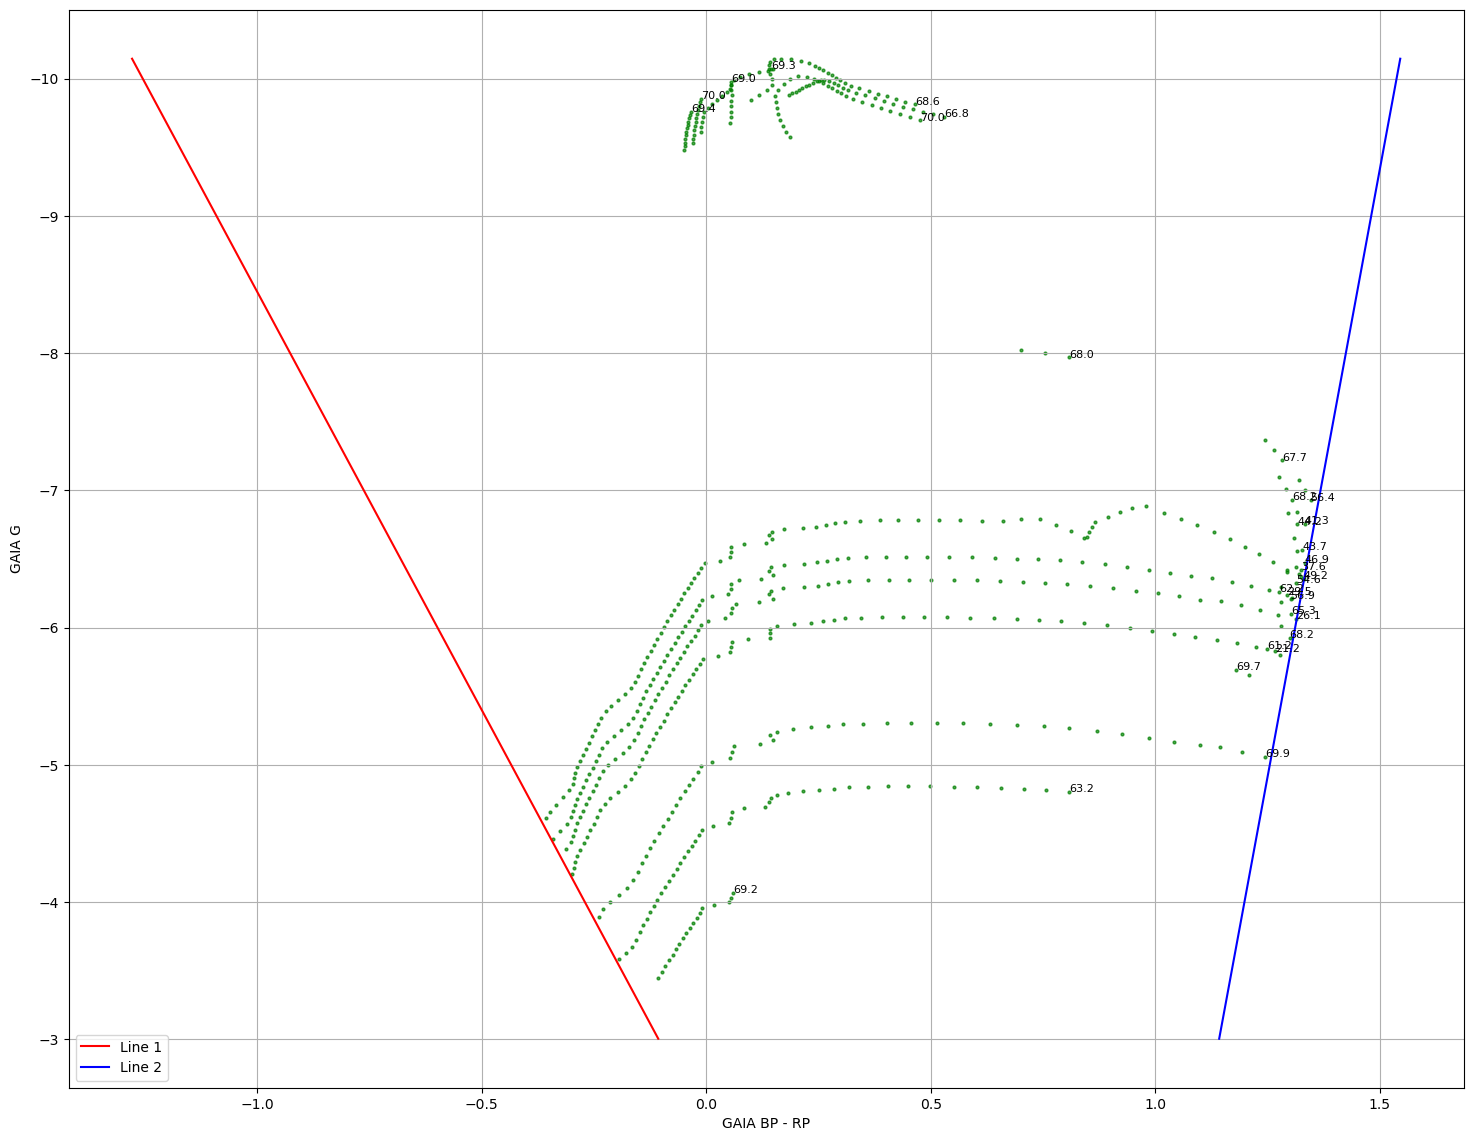

The average age difference for the fastest evolving regions is: -798593.1956768598


In [8]:
import os
import glob
import matplotlib.pyplot as plt
import pandas as pd
import read_mist_models
import numpy as np
from astroquery.gaia import Gaia
from astropy.table import vstack

# Define bp_rp and g magnitude limitations
bp_rp_min = -0.5  # Update this value based on your criteria
bp_rp_max = 1.5  # Update this value based on your criteria
g_min = -8  # Update this value based on your criteria
g_max = -3  # Update this value based on your criteria

# Step 1: Change directory to the folder containing .eep.cmd files
os.chdir('/home/dutta/Downloads/MIST_ET')  # Update this to your directory path

# Step 2: Retrieve and sort .eep.cmd files
eep_cmd_files = glob.glob('*.eep.cmd')
eep_cmd_files.sort()  # Sort files by filename

# Consider only the first 40 files
eep_cmd_files = eep_cmd_files[:40]

# Function to read synthetic star data from .eep.cmd files
def read_synthetic_data(eep_cmd_files):
    data = []
    for eep_cmd_file in eep_cmd_files:
        eepcmd = read_mist_models.EEPCMD(eep_cmd_file)
        B = eepcmd.eepcmds['Gaia_BP_EDR3']
        R = eepcmd.eepcmds['Gaia_RP_EDR3']
        G = eepcmd.eepcmds['Gaia_G_EDR3']
        age = eepcmd.eepcmds['star_age']
        bp_rp = B - R
        for i in range(len(B)):
            data.append([age[i], bp_rp[i], G[i], eep_cmd_file])
    return pd.DataFrame(data, columns=['star_age', 'bp_rp', 'G', 'file'])

# Read the data from the .eep.cmd files
df = read_synthetic_data(eep_cmd_files)

# Step 3: Calculate age differences and identify regions with cumulative age difference <= 70 years
def find_fastest_regions(data):
    regions = []
    distances = []
    n = len(data)

    for i in range(n):
        cumulative_age_diff = 0
        region = []
        for j in range(i, n):
            if j > i:
                cumulative_age_diff += abs(data['star_age'].iloc[j] - data['star_age'].iloc[j-1])
            if cumulative_age_diff <= 70:
                region.append(j)
            else:
                break
        if len(region) > 1:
            start_age = data['star_age'].iloc[region[0]]
            end_age = data['star_age'].iloc[region[-1]]
            if abs(end_age - start_age) <= 70:
                # Calculate total Cartesian distance for the region
                total_distance = np.sum(np.sqrt(np.diff(data['bp_rp'].iloc[region])**2 + np.diff(data['G'].iloc[region])**2))
                regions.append(region)
                distances.append(total_distance)
    
    # Find the region with the highest total distance
    if regions:
        max_distance_region = regions[np.argmax(distances)]
        return data.iloc[max_distance_region]
    else:
        return pd.DataFrame(columns=data.columns)

# Filter the data to only consider regions within the defined lines
def filter_by_lines(df):
    line1 = (21 / 128) * df['G'] + 149 / 386
    line2 = (-7 / 124) * df['G'] + 603 / 620
    return df[(df['bp_rp'] <= line2) & (df['bp_rp'] >= line1) & (df['G'] <= -3)]

df = filter_by_lines(df)

# Plot the HR diagram with regions highlighted for each file
plt.figure(figsize=(20, 17))

colors = plt.cm.get_cmap('tab10', len(eep_cmd_files))

for idx, eep_cmd_file in enumerate(eep_cmd_files):
    file_data = df[df['file'] == eep_cmd_file].sort_values('star_age')
    fastest_region = find_fastest_regions(file_data)
    if not fastest_region.empty:
        start_age = fastest_region['star_age'].iloc[0]
        end_age = fastest_region['star_age'].iloc[-1]
        mass = int(eep_cmd_file.split('M')[0]) / 1e4  # Extract and format mass
        plt.scatter(fastest_region['bp_rp'], fastest_region['G'], s=4, alpha=0.7, color='green')
        # Annotate with the mass
        plt.text(fastest_region['bp_rp'].iloc[0], fastest_region['G'].iloc[0], f"{mass}M", fontsize=8, color='black')
        diff = end_age - start_age
        plt.text(fastest_region['bp_rp'].iloc[-1], fastest_region['G'].iloc[-1], f"{diff:.1f}", fontsize=8, color='black')

# Plot the lines
g_range = np.linspace(df['G'].min(), df['G'].max(), 100)
line1_values = (21 / 128) * g_range + 149 / 386
line2_values = (-7 / 124) * g_range + 603 / 620
plt.plot(line1_values, g_range, color='red', label='Line 1')
plt.plot(line2_values, g_range, color='blue', label='Line 2')

plt.xlabel('GAIA BP - RP')
plt.ylabel('GAIA G')
plt.gca().invert_yaxis()  # Invert the y-axis to match astronomical convention
plt.legend()
plt.grid(True)

# Save the plot to a file
output_path = 'fastest_regions_70_years.png'  # Update with your desired output path
plt.savefig(output_path, format='png')

# Show the plot
plt.show()

# Step 5: Query GAIA EDR3 for real stars using the provided template
query_template = """
SELECT
    source_id,
    parallax,
    ra,
    dec,
    phot_g_mean_mag + 5 * LOG10(parallax) - 10 AS mg,
    phot_bp_mean_mag + 5 * LOG10(parallax) - 10 AS mbp,
    phot_rp_mean_mag + 5 * LOG10(parallax) - 10 AS mrp,
    bp_rp,
    phot_g_mean_flux,
    phot_bp_mean_flux,
    phot_rp_mean_flux,
    pmra,
    pmdec
FROM
    gaiaedr3.gaia_source
WHERE
    parallax_over_error > 10
    AND phot_bp_rp_excess_factor < 1.3 + 0.06 * POWER(bp_rp, 2)
    AND phot_bp_rp_excess_factor > 1.0 + 0.015 * POWER(bp_rp, 2)
    AND bp_rp IS NOT NULL
    AND phot_bp_mean_mag IS NOT NULL
    AND phot_rp_mean_mag IS NOT NULL
    AND dec > 0
    AND ra BETWEEN {ra_min} AND {ra_max}
    AND bp_rp BETWEEN {bp_rp_min} AND {bp_rp_max}
    AND (phot_g_mean_mag + 5 * LOG10(parallax) - 10) BETWEEN {g_min} AND {g_max}
"""

# Function to execute a query for a given RA range
def execute_query(ra_min, ra_max, bp_rp_min, bp_rp_max, g_min, g_max):
    query = query_template.format(ra_min=ra_min, ra_max=ra_max, bp_rp_min=bp_rp_min, bp_rp_max=bp_rp_max, g_min=g_min, g_max=g_max)
    job = Gaia.launch_job_async(query)
    return job.get_results()

# Define RA ranges to split the query
ra_ranges = [(0, 60), (60, 120), (120, 180), (180, 240), (240, 300), (300, 360)]

# Execute queries and combine results
results = []
for ra_min, ra_max in ra_ranges:
    result = execute_query(ra_min, ra_max, bp_rp_min, bp_rp_max, g_min, g_max)
    results.append(result)

# Combine all results into a single table
gaia_results = vstack(results).to_pandas()

# Extract GAIA data
gaia_bp_rp = gaia_results['bp_rp']
gaia_g = gaia_results['mg']

# Step 6: Filter GAIA stars to overlay only those close to the green points
def find_closest_points(gaia_results, fastest_region, threshold=0.1):
    closest_stars = []
    for index, row in fastest_region.iterrows():
        distances = np.sqrt((gaia_results['bp_rp'] - row['bp_rp'])**2 + (gaia_results['mg'] - row['G'])**2)
        close_stars = gaia_results[distances <= threshold]
        closest_stars.append(close_stars)
    if closest_stars:
        return pd.concat(closest_stars).drop_duplicates()
    else:
        return pd.DataFrame()

# Find closest GAIA stars to the green points
closest_gaia_stars = find_closest_points(gaia_results, fastest_region)

# Plot the HR diagram with the fastest evolving regions and closest GAIA stars
plt.figure(figsize=(18, 14))
# plt.scatter(fastest_region['bp_rp'], fastest_region['G'], s=2, alpha=0.5, color='green', label='Fastest Evolving Region')
# From earlier
for idx, eep_cmd_file in enumerate(eep_cmd_files):
    file_data = df[df['file'] == eep_cmd_file].sort_values('star_age')
    fastest_region = find_fastest_regions(file_data)
    if not fastest_region.empty:
        start_age = fastest_region['star_age'].iloc[0]
        end_age = fastest_region['star_age'].iloc[-1]
        plt.scatter(fastest_region['bp_rp'], fastest_region['G'], s=4, alpha=0.7, color='green')
        # plt.text(fastest_region['bp_rp'].iloc[0], fastest_region['G'].iloc[0], f"{start_age:.1f}", fontsize=4, color='black')
        diff = end_age - start_age
        plt.text(fastest_region['bp_rp'].iloc[0], fastest_region['G'].iloc[0], f"{diff:.1f}", fontsize=8, color='black')
        # print(end_age - start_age)

# Plot the lines
g_range = np.linspace(df['G'].min(), df['G'].max(), 100)
line1_values = (21 / 128) * g_range + 149 / 386
line2_values = (-7 / 124) * g_range + 603 / 620
plt.plot(line1_values, g_range, color='red', label='Line 1')
plt.plot(line2_values, g_range, color='blue', label='Line 2')
# ending of that part

# plt.scatter(fastest_region['bp_rp'], fastest_region['G'], s=2, alpha=0.5, color='green', label='Fastest Evolving Region')
if not closest_gaia_stars.empty:
    plt.scatter(closest_gaia_stars['bp_rp'], closest_gaia_stars['mg'], s=4, alpha=0.6, color='blue', label='GAIA Stars')
else:
    print("No GAIA stars found close to the fastest evolving regions.")
plt.xlabel('GAIA BP - RP')
plt.ylabel('GAIA G')
plt.gca().invert_yaxis()  # Invert the y-axis to match astronomical convention
plt.legend()
plt.grid(True)

# Save the plot to a file
output_path = 'fastest_evolving_region_with_gaia_updated.png'  # Update with your desired output path
plt.savefig(output_path, format='png')

# Show the plot
plt.show()

# Print the average age difference for the fastest evolving regions
average_age_diff = df['star_age'].diff().mean()
print(f"The average age difference for the fastest evolving regions is: {average_age_diff}")

In [9]:
# Save GAIA data to a text file
closest_gaia_stars.to_csv('gaia_data.txt', sep='\t', index=False)
print("GAIA data saved to gaia_data.txt")

# Extract GAIA data
gaia_bp_rp = closest_gaia_stars['bp_rp']
gaia_g = closest_gaia_stars['mg']

GAIA data saved to gaia_data.txt


Reading in: 0010000M.track.eep.cmd
Reading in: 0020000M.track.eep.cmd
Reading in: 0030000M.track.eep.cmd
Reading in: 0040000M.track.eep.cmd
Reading in: 0050000M.track.eep.cmd
Reading in: 0060000M.track.eep.cmd
Reading in: 0070000M.track.eep.cmd
Reading in: 0080000M.track.eep.cmd
Reading in: 0090000M.track.eep.cmd
Reading in: 0100000M.track.eep.cmd
Reading in: 0110000M.track.eep.cmd
Reading in: 0120000M.track.eep.cmd
Reading in: 0130000M.track.eep.cmd
Reading in: 0140000M.track.eep.cmd
Reading in: 0150000M.track.eep.cmd
Reading in: 0160000M.track.eep.cmd
Reading in: 0170000M.track.eep.cmd
Reading in: 0180000M.track.eep.cmd
Reading in: 0190000M.track.eep.cmd
Reading in: 0200000M.track.eep.cmd
Reading in: 0210000M.track.eep.cmd
Reading in: 0220000M.track.eep.cmd
Reading in: 0230000M.track.eep.cmd
Reading in: 0240000M.track.eep.cmd
Reading in: 0250000M.track.eep.cmd
Reading in: 0260000M.track.eep.cmd
Reading in: 0270000M.track.eep.cmd
Reading in: 0280000M.track.eep.cmd
Reading in: 0290000M

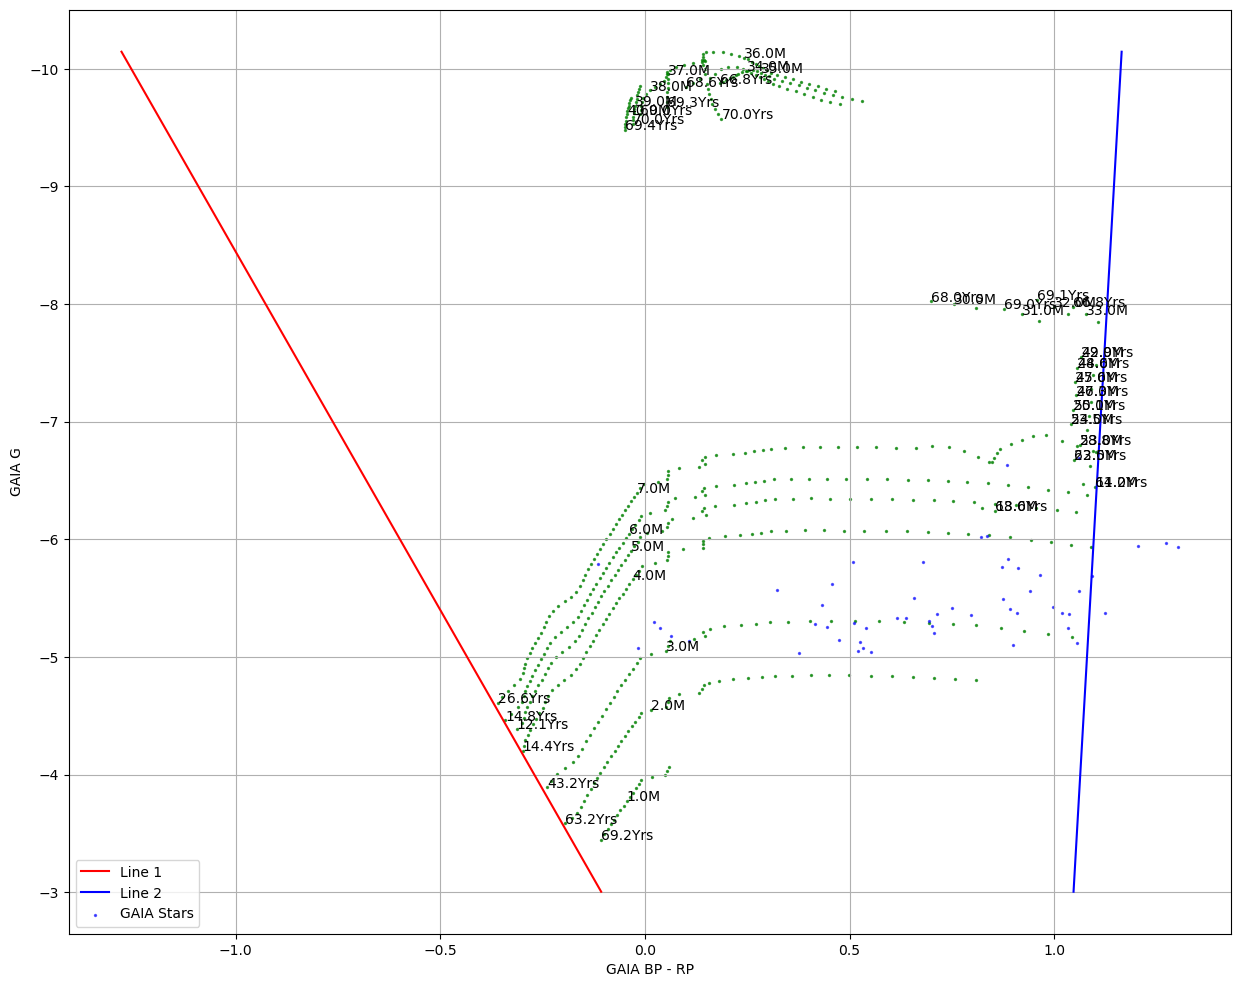

The average age difference for the fastest evolving regions is: 69.43192258197814


In [52]:
import os
import glob
import matplotlib.pyplot as plt
import pandas as pd
import read_mist_models
import numpy as np

# Step 1: Change directory to the folder containing .eep.cmd files
os.chdir('.')  # Update this to your directory path

# Step 2: Retrieve and sort .eep.cmd files
eep_cmd_files = glob.glob('*.eep.cmd')
eep_cmd_files.sort()  # Sort files by filename

# Consider only the first 40 files
eep_cmd_files = eep_cmd_files[:40]

# Function to read synthetic star data from .eep.cmd files
def read_synthetic_data(eep_cmd_files):
    data = []
    for eep_cmd_file in eep_cmd_files:
        eepcmd = read_mist_models.EEPCMD(eep_cmd_file)
        B = eepcmd.eepcmds['Gaia_BP_EDR3']
        R = eepcmd.eepcmds['Gaia_RP_EDR3']
        G = eepcmd.eepcmds['Gaia_G_EDR3']
        age = eepcmd.eepcmds['star_age']
        bp_rp = B - R
        for i in range(len(B)):
            data.append([age[i], bp_rp[i], G[i], eep_cmd_file])
    return pd.DataFrame(data, columns=['star_age', 'bp_rp', 'G', 'file'])

# Read the data from the .eep.cmd files
df = read_synthetic_data(eep_cmd_files)

# Filter the data to only consider regions within the defined lines
def filter_by_lines(df):
    line1 = (21 / 128) * df['G'] + 149 / 386
    line2 = (-7 / 124 + 0.04) * df['G'] + 603 / 620 + 0.025
    return df[(df['bp_rp'] <= line2) & (df['bp_rp'] >= line1) & (df['G'] <= -3)]

df = filter_by_lines(df)

# Function to find fastest evolving regions
def find_fastest_regions(data):
    regions = []
    distances = []
    n = len(data)

    for i in range(n):
        cumulative_age_diff = 0
        region = []
        for j in range(i, n):
            if j > i:
                cumulative_age_diff += abs(data['star_age'].iloc[j] - data['star_age'].iloc[j-1])
            if cumulative_age_diff <= 70:
                region.append(j)
            else:
                break
        if len(region) > 1:
            # Calculate total Cartesian distance for the region
            total_distance = np.sum(np.sqrt(np.diff(data['bp_rp'].iloc[region])**2 + np.diff(data['G'].iloc[region])**2))
            regions.append(region)
            distances.append(total_distance)
    
    # Find the region with the highest total distance
    if regions:
        max_distance_region = regions[np.argmax(distances)]
        return data.iloc[max_distance_region]
    else:
        return pd.DataFrame(columns=data.columns)

# Read GAIA data from the selected file
gaia_df = pd.read_csv('selected_gaia_stars_H_gap.txt', sep='\t')

# Plot the HR diagram with the fastest evolving regions and filtered GAIA stars
plt.figure(figsize=(15, 12))

for idx, eep_cmd_file in enumerate(eep_cmd_files):
    file_data = df[df['file'] == eep_cmd_file].sort_values('star_age')
    fastest_region = find_fastest_regions(file_data)
    if not fastest_region.empty:
        start_age = fastest_region['star_age'].iloc[0]
        end_age = fastest_region['star_age'].iloc[-1]
        mass = int(eep_cmd_file.split('M')[0]) / 1e4  # Extract and format mass
        plt.scatter(fastest_region['bp_rp'], fastest_region['G'], s=2, alpha=0.7, color='green')
        # Annotate with the mass at the middle point of the region
        mid_idx = len(fastest_region) // 2
        plt.text(fastest_region['bp_rp'].iloc[mid_idx], fastest_region['G'].iloc[mid_idx], f"{mass}M", fontsize=10, color='black')
        diff = end_age - start_age
        plt.text(fastest_region['bp_rp'].iloc[-1], fastest_region['G'].iloc[-1], f"{diff:.1f}Yrs", fontsize=10, color='black')

# Plot the lines
g_range = np.linspace(df['G'].min(), df['G'].max(), 100)
line1_values = (21 / 128) * g_range + 149 / 386
line2_values = (-7 / 124 + 0.04) * g_range + 603 / 620 + 0.025
plt.plot(line1_values, g_range, color='red', label='Line 1')
plt.plot(line2_values, g_range, color='blue', label='Line 2')

# Calculate distance between each blue and green point
selected_blue_points = []
for idx, gaia_star in gaia_df.iterrows():
    gaia_bp_rp = gaia_star['bp_rp']
    gaia_g = gaia_star['mg']
    min_distance = float('inf')
    for _, green_star in fastest_region.iterrows():
        distance = np.sqrt((gaia_bp_rp - green_star['bp_rp'])**2 + (gaia_g - green_star['G'])**2)
        if distance < min_distance:
            min_distance = distance
    if min_distance < 4.5:
        selected_blue_points.append(gaia_star)

selected_blue_points_df = pd.DataFrame(selected_blue_points)

# Save the selected blue points to a new text file
selected_blue_points_df.to_csv('closest_gaia_stars_H_gap.txt', sep='\t', index=False)

# Plot the selected blue points
if not selected_blue_points_df.empty:
    plt.scatter(selected_blue_points_df['bp_rp'], selected_blue_points_df['mg'], s=2, alpha=0.6, color='blue', label='GAIA Stars')
else:
    print("No GAIA stars found within the specified region.")
plt.xlabel('GAIA BP - RP')
plt.ylabel('GAIA G')
plt.gca().invert_yaxis()  # Invert the y-axis to match astronomical convention
plt.legend()
plt.grid(True)

# Save the plot to a file
output_path = 'fastest_evolving_region_with_gaia_H_gap.png'  # Update with your desired output path
plt.savefig(output_path, format='png')

# Show the plot
plt.show()

# Print the average age difference for the fastest evolving regions
average_age_diff = diff.mean()
print(f"The average age difference for the fastest evolving regions is: {average_age_diff}")

Reading in: 0010000M.track.eep.cmd
Reading in: 0020000M.track.eep.cmd
Reading in: 0030000M.track.eep.cmd
Reading in: 0040000M.track.eep.cmd
Reading in: 0050000M.track.eep.cmd
Reading in: 0054000M0.track.eep.cmd
Reading in: 0054000M1.track.eep.cmd
Reading in: 0054000M2.track.eep.cmd
Reading in: 0054000M3.track.eep.cmd
Reading in: 0054000MV1.track.eep.cmd
Reading in: 0060000M.track.eep.cmd
Reading in: 0070000M.track.eep.cmd
Reading in: 0080000M.track.eep.cmd
Reading in: 0090000M.track.eep.cmd
Reading in: 0100000M.track.eep.cmd
Reading in: 0110000M.track.eep.cmd
Reading in: 0120000M.track.eep.cmd
Reading in: 0130000M.track.eep.cmd
Reading in: 0140000M.track.eep.cmd
Reading in: 0150000M.track.eep.cmd
Reading in: 0160000M.track.eep.cmd
Reading in: 0170000M.track.eep.cmd
Reading in: 0180000M.track.eep.cmd
Reading in: 0190000M.track.eep.cmd
Reading in: 0200000M.track.eep.cmd
Reading in: 0210000M.track.eep.cmd
Reading in: 0220000M.track.eep.cmd
Reading in: 0230000M.track.eep.cmd
Reading in: 02

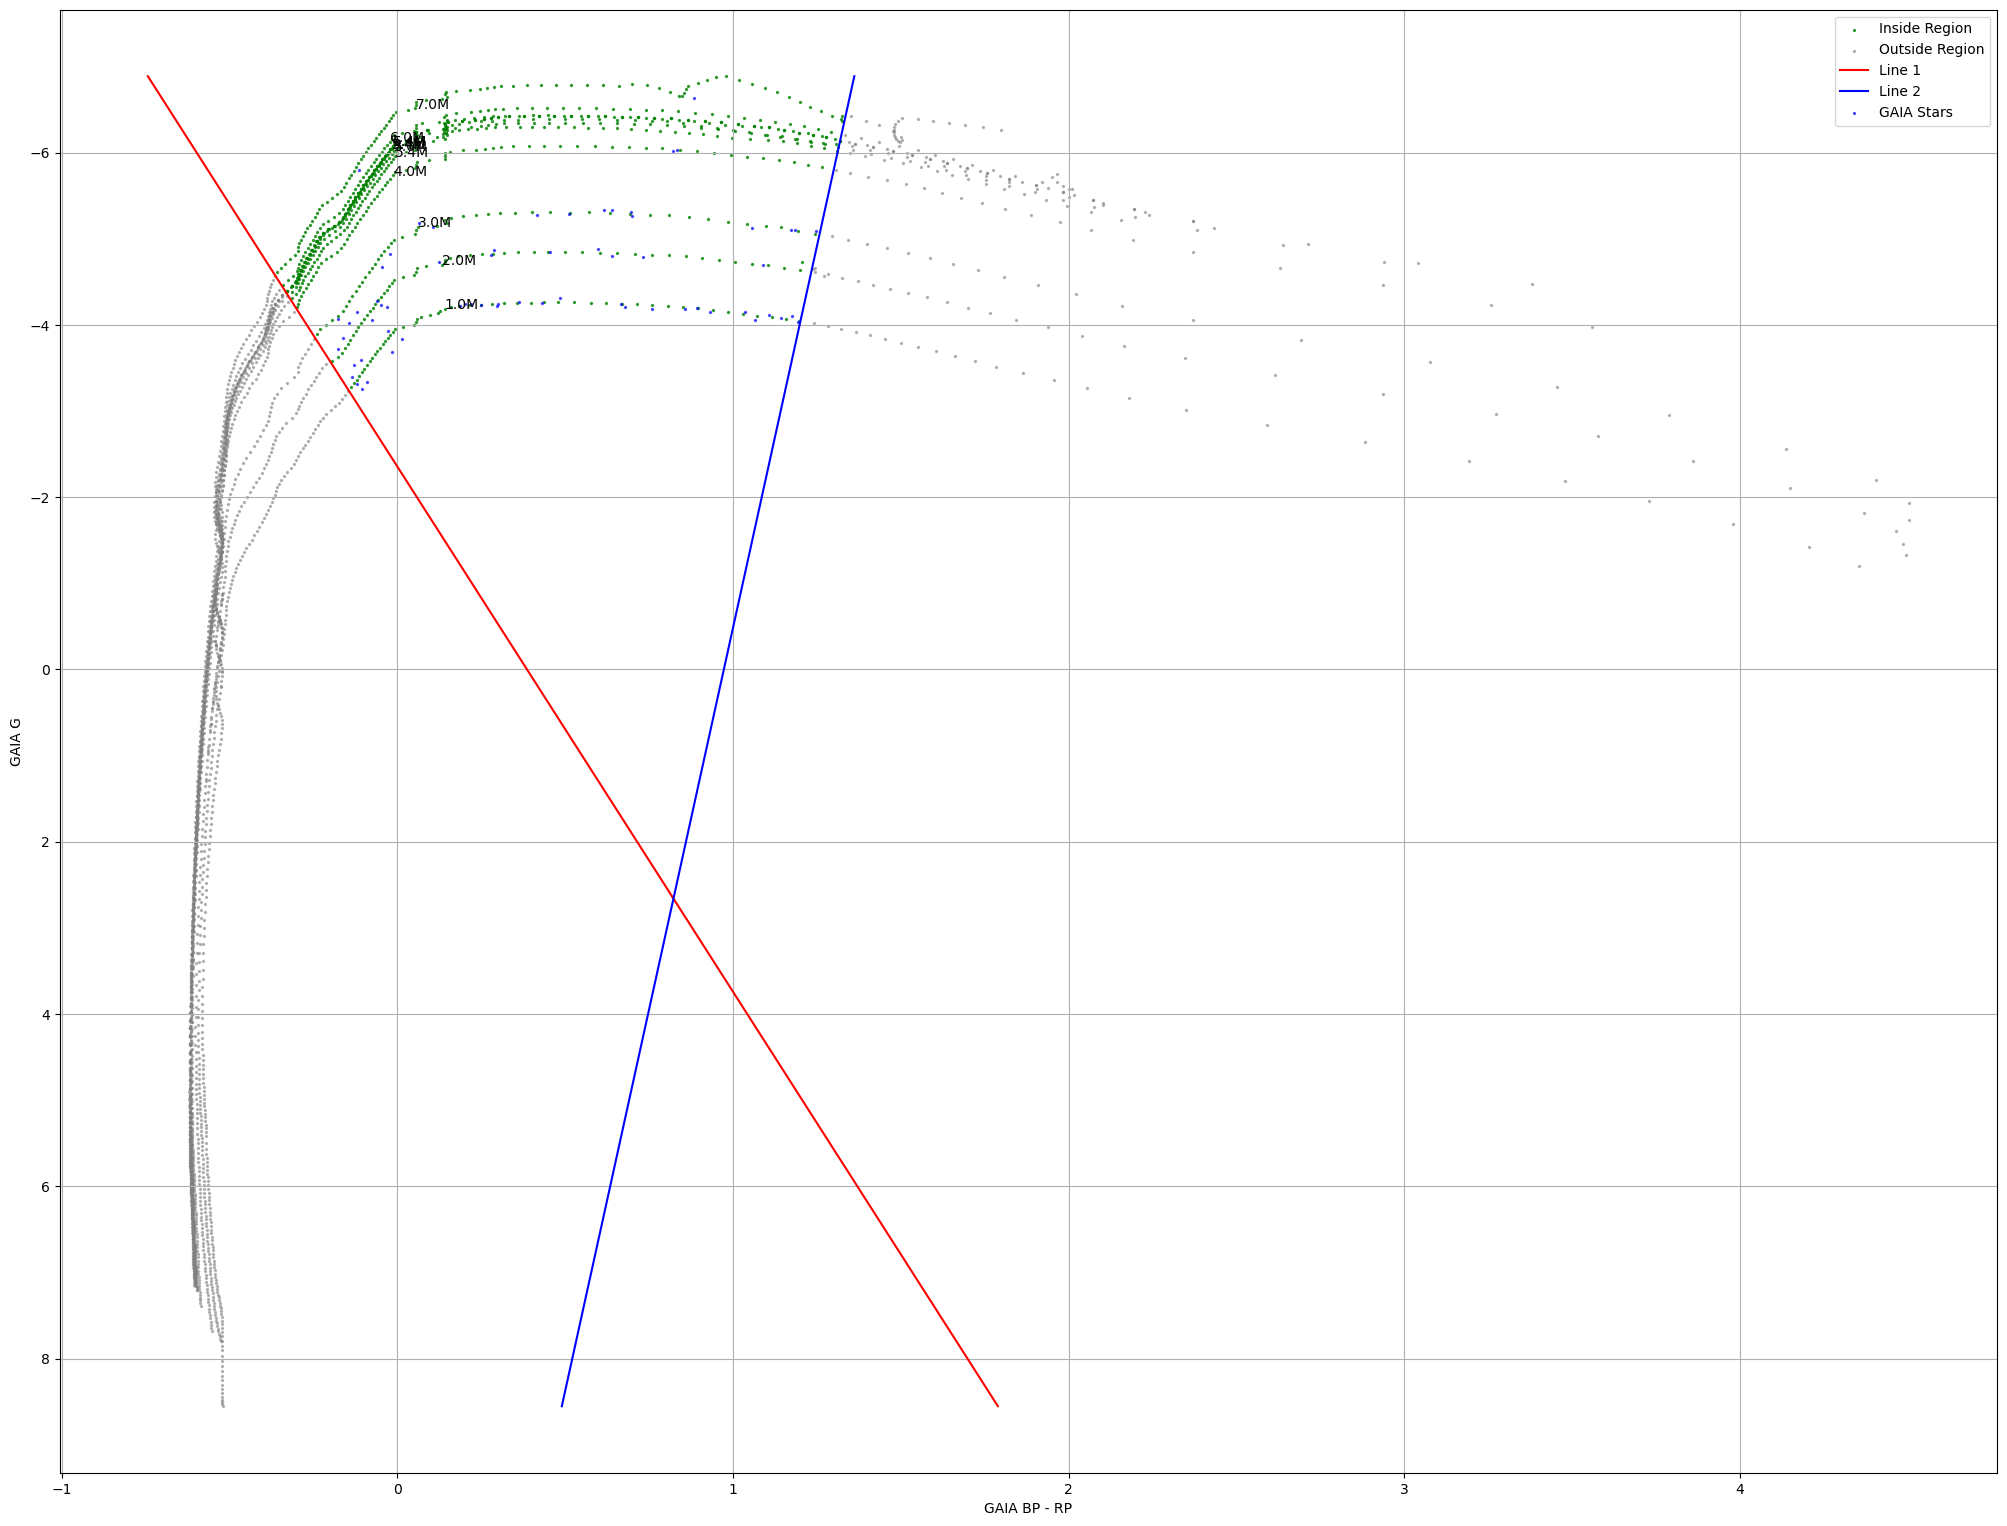

In [3]:
import os
import glob
import matplotlib.pyplot as plt
import pandas as pd
import read_mist_models
import numpy as np

# Step 1: Change directory to the folder containing .eep.cmd files
os.chdir('.')  # Update this to your directory path

# Step 2: Retrieve and sort .eep.cmd files
eep_cmd_files = glob.glob('*.eep.cmd')
eep_cmd_files.sort()  # Sort files by filename

# Consider only the first 40 files
eep_cmd_files = eep_cmd_files

# Function to read synthetic star data from .eep.cmd files
def read_synthetic_data(eep_cmd_files):
    data = []
    for eep_cmd_file in eep_cmd_files:
        eepcmd = read_mist_models.EEPCMD(eep_cmd_file)
        B = eepcmd.eepcmds['Gaia_BP_EDR3']
        R = eepcmd.eepcmds['Gaia_RP_EDR3']
        G = eepcmd.eepcmds['Gaia_G_EDR3']
        age = eepcmd.eepcmds['star_age']
        phase = eepcmd.eepcmds['phase']
        bp_rp = B - R
        for i in range(len(B)):
            data.append([age[i], bp_rp[i], G[i], phase[i], eep_cmd_file])
    return pd.DataFrame(data, columns=['star_age', 'bp_rp', 'G', 'phase', 'file'])

# Read the data from the .eep.cmd files
df = read_synthetic_data(eep_cmd_files)

# Filter the data to only consider rows where phase is ?
df = df[df['phase'].isin([6])]

# Filter the data to only consider regions within the defined lines
def filter_by_lines(df):
    line1 = (21 / 128) * df['G'] + 149 / 386
    # line1 = 0.5 * df['G']
    # line2 = (-7 / 124 + 0.04) * df['G'] + 603 / 620 + 0.025
    line2 = (-7 / 124) * df['G'] + 603 / 620
    inside = df[(df['bp_rp'] <= line2) & (df['bp_rp'] >= line1) & (df['G'] <= 3)]
    outside = df[~((df['bp_rp'] <= line2) & (df['bp_rp'] >= line1) & (df['G'] <= 3))]
    # print((df['star_age'].iloc[-1] - df['star_age'].iloc[0]) * 1e-9)
    # print(df['star_age'].diff().mean())
    return inside, outside

# Separate data into inside and outside regions
inside_df, outside_df = filter_by_lines(df)

# Function to calculate total time spent within the lines for each star
def calculate_time_inside_lines(df):
    times = []
    for eep_cmd_file in df['file'].unique():
        star_data = df[df['file'] == eep_cmd_file]#.sort_values('star_age')
        time_inside = 0
        for i in range(1, len(star_data)):
            age_diff = star_data['star_age'].iloc[i] - star_data['star_age'].iloc[i - 1]
            # print(age_diff)
            time_inside += age_diff
        times.append((eep_cmd_file, time_inside))
    return times

# Calculate the total time spent within the lines for each star
time_inside_lines = calculate_time_inside_lines(inside_df)

# Print the results
for file, time_inside in time_inside_lines:
    mass = int(file.split('M')[0]) / 1e4  # Extract and format mass
    print(f"Star with initial mass {mass:.1f}M⊙ spends {time_inside:.1f} years inside the defined region.")

# Read GAIA data from the selected file
gaia_df = pd.read_csv('selected_gaia_stars_H_gap.txt', sep='\t')

# Plot the HR diagram with the fastest evolving regions and filtered GAIA stars
plt.figure(figsize=(25, 19))

for idx, eep_cmd_file in enumerate(eep_cmd_files):
    file_data_inside = inside_df[inside_df['file'] == eep_cmd_file]#.sort_values('star_age')
    file_data_outside = outside_df[outside_df['file'] == eep_cmd_file]#.sort_values('star_age')
    
    if not file_data_inside.empty:
        mass = int(eep_cmd_file.split('M')[0]) / 1e4  # Extract and format mass
        plt.scatter(file_data_inside['bp_rp'], file_data_inside['G'], s=2, alpha=0.7, color='green', label='Inside Region' if idx == 0 else "")
        # Annotate with the mass at the middle point of the region
        mid_idx = len(file_data_inside) // 2
        plt.text(file_data_inside['bp_rp'].iloc[mid_idx], file_data_inside['G'].iloc[mid_idx], f"{mass:.1f}M", fontsize=10, color='black')

    if not file_data_outside.empty:
        plt.scatter(file_data_outside['bp_rp'], file_data_outside['G'], s=2, alpha=0.5, color='grey', label='Outside Region' if idx == 0 else "")

# Plot the lines
g_range = np.linspace(df['G'].min(), df['G'].max(), 100)
line1_values = (21 / 128) * g_range + 149 / 386
# line2_values = (-7 / 124 + 0.04) * g_range + 603 / 620 + 0.025
# line1_values = 0.5 * g_range
line2_values = (-7 / 124) * g_range + 603 / 620
plt.plot(line1_values, g_range, color='red', label='Line 1')
plt.plot(line2_values, g_range, color='blue', label='Line 2')

# Calculate distance between each blue and green point
selected_blue_points = []
for idx, gaia_star in gaia_df.iterrows():
    gaia_bp_rp = gaia_star['bp_rp']
    gaia_g = gaia_star['mg']
    min_distance = float('inf')
    for _, green_star in inside_df.iterrows():
        distance = np.sqrt((gaia_bp_rp - green_star['bp_rp'])**2 + (gaia_g - green_star['G'])**2)
        if distance < min_distance:
            min_distance = distance
    if min_distance < 0.05:
        selected_blue_points.append(gaia_star)

selected_blue_points_df = pd.DataFrame(selected_blue_points)

# # Save the selected blue points to a new text file
# selected_blue_points_df.to_csv('closest_gaia_stars_H_gap.txt', sep='\t', index=False)

# Plot the selected blue points
if not selected_blue_points_df.empty:
    plt.scatter(selected_blue_points_df['bp_rp'], selected_blue_points_df['mg'], s=2, alpha=0.6, color='blue', label='GAIA Stars')
else:
    print("No GAIA stars found within the specified region.")

# plt.plot(0.656,4.83,'ro', label='SUN') 
plt.xlabel('GAIA BP - RP')
plt.ylabel('GAIA G')
plt.gca().invert_yaxis()  # Invert the y-axis to match astronomical convention
# plt.gca().invert_xaxis()
plt.legend()
plt.grid(True)

# # Save the plot to a file
# output_path = 'fastest_evolving_region_with_gaia_H_gap.png'  # Update with your desired output path
# plt.savefig(output_path, format='png')

# Show the plot
plt.show()

In [ ]:
# import pandas as pd

# # Load the selected blue points
# selected_blue_points_df = pd.read_csv('closest_gaia_stars_H_gap.txt', sep='\t')

In [ ]:
# %cd "/home/dutta/Downloads/Summer'24"
# # Load the stars file with the correct file path
# stars_df = pd.read_csv("stars.txt", sep='\t')

In [ ]:
# %cd "/home/dutta/Downloads/MIST_ET"

In [ ]:
# # Extract the Gaia IDs from both dataframes
# selected_gaia_ids = set(selected_blue_points_df['source_id'])
# stars_gaia_ids = set(stars_df['Gaia_ID'].astype(float))

# # Find Gaia IDs that are in selected_blue_points.txt but not in stars.txt
# unique_gaia_ids = selected_gaia_ids - stars_gaia_ids

# # Print the count of unique Gaia IDs
# print(f"Number of Gaia IDs in selected_blue_points.txt but not in stars.txt: {len(unique_gaia_ids)}")

# # Optionally, save the unique Gaia IDs to a new text file
# unique_gaia_ids_df = pd.DataFrame(list(unique_gaia_ids), columns=['Gaia_ID'])
# unique_gaia_ids_df.to_csv('unique_gaia_ids.txt', sep='\t', index=False)

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astroquery.gaia import Gaia
from astropy.table import vstack
import os
import glob
import read_mist_models
from scipy.spatial import cKDTree

# Query template for GAIA DR3
query_template = """
SELECT
    source_id,
    parallax,
    ra,
    dec,
    phot_g_mean_mag + 5 * LOG10(parallax) - 10 AS mg,
    phot_bp_mean_mag AS mbp,
    phot_rp_mean_mag AS mrp,
    bp_rp,
    phot_g_mean_flux,
    phot_bp_mean_flux,
    phot_rp_mean_flux,
    ag_gspphot,
    ebpminrp_gspphot,
    pmra,
    pmdec
FROM
    gaiadr3.gaia_source
WHERE
    parallax_over_error > 10
    AND phot_bp_rp_excess_factor < 1.3 + 0.06 * POWER(bp_rp, 2)
    AND phot_bp_rp_excess_factor > 1.0 + 0.015 * POWER(bp_rp, 2)
    AND bp_rp IS NOT NULL
    AND phot_bp_mean_mag IS NOT NULL
    AND phot_rp_mean_mag IS NOT NULL
    AND dec > 0
    AND ra BETWEEN {ra_min} AND {ra_max}
    AND (bp_rp - ebpminrp_gspphot) BETWEEN {bp_rp_min} AND {bp_rp_max}
    AND (phot_g_mean_mag + 5 * LOG10(parallax) - 10 - ag_gspphot) BETWEEN {g_min} AND {g_max}
"""

# Function to execute a query for a given RA range
def execute_query(ra_min, ra_max, bp_rp_min, bp_rp_max, g_min, g_max):
    query = query_template.format(
        ra_min=ra_min, ra_max=ra_max,
        bp_rp_min=bp_rp_min, bp_rp_max=bp_rp_max,
        g_min=g_min, g_max=g_max
    )
    job = Gaia.launch_job_async(query)
    return job.get_results()

# Define RA ranges to split the query
ra_ranges = [(0, 60), (60, 120), (120, 180), (180, 240), (240, 300), (300, 360)]

# Define bp_rp and g magnitude limitations
bp_rp_min = -1.5  # Update this value based on your criteria
bp_rp_max = 1.5  # Update this value based on your criteria
g_min = -8  # Update this value based on your criteria
g_max = -3  # Update this value based on your criteria

# Execute queries and combine results
results = []
for ra_min, ra_max in ra_ranges:
    result = execute_query(ra_min, ra_max, bp_rp_min, bp_rp_max, g_min, g_max)
    results.append(result)

# Combine all results into a single table
gaia_results = vstack(results).to_pandas()

# Extract GAIA data
gaia_results['bp_rp'] = gaia_results['bp_rp'] - gaia_results['ebpminrp_gspphot']
gaia_results['mg'] = gaia_results['mg'] - gaia_results['ag_gspphot']

INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


Reading in: 0010000M.track.eep.cmd
Reading in: 0020000M.track.eep.cmd
Reading in: 0030000M.track.eep.cmd
Reading in: 0040000M.track.eep.cmd
Reading in: 0050000M.track.eep.cmd
Reading in: 0060000M.track.eep.cmd
Reading in: 0070000M.track.eep.cmd
Reading in: 0080000M.track.eep.cmd
Reading in: 0090000M.track.eep.cmd
Reading in: 0100000M.track.eep.cmd
Reading in: 0110000M.track.eep.cmd
Reading in: 0120000M.track.eep.cmd
Reading in: 0130000M.track.eep.cmd
Reading in: 0140000M.track.eep.cmd
Reading in: 0150000M.track.eep.cmd
Reading in: 0160000M.track.eep.cmd
Reading in: 0170000M.track.eep.cmd
Reading in: 0180000M.track.eep.cmd
Reading in: 0190000M.track.eep.cmd
Reading in: 0200000M.track.eep.cmd
Reading in: 0210000M.track.eep.cmd
Reading in: 0220000M.track.eep.cmd
Reading in: 0230000M.track.eep.cmd
Reading in: 0240000M.track.eep.cmd
Reading in: 0250000M.track.eep.cmd
Reading in: 0260000M.track.eep.cmd
Reading in: 0270000M.track.eep.cmd
Reading in: 0280000M.track.eep.cmd
Reading in: 0290000M

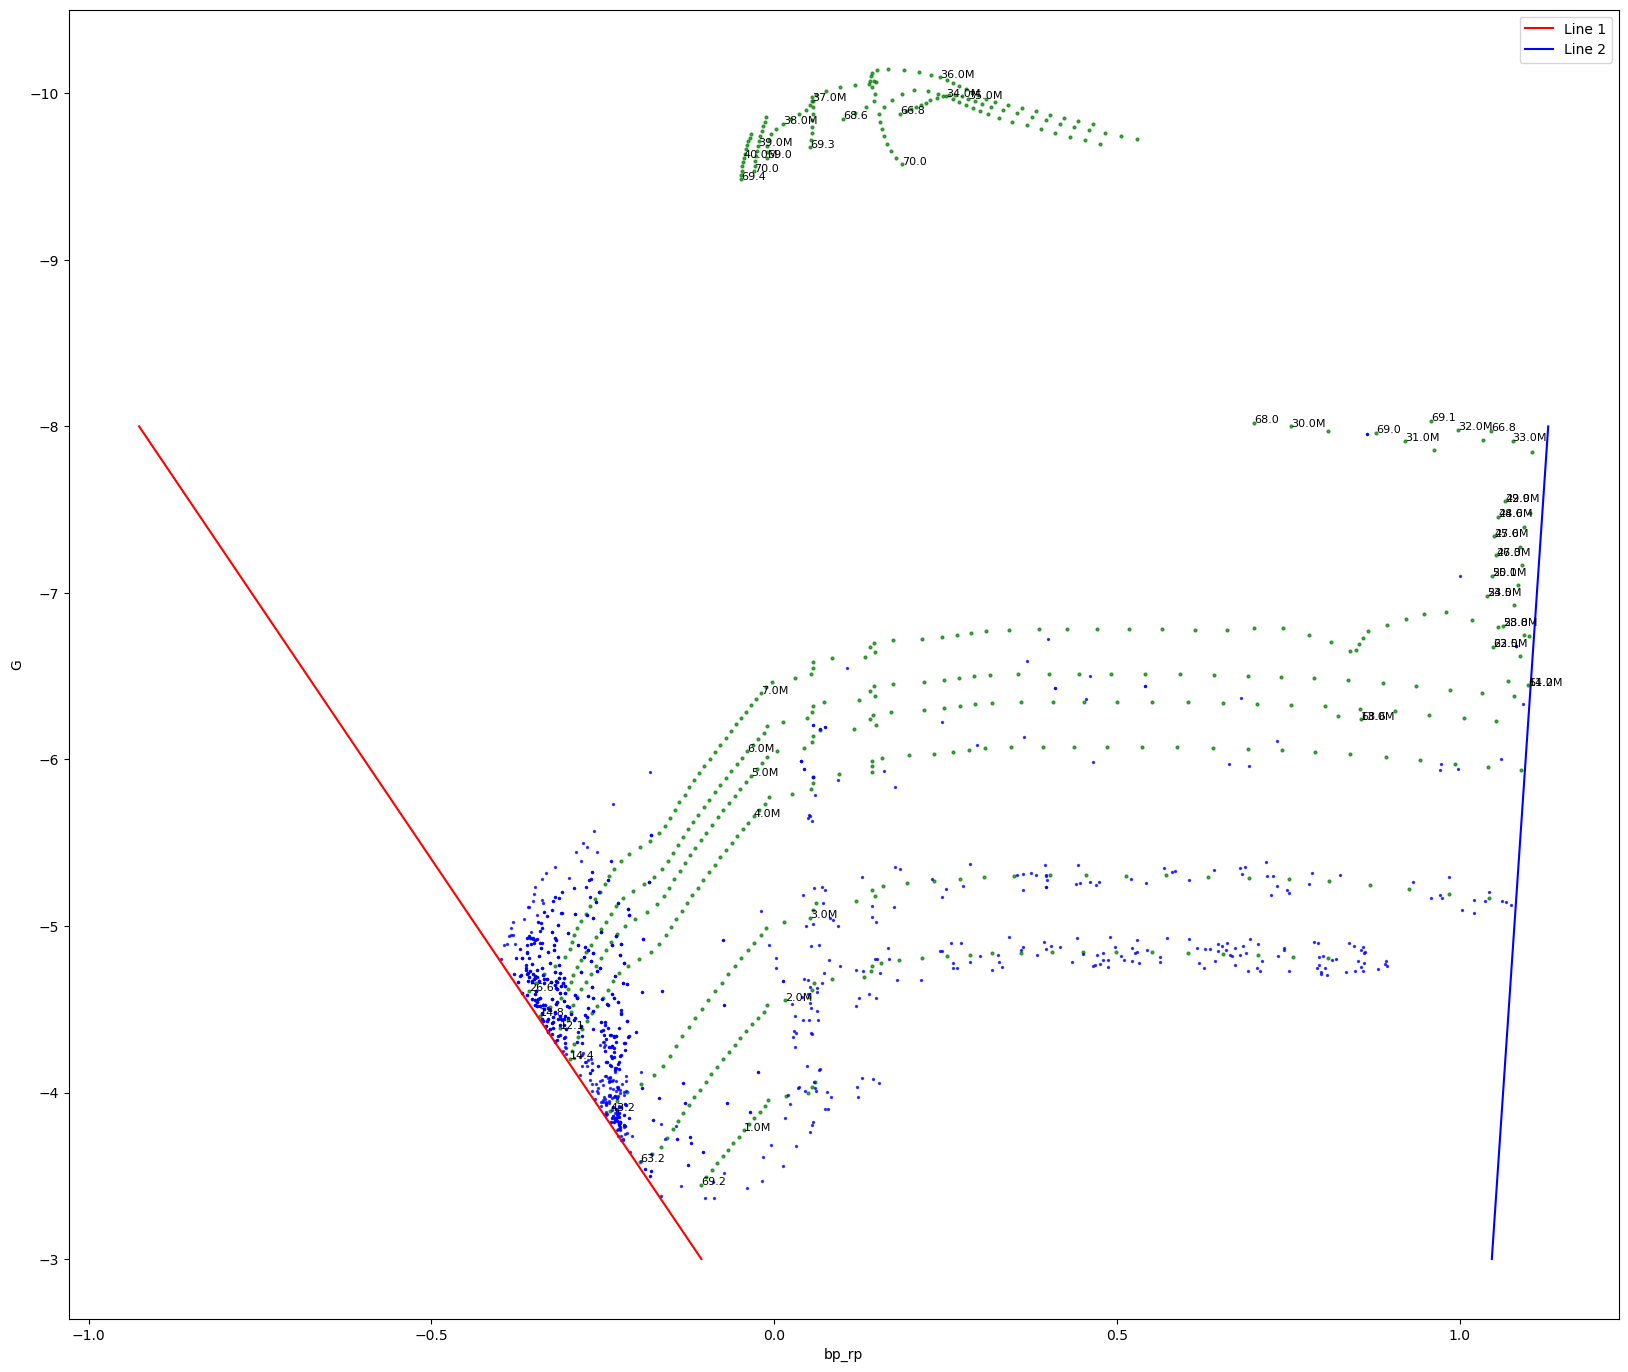

All selected GAIA stars have been saved to selected_gaia_stars.txt


In [11]:
# Read synthetic star data from .eep.cmd files
def read_synthetic_data(eep_cmd_files):
    data = []
    for eep_cmd_file in eep_cmd_files:
        eepcmd = read_mist_models.EEPCMD(eep_cmd_file)
        B = eepcmd.eepcmds['Gaia_BP_EDR3']
        R = eepcmd.eepcmds['Gaia_RP_EDR3']
        G = eepcmd.eepcmds['Gaia_G_EDR3']
        age = eepcmd.eepcmds['star_age']
        bp_rp = B - R
        for i in range(len(B)):
            data.append([age[i], bp_rp[i], G[i], eep_cmd_file])
    return pd.DataFrame(data, columns=['star_age', 'bp_rp', 'G', 'file'])

# Change directory to the folder containing .eep.cmd files
os.chdir('.')  # Update this to your directory path

# Retrieve and sort .eep.cmd files
eep_cmd_files = glob.glob('*.eep.cmd')
eep_cmd_files.sort()  # Sort files by filename
eep_cmd_files = eep_cmd_files[:40]  # Consider only the first 40 files

# Read the data from the .eep.cmd files
df = read_synthetic_data(eep_cmd_files)

# Filter the data to only consider regions within the defined lines
def filter_by_lines(df):
    line1 = (21 / 128) * df['G'] + 149 / 386
    line2 = (-7 / 124 + 0.04) * df['G'] + 603 / 620 + 0.025
    return df[(df['bp_rp'] <= line2) & (df['bp_rp'] >= line1) & (df['G'] <= -3)]

# Filter the data to only consider regions within the defined lines
def filter_by_lines_gaia(df):
    line1 = (21 / 128) * df['mg'] + 149 / 386
    line2 = (-7 / 124 + 0.04) * df['mg'] + 603 / 620 + 0.025
    return df[(df['bp_rp'] <= line2) & (df['bp_rp'] >= line1) & (df['mg'] <= -3)]

df = filter_by_lines(df)

# Function to plot the lines
def plot_lines():
    G_values = np.linspace(-8, -3, 100)
    line1 = (21 / 128) * G_values + 149 / 386
    line2 = (-7 / 124 + 0.04) * G_values + (603 / 620) + 0.025
    plt.plot(line1, G_values, 'r-', label='Line 1')
    plt.plot(line2, G_values, 'b-', label='Line 2')

# Function to calculate distances and filter GAIA stars
def filter_gaia_stars(gaia_results, df, threshold=0.1):
    gaia_points = np.array(gaia_results[['bp_rp', 'mg']])
    synthetic_points = np.array(df[['bp_rp', 'G']])

    # Calculate distances using NumPy broadcasting
    distances = np.sqrt(np.sum((synthetic_points[:, np.newaxis] - gaia_points) ** 2, axis=-1))

    # Find indices where distance < threshold
    indices = np.where(distances < threshold)

    # Extract selected GAIA stars
    selected_stars = gaia_results.iloc[indices[1]].drop_duplicates(subset=['SOURCE_ID'])
    
    return selected_stars

# Plot setup
plt.figure(figsize=(20, 17))
plot_lines()

# Filter GAIA stars based on proximity to synthetic stars
gaia_results_line = filter_by_lines_gaia(gaia_results)
# selected_gaia_stars = filter_gaia_stars(gaia_results_line, df)

# Function to find fastest evolving regions
def find_fastest_regions(data):
    regions = []
    distances = []
    n = len(data)

    for i in range(n):
        cumulative_age_diff = 0
        region = []
        for j in range(i, n):
            if j > i:
                cumulative_age_diff += abs(data['star_age'].iloc[j] - data['star_age'].iloc[j-1])
            if cumulative_age_diff <= 70:
                region.append(j)
            else:
                break
        if len(region) > 1:
            # Calculate total Cartesian distance for the region
            total_distance = np.sum(np.sqrt(np.diff(data['bp_rp'].iloc[region])**2 + np.diff(data['G'].iloc[region])**2))
            regions.append(region)
            distances.append(total_distance)
    
    # Find the region with the highest total distance
    if regions:
        max_distance_region = regions[np.argmax(distances)]
        return data.iloc[max_distance_region]
    else:
        return pd.DataFrame(columns=data.columns)

# Initialize a list to store the DataFrames
all_selected_gaia_stars = []

# Iterate through eep.cmd files
for idx, eep_cmd_file in enumerate(eep_cmd_files):
    file_data = df[df['file'] == eep_cmd_file].sort_values('star_age')
    
    fastest_region_pre = find_fastest_regions(file_data)
    selected_gaia_stars = filter_gaia_stars(gaia_results_line, fastest_region_pre)
    fastest_region = fastest_region_pre
    
    if not fastest_region.empty:
        start_age = fastest_region['star_age'].iloc[0]
        end_age = fastest_region['star_age'].iloc[-1]
        mass = int(eep_cmd_file.split('M')[0]) / 1e4  # Extract and format mass
        
        plt.scatter(fastest_region['bp_rp'], fastest_region['G'], s=4, alpha=0.7, color='green')
        mid_idx = len(fastest_region) // 2
        plt.text(fastest_region['bp_rp'].iloc[mid_idx], fastest_region['G'].iloc[mid_idx], f"{mass}M", fontsize=8, color='black')
        diff = end_age - start_age
        plt.text(fastest_region['bp_rp'].iloc[0], fastest_region['G'].iloc[0], f"{diff:.1f}", fontsize=8, color='black')
        
        # Filter and plot GAIA stars for this eep.cmd file
        plt.scatter(selected_gaia_stars['bp_rp'], selected_gaia_stars['mg'], s=2, alpha=0.7, c='blue')
        print(selected_gaia_stars)
        
    # Append the DataFrame to the list
    all_selected_gaia_stars.append(selected_gaia_stars)

# Finalize plot
plt.xlabel('bp_rp')
plt.ylabel('G')
plt.gca().invert_yaxis()
plt.legend()
plt.savefig('selected_gaia_H_gap.png')
plt.show()

# Concatenate all DataFrames in the list
concatenated_gaia_stars = pd.concat(all_selected_gaia_stars, ignore_index=True)

# Save the concatenated DataFrame to a .txt file
concatenated_gaia_stars.to_csv('selected_gaia_stars.txt', sep='\t', index=False)

print("All selected GAIA stars have been saved to selected_gaia_stars.txt")

In [13]:
all_selected_gaia_stars

[                 SOURCE_ID  parallax          ra        dec        mg  \
 602     429402824439123968  0.161913    2.082535  60.842795 -4.140073   
 949     431056184993452032  0.287508    6.042621  63.822035 -4.136417   
 1231    431666134761292672  0.185408    1.541726  63.843334 -4.006971   
 1488    511839361567258112  0.170670   28.141297  63.078260 -4.025576   
 3003    458978866892480512  0.156867   37.560915  58.830900 -4.055522   
 3116    428962474335478784  0.216761    5.098253  61.738870 -4.080815   
 4590   3127100993130728832  0.207837  100.015904   2.948983 -4.157222   
 5609    187153960137016448  0.169059   79.460088  37.469909 -4.007729   
 11238  4323172316198541184  0.177183  293.169593  18.718735 -4.029712   
 11258  4323401804892036608  0.184485  292.287038  18.902638 -4.060661   
 16977  2168754701179921664  0.661778  315.699183  50.214582 -4.003692   
 17443  2173181605565879552  0.172456  326.884612  52.709186 -3.970266   
 20606  2164874730806921856  0.353294 

In [56]:
import pandas as pd
from astroquery.gaia import Gaia

# Load Gaia data
gaia_data = pd.read_csv('few_selected_gaia_stars.txt', delimiter='\t')

# Extract the list of Gaia IDs
source_ids = gaia_data['SOURCE_ID'].tolist()

# Create a string of Gaia IDs for the ADQL query
source_ids_str = ', '.join(map(str, source_ids))

# ADQL query to get variability information
query = f"""
SELECT source_id, phot_variable_flag
FROM gaiadr3.gaia_source
WHERE source_id IN ({source_ids_str})
"""

# Query the Gaia archive
job = Gaia.launch_job(query)
variability_data = job.get_results().to_pandas()

# Merge variability information with the original data
gaia_data = gaia_data.merge(variability_data, how='left', left_on='SOURCE_ID', right_on='SOURCE_ID')

# Filter out variable stars
non_variable_gaia_data = gaia_data[gaia_data['phot_variable_flag'] == 'NOT_AVAILABLE']

In [57]:
non_variable_gaia_data

,SOURCE_ID,parallax,ra,dec,mg,mbp,mrp,bp_rp,phot_g_mean_flux,phot_bp_mean_flux,phot_rp_mean_flux,ag_gspphot,ebpminrp_gspphot,pmra,pmdec,phot_variable_flag
0,3402378332030069120,0.301127,81.942440,21.357155,-5.168700,-0.952008,-3.448733,0.958425,1.438423e+06,297659.527187,1.722469e+06,2.8551,1.5383,1.608444,0.012049,NOT_AVAILABLE
1,1978322036037633152,0.310551,323.111937,47.668811,-5.166923,-1.748967,-3.940483,0.974916,2.610122e+06,659581.888958,2.881486e+06,2.2733,1.2166,-2.242443,-3.799979,NOT_AVAILABLE
2,2054336287070236416,0.454578,304.980201,32.605068,-5.187869,2.905936,-1.167373,0.971709,3.100496e+05,19420.446741,4.800917e+05,5.4347,3.1016,-2.152985,-4.319629,NOT_AVAILABLE
3,2164190662780979968,0.229351,319.281852,46.936151,-5.262040,-0.170558,-3.034017,0.931559,5.265555e+05,84070.054192,6.819714e+05,3.4483,1.9319,-2.674932,-3.726954,NOT_AVAILABLE
5,471860195364884352,0.301386,64.965494,59.830235,-5.251174,0.014354,-2.796903,0.779856,7.409388e+05,122439.368663,9.465971e+05,3.6597,2.0314,-0.064620,-0.340492,NOT_AVAILABLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,2028011096823177472,0.221822,297.176504,27.541855,-6.195217,-1.144545,-3.402836,0.074090,7.841555e+05,192860.607460,8.959859e+05,3.8766,2.1842,-2.881201,-5.379349,NOT_AVAILABLE
100,2012927957617634304,0.172726,356.133235,62.128683,-6.182744,-3.100284,-4.526198,0.066915,1.741973e+06,708348.747167,1.528813e+06,2.4543,1.3590,-2.423051,-0.792677,NOT_AVAILABLE
101,2055107457037938688,0.143671,301.667338,32.811659,-5.992846,-1.229713,-3.343324,0.038611,3.228389e+05,87507.060642,3.558187e+05,3.6946,2.0750,-2.988037,-5.399190,NOT_AVAILABLE
104,2198401039361704448,0.282337,332.854291,56.576086,-7.951761,-0.716512,-4.358168,0.864756,2.393463e+06,210648.150565,3.499141e+06,4.9454,2.7769,-3.605716,-3.146963,NOT_AVAILABLE


In [58]:
import pandas as pd

# # Load the data from the text file
# file_path = 'data.txt'
# # Assuming data is tab-separated (TSV format), adjust delimiter if necessary
df = non_variable_gaia_data

# Define the conditions
mg_threshold = -6
bp_rp_threshold = 0.8

# Filter the rows
filtered_data = df[(df['mg'] < mg_threshold) & (df['bp_rp'] > bp_rp_threshold)]

# Display the filtered data
print(filtered_data)

               SOURCE_ID  parallax          ra        dec        mg       mbp  \
104  2198401039361704448  0.282337  332.854291  56.576086 -7.951761 -0.716512   
105  2198401039361704448  0.282337  332.854291  56.576086 -7.951761 -0.716512   

          mrp     bp_rp  phot_g_mean_flux  phot_bp_mean_flux  \
104 -4.358168  0.864756      2.393463e+06      210648.150565   
105 -4.358168  0.864756      2.393463e+06      210648.150565   

     phot_rp_mean_flux  ag_gspphot  ebpminrp_gspphot      pmra     pmdec  \
104       3.499141e+06      4.9454            2.7769 -3.605716 -3.146963   
105       3.499141e+06      4.9454            2.7769 -3.605716 -3.146963   

    phot_variable_flag  
104      NOT_AVAILABLE  
105      NOT_AVAILABLE  


In [37]:
# Concatenate all DataFrames in the list (even if it's a single DataFrame, put it in a list)
concatenated_gaia_stars = pd.concat([non_variable_gaia_data], ignore_index=True)

# Save the concatenated DataFrame to a .txt file
concatenated_gaia_stars.to_csv('stable_selected_gaia_stars.txt', sep='\t', index=False)

In [36]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from astroquery.gaia import Gaia

# # Gaia DR3 query for photometric time series data
# def query_gaia_light_curve(gaia_id):
#     # Query Gaia for photometric time series data
#     job = Gaia.launch_job_async(f"""
#         SELECT 
#             source_id, 
#             g_transit_time, 
#             g_transit_flux, 
#             g_transit_flux_error, 
#             bp_obs_time, 
#             bp_flux, 
#             bp_flux_error, 
#             rp_obs_time, 
#             rp_flux, 
#             rp_flux_error
#         FROM 
#             gaiadr3.epoch_photometry
#         WHERE 
#             source_id = {gaia_id}
#     """)
    
#     # Fetch the results
#     results = job.get_results().to_pandas()
#     return results

# # Flatten the arrays and create a DataFrame
# def flatten_gaia_data(results):
#     data = {
#         'time': [],
#         'flux_g': [],
#         'flux_g_err': [],
#         'flux_bp': [],
#         'flux_bp_err': [],
#         'flux_rp': [],
#         'flux_rp_err': [],
#     }
    
#     for idx, row in results.iterrows():
#         data['time'].extend(row['g_transit_time'])
#         data['flux_g'].extend(row['g_transit_flux'])
#         data['flux_g_err'].extend(row['g_transit_flux_error'])
#         data['flux_bp'].extend(row['bp_flux'])
#         data['flux_bp_err'].extend(row['bp_flux_error'])
#         data['flux_rp'].extend(row['rp_flux'])
#         data['flux_rp_err'].extend(row['rp_flux_error'])
    
#     return pd.DataFrame(data)

# # Plot the light curve
# def plot_light_curve(light_curve_data, gaia_id):
#     plt.figure(figsize=(14, 8))
    
#     # Plot G-band
#     plt.errorbar(light_curve_data['time'], light_curve_data['flux_g'], 
#                  yerr=light_curve_data['flux_g_err'], fmt='o', label='G-band', color='g')
    
#     # Plot BP-band
#     plt.errorbar(light_curve_data['time'], light_curve_data['flux_bp'], 
#                  yerr=light_curve_data['flux_bp_err'], fmt='o', label='BP-band', color='b')
    
#     # Plot RP-band
#     plt.errorbar(light_curve_data['time'], light_curve_data['flux_rp'], 
#                  yerr=light_curve_data['flux_rp_err'], fmt='o', label='RP-band', color='r')
    
#     plt.xlabel('Time [JD]')
#     plt.ylabel('Flux')
#     plt.title(f'Light Curve for Gaia ID {gaia_id}')
#     plt.legend()
#     plt.grid(True)
#     plt.show()

# # Example Gaia ID (replace with the actual ID)
# gaia_id = 471860195364884352

# # Query the Gaia light curve data
# results = query_gaia_light_curve(gaia_id)

# # Check if data is available
# if results.empty:
#     print(f"No photometric data found for Gaia ID {gaia_id}.")
# else:
#     # Flatten the Gaia data
#     light_curve_data = flatten_gaia_data(results)
    
#     # Plot the light curve
#     plot_light_curve(light_curve_data, gaia_id)

In [46]:
import numpy as np
from astroquery.vizier import Vizier
from astropy.coordinates import SkyCoord
import astropy.units as u

# Constants
GAIA_EPOCH = 2016.0  # Gaia DR3 epoch
SDSS_EPOCH = 2004.0  # Average epoch for SDSS DR1

# Function to adjust position for proper motion
def adjust_for_proper_motion(ra, dec, pmra, pmdec, epoch1, epoch2):
    delta_t = epoch2 - epoch1
    ra_adjusted = ra + (pmra / 1000.0 / 3600.0) * delta_t / np.cos(np.deg2rad(dec))
    dec_adjusted = dec + (pmdec / 1000.0 / 3600.0) * delta_t
    return ra_adjusted, dec_adjusted

# Adjust Gaia positions to SDSS epoch
non_variable_gaia_data['ra_sdss'], non_variable_gaia_data['dec_sdss'] = zip(*non_variable_gaia_data.apply(
    lambda row: adjust_for_proper_motion(row['ra'], row['dec'], row['pmra'], row['pmdec'], GAIA_EPOCH, SDSS_EPOCH), axis=1))

# Cross-match with SDSS using Vizier
vizier = Vizier(columns=['*'])
sdss_catalog = "SDSS-DR1"

sdss_matches = []
for index, row in non_variable_gaia_data.iterrows():
    coord = SkyCoord(ra=row['ra_sdss']*u.deg, dec=row['dec_sdss']*u.deg)
    result = vizier.query_region(coord, radius=1*u.arcsec, catalog=sdss_catalog)
    if result:
        sdss_data = result[0].to_pandas()
        sdss_data['gaia_source_id'] = row['SOURCE_ID']
        sdss_matches.append(sdss_data)

# # Combine all matches into a single DataFrame
# sdss_data_combined = pd.concat(sdss_matches, ignore_index=True)

/tmp/ipykernel_316229/3867153411.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_variable_gaia_data['ra_sdss'], non_variable_gaia_data['dec_sdss'] = zip(*non_variable_gaia_data.apply(


In [47]:
sdss_matches

[]

In [89]:
import astroquery
from astroquery.simbad import Simbad
import pandas as pd

# Set custom fields to retrieve more information
custom_simbad = Simbad()
custom_simbad.add_votable_fields('flux(V)', 'sptype', 'flux(V)', 'flux_error(V)', 'plx', 'pm', 'rv_value', 'coordinates')

# Define function to filter stars by mass range and apparent magnitude
def filter_stars_by_mass_and_magnitude():
    result_table = custom_simbad.query_criteria("Vmag>7 & Vmag<14")
    
    # Convert result to Pandas DataFrame for easier manipulation
    df = result_table.to_pandas()
    
    # Add a column for mass (this is a mock example; in reality, you would need to have a method to estimate mass)
    # This example assumes a placeholder method to calculate mass from spectral type or other parameters
    df['mass'] = df.apply(lambda row: estimate_mass(row['SP_TYPE']), axis=1)
    
    # Filter stars by mass range 34-36 solar masses
    filtered_df = df[(df['mass'] >= 34) & (df['mass'] <= 36)]
    
    return filtered_df

# Placeholder function to estimate mass from spectral type
def estimate_mass(spectral_type):
    # This is a simplified mock function; real mass estimation would be more complex
    mass_estimation = {
        'O2': 60, 'O3': 50, 'O4': 45, 'O5': 40, 'O6': 35, 'O7': 30, 'O8': 25, 'O9': 20,
        'B0': 17, 'B1': 14, 'B2': 12, 'B3': 10, 'B4': 9, 'B5': 6, 'B6': 5, 'B7': 4, 'B8': 3,
    }
    for key, value in mass_estimation.items():
        if key in spectral_type:
            return value
    return None

# Execute the function and get the filtered list of stars
filtered_stars = filter_stars_by_mass_and_magnitude()

# Output the filtered list of stars
print(filtered_stars)

ReadTimeout: HTTPSConnectionPool(host='simbad.cds.unistra.fr', port=443): Read timed out. (read timeout=60)

In [79]:
%cd "/home/dutta/Downloads/MIST_ET"

/home/dutta/Downloads/MIST_ET


In [4]:
%cd "/home/dutta/Downloads/MIST"

/home/dutta/Downloads/MIST


In [3]:
%cd "/home/dutta/Downloads/post-AGB"

/home/dutta/Downloads/post-AGB


Reading in: 0020000M.track.eep.cmd
Reading in: 0021000M.track.eep.cmd
Reading in: 0022000M.track.eep.cmd
Reading in: 0023000M.track.eep.cmd
Reading in: 0024000M.track.eep.cmd
Reading in: 0025000M.track.eep.cmd
Reading in: 0026000M.track.eep.cmd
Reading in: 0027000M.track.eep.cmd
Reading in: 0028000M.track.eep.cmd
Reading in: 0029000M.track.eep.cmd
Reading in: 0030000M.track.eep.cmd


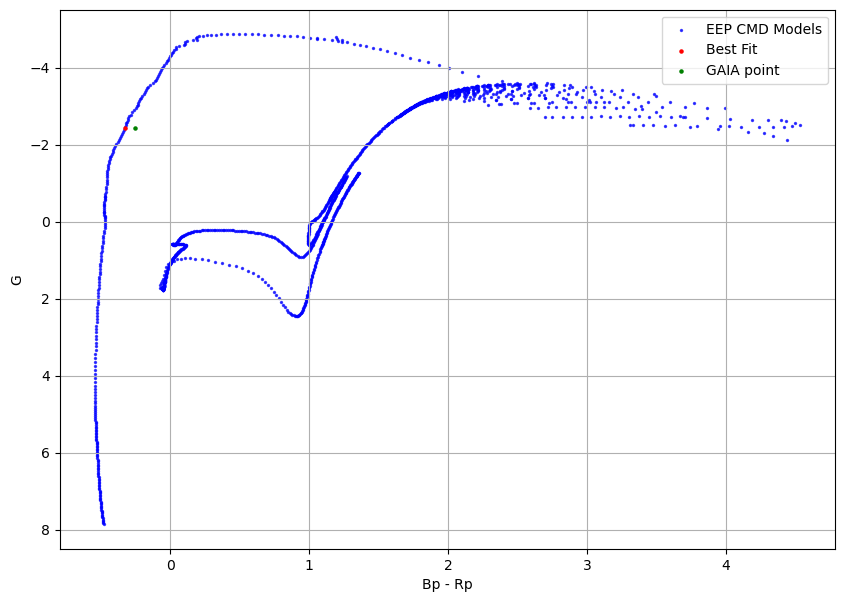

Best match file: 0021000M.track.eep.cmd
Best match Bp_Rp: -0.32889800000000013
Best match G: -2.423853
Best match Age: 982460932.8494846


In [37]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import read_mist_models

# Step 1: Change directory to the folder containing .eep.cmd files
os.chdir('.')  # Update this to your directory path

# Step 2: Read all .eep.cmd files and extract Bp_Rp and G values
eep_cmd_files = glob.glob('*.eep.cmd')
eep_cmd_files.sort()  # Sort files by filename
eep_data = []

# Consider only the first 15 files
eep_cmd_files = eep_cmd_files[12:23]

for eep_cmd_file in eep_cmd_files:
    eepcmd = read_mist_models.EEPCMD(eep_cmd_file)
    A = eepcmd.eepcmds['star_age']
    T = eepcmd.eepcmds['log_Teff']
    L = eepcmd.eepcmds['log_L']
    B = eepcmd.eepcmds['Gaia_BP_EDR3']
    R = eepcmd.eepcmds['Gaia_RP_EDR3']
    G = eepcmd.eepcmds['Gaia_G_EDR3']
    bp_rp = B - R
    
    # Store the data for later comparison
    eep_data.append({
        'file': eep_cmd_file,
        'age': A,
        'log_Teff': T,
        'log_L': L,
        'Bp_Rp': bp_rp,
        'G': G
    })

# Step 3: Define the GAIA star data
gaia_Bp_Rp = -0.255  # Replace with actual GAIA Bp_Rp value
gaia_G = -2.431     # Replace with actual GAIA G value

# Step 4: Find the best match
min_diff = float('inf')
best_match = None
best_match_idx = None

for data in eep_data:
    diff = np.abs(data['Bp_Rp'] - gaia_Bp_Rp) + np.abs(data['G'] - gaia_G)
    min_diff_idx = np.argmin(diff)
    if diff[min_diff_idx] < min_diff:
        min_diff = diff[min_diff_idx]
        best_match = data
        best_match_idx = min_diff_idx

# Step 5: Plot the best match
if best_match:
    plt.figure(figsize=(10, 7))
    plt.scatter(best_match['Bp_Rp'], best_match['G'], s=2, color='blue', alpha=0.7, label='EEP CMD Models')
    plt.scatter(best_match['Bp_Rp'][best_match_idx], best_match['G'][best_match_idx], s=5, color='red', label='Best Fit')
    plt.scatter(gaia_Bp_Rp, gaia_G, s=5, color='green', label='GAIA point')

    # Adding labels and grid
    plt.xlabel('Bp - Rp')
    plt.ylabel('G')
    plt.gca().invert_yaxis()  # Invert the y-axis to match astronomical convention
    plt.grid(True)
    plt.legend()

    # # Save the plot to a file
    # output_path = 'best_fit_bp_rp_vs_g.png'  # Update with your desired output path
    # plt.savefig(output_path, format='png')

    # Show the plot (optional)
    plt.show()
else:
    print("No suitable match found.")

# Print the best match file, values, and age
if best_match:
    print(f"Best match file: {best_match['file']}")
    print(f"Best match Bp_Rp: {best_match['Bp_Rp'][best_match_idx]}")
    print(f"Best match G: {best_match['G'][best_match_idx]}")
    print(f"Best match Age: {best_match['age'][best_match_idx]}")

In [156]:
import pandas as pd
from datetime import datetime

# Function to filter pairs of rows based on date difference
def filter_date_pairs(df, date_column, max_days_diff=60):
    filtered_rows = []
    
    # Ensure the date column is in datetime format
    df[date_column] = pd.to_datetime(df[date_column], format='%Y-%m-%d')
    
    # Iterate over pairs of rows
    for i in range(0, len(df) - 1, 2):
        date1 = df.loc[i, date_column]
        date2 = df.loc[i + 1, date_column]
        
        # Check if the dates are within the specified range
        if abs((date2 - date1).days) <= max_days_diff:
            filtered_rows.append(df.iloc[i])
            filtered_rows.append(df.iloc[i + 1])
    
    # Create a new DataFrame from the filtered rows
    filtered_df = pd.DataFrame(filtered_rows)
    
    return filtered_df

# Read the CSV file
input_csv = 'combined_refined.csv'
df = pd.read_csv(input_csv)

# Filter the DataFrame
filtered_df = filter_date_pairs(df, 'date_orig')

# Save the filtered DataFrame back to a CSV file
output_csv = 'filtered_combined.csv'
filtered_df.to_csv(output_csv, index=False)

print(f"Filtered data saved to '{output_csv}'")

/tmp/ipykernel_724357/1303147759.py:28: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(input_csv)


Filtered data saved to 'filtered_combined.csv'
